In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import make_axes_locatable
import plotly.express as px
import seaborn as sns
import plotly.subplots
#from sklearn.preprocessing import LabelEncoder
from scipy.stats import pearsonr

In [32]:
# DATA PREPARATION FOR URC - Ukraine Red Cross

# STEP 1: Group teams into centers and sectors
# Load the dataframe from "ungrouped_ALL_with_Regions.txt"
file_path = "Individual.csv"
df = pd.read_csv(file_path, sep=",", encoding='utf-8')

df.info()

# Filter the dataframe for 'country' = 'Ukraine'
df = df[df['Country'] == 'Ukraine']
df.info()

#drop teams that are not relevant (small teams, tests) - see email Salam Salloum 8 Sept 23.
#df['Team'] = df['region']
#df = df.drop(df[df.Team == 'SRK-Fachtagung'].index)
#df = df.drop(df[df.Team == 'IT GS SRK'].index)

# change the names of teams that have been re-named in Moti
# see email Salam Salloum 8 Sept 23.
#changednames_dict = {
#'BcharriYouth2023': "LRCY.23 - Bchare",
#    }

#df['Team']=df['Team'].replace(to_replace=changednames_dict)

# Create a dictionary of regions and corresponding Regions to Allocate teams to circles
# in this case "Regions". Some teams are their own circle - see workspace on Motiro

team_region_dict = {
'VYDU':  'URCS HQ',
'OD Department':  'URCS HQ',
'OD Department Heads':  'URCS HQ',
'InterRegional Specialists':  'URCS HQ',
'Rehab&support dept':  'URCS HQ',
'Regional Specialists':  'Regional Specialists',
'Індустріальна РО':  'Kharkiv Region',
'Гуманітарна допомога ХОО ТЧХУ':  'Kharkiv Region',
'ПЗ ПСП ХОО ТЧХУ':  'Kharkiv Region',
'Перша допомога ХОО ТЧХУ':  'Kharkiv Region',
'Адміністративна діяльність ХОО ТЧХУ':  'Kharkiv Region',
'Керівництво ХОО ТЧХУ':  'Kharkiv Region',
'Реліф ХОО ТЧХУ':  'Kharkiv Region',
'Догляд Вдома ХОО ТЧХУ':  'Kharkiv Region',
'ММБ ХОО ТЧХУ':  'Kharkiv Region',
'Кол-центр ХОО ТЧХУ':  'Kharkiv Region',
'Загін швидкого реагування ХОО ТЧХУ':  'Kharkiv Region',
'Мінна небезпека ХОО ТЧХУ':  'Kharkiv Region',
'Мобілізація ресурсів ХОО ТЧХУ':  'Kharkiv Region',
'Ізюмська МРО':  'Kharkiv Region',
'Богодухівська РО':  'Kharkiv Region',
'Зміївська':  'Kharkiv Region',
'Красноградська РО':  'Kharkiv Region',
'Холодногірська РО':  'Kharkiv Region',
'Шевченківська РО':  'Kharkiv Region',
'Київська РО':  'Kharkiv Region',
'Слобідьська РО':  'Kharkiv Region',
'Салтівська РО':  'Kharkiv Region',
'Куп\'янська МРО':  'Kharkiv Region',
'Лозівська':  'Kharkiv Region',
'Служба розшуку ХОО ТЧХУ':  'Kharkiv Region',
'Пропаганда донорства крові та її компонентів':  'Kharkiv Region',
'Інформаційна діяльність ХОО':  'Kharkiv Region',
'Sumy_City_Volunteers':  'Sumy Region',
'Romny_City_Volunteers':  'Sumy Region',
'Konotop_City_Volunteers':  'Sumy Region',
'Ohtyrka_City_Volunteers':  'Sumy Region',
'Shostka_City_Volunteers':  'Sumy Region',
'Sumy_Regional_ERT':  'Sumy Region',
'Sumy_Regional_PSS_JointStaffVolunteers':  'Sumy Region',
'Sumy_Regional_Home-BasedCare':  'Sumy Region',
'Sumy_Regional_MineRiskAwareness':  'Sumy Region',
'Sumy_Regional_FirstAid':  'Sumy Region',
'Sumy_Regional_Staff':  'Sumy Region',
'Nizhyn_District_Volunteers':  'Chernihiv Region',
'Pryluky_District_Volunteers':  'Chernihiv Region',
'Chernihiv_City_Volunteers':  'Chernihiv Region',
'Korop_District_Volunteers':  'Chernihiv Region',
'Koryukivka_District_Volunteers':  'Chernihiv Region',
'Chernihiv_ Regional_Staff':  'Chernihiv Region',
'Kyiv_Regional_Volunteers':  'Kyiv Region',
'Kyiv-Svyastoshynska_District_Volunteers':  'Kyiv Region',
'Obukhiv_District_Volunteers':  'Kyiv Region',
'Boryspil_District_Voluunteers':  'Kyiv Region',
'Brovary_District_Volunteers':  'Kyiv Region',
'Bucha_Filia_Kyiv_Regional_Volunteers':  'Kyiv Region',
'Vyshhorod District Volunteers':  'Kyiv Region',
'Bila Tserkva District Volunteers':  'Kyiv Region',
'Bucha_Filia_Kyiv_Regional_Volunteers 1':  'Kyiv Region',
'Kyiv_City_Staff':  'Kyiv city',
'Kyiv_City_Volunteers':  'Kyiv city',
'Kyiv_Holosiivskyi District_JointStaffVolunteers':  'Kyiv city',
'Kyiv_Darnytskyi District_JointStaffVolunteers':  'Kyiv city',
'Kyiv_Desnyanskyi District_JointStaffVolunteers':  'Kyiv city',
'Kyiv_Dniprovsky District_JointStaffVolunteers':  'Kyiv city',
'Kyiv_Obolonsky District_JointStaffVolunteers':  'Kyiv city',
'Kyiv_Pechersky District_JointStaffVolunteers':  'Kyiv city',
'Kyiv_Podolsky District_JointStaffVolunteers':  'Kyiv city',
'Kyiv_Svyatoshinsky District_JointStaffVolunteers':  'Kyiv city',
'Kyiv_Solomianskyi District_JointStaffVolunteers':  'Kyiv city',
'Kyiv_Shevchenkivskyi District_JointStaffVolunteers':  'Kyiv city',
'Cherkasy_Regional_Staff':  'Cherkasy Region',
'Cherkasy_RegionalCity_JointStaff':  'Cherkasy Region',
'Cherkasy_City_Volunteers':  'Cherkasy Region',
'Zolotonosha_District_Volunteers':  'Cherkasy Region',
'Zvenyhorodka_District_Volunteers':  'Cherkasy Region',
'Uman_District_Volunteers':  'Cherkasy Region',
'Cherkasy_Regional_Volunteers':  'Cherkasy Region',
'Kalush district joint|staff|volunteers':  'Ivano-Frankivsk Region',
'Kalush district  joint|staff|volunteers':  'Ivano-Frankivsk Region',
'Nadvirna district joint|staff|volunteers':  'Ivano-Frankivsk Region',
'Ivano-Frankivsk city joint|staff|volunteers':  'Ivano-Frankivsk Region',
'Ivano-Frankivsk city  joint|staff|volunteers':  'Ivano-Frankivsk Region',
'Verkhovyna district joint|staff|volunteers':  'Ivano-Frankivsk Region',
'Kosiv district joint|staff|volunteers':  'Ivano-Frankivsk Region',
'Kolomyya district joint|staff|volunteers':  'Ivano-Frankivsk Region',
'Ivano-Frankivsk Regional Staff':  'Ivano-Frankivsk Region',
'Ivano- Frankivsk Regional| home based care':  'Ivano-Frankivsk Region',
'Ivano-Frankivsk Regional PSS':  'Ivano-Frankivsk Region',
'Ivano-Frankivsk Regional ERT joint|staff|volunteers':  'Ivano-Frankivsk Region',
'Vinnytsia_District_JointStaffVolunteers': 'Vinnitsa Region',
'LadyzhynHaisyn_District_JointStaffVolunteers': 'Vinnitsa Region',
'Zhmerynka_District_JointStaffVolunteers': 'Vinnitsa Region',
'Mohyliv-PodilskyiYampil_District_JointStaffVolunteers': 'Vinnitsa Region',
'Tulchyn_District_JointStaffVolunteers': 'Vinnitsa Region',
'Khmilnyk_District_JointStaffVolunteers': 'Vinnitsa Region',
'Vinnytsia_Regional_Staff': 'Vinnitsa Region',
'Vinnytsia_Regional_PSS_Volunteers': 'Vinnitsa Region',
'Vinnytsia_Regional_FirstAidERT_Volunteers': 'Vinnitsa Region',
'Chernivtsi_Regional_Staff': 'Chernivtsi Region',
'Novoselytska_City_VolunteersStaff': 'Chernivtsi Region',
'Vyzhnytska_District_VolunteersStaff': 'Chernivtsi Region',
'Chernivetska_District_JointStaffVolunteers': 'Chernivtsi Region',
'Dnistrovska_District_JoinStaffVolunteers': 'Chernivtsi Region',
'Chernivtsi_Regional_PSS': 'Chernivtsi Region',
'Chernivtsi_Regional_ERT': 'Chernivtsi Region',
'Kamianets_Podilskyi_District_JointStaffVolunteers': 'Khmelnytskyi Region', 
'Slavuta_City_JointStaffVolunteers': 'Khmelnytskyi Region', 
'Khmelnytskyi_District_JointStaffVolunteers': 'Khmelnytskyi Region',
'Starokostiantyniv_City_JointStaffVolunteers': 'Khmelnytskyi Region',
'Kamianets_Podilskyi_City_JointStaffVolunteers': 'Khmelnytskyi Region',
'Shepetivka_District_JointStaffVolunteers': 'Khmelnytskyi Region',
'Khmelnytskyi_Regional_Staff': 'Khmelnytskyi Region',
'Zhytomyr_Regional_Staff': 'Zytomyr Region',
'Berdychiv_City_JointStaffVolunteers': 'Zytomyr Region',
'Zhytomyr_City_JointStaffVolunteers': 'Zytomyr Region',
'Korosten_City_JointStaffVolunteers': 'Zytomyr Region',
'Novohrad-Volunskyy_District_JointStaffVolunteers': 'Zytomyr Region',
'Radomyshl_District_JointStaffVolunteers': 'Zytomyr Region',
'Ruzhyn_District_JointStaffVolunteers': 'Zytomyr Region',
'Borshchiv_District_JoinStaffVolunteers': 'Ternopil Region',
'Zbarazh_District_JoinStaffVolunteers': 'Ternopil Region',
'Kremenets_District_JoinStaffVolonteers': 'Ternopil Region',
'Lanivtsi_District_JoinStaffVolonteers': 'Ternopil Region',
'Pidvolochysk_District_JoinStaffVolonteers': 'Ternopil Region',
'Ternopil_City_JoinStaffVolonteers': 'Ternopil Region',
'Ternopil_Disctict_JoinStaffVolonteers': 'Ternopil Region',
'Chortkiv_District_JoinStaffVolunteers': 'Ternopil Region',
'Ternopil_Regional_ERTFirstAid_Volonteers': 'Ternopil Region',
'Ternopil_Regional_JoinStaff': 'Ternopil Region',
'Khust_District_Volonteers': 'Zakarpattya Region',
'Rahiv_District_Volonteers': 'Zakarpattya Region',
'Uzhhorod_City_Volonteers': 'Zakarpattya Region',
'Mukachevo_City_Volonteers': 'Zakarpattya Region',
'Mukachevo_District_Volonteers': 'Zakarpattya Region',
'Irshava_District_Volonteers': 'Zakarpattya Region',
'Berehovo_District_Volonteers': 'Zakarpattya Region',
'Tyachiv_District_Volonteers': 'Zakarpattya Region',
'Zakarpattia_Regional_Staff': 'Zakarpattya Region',
'Dobropillya_District_Joint_Staff_Volunteers': 'Donetsk Region',
'Pokrovsk_District_Joint_Staff_Volunteers': 'Donetsk Region',
'Kostyantynivka_District_Joint_Staff_Volunteers': 'Donetsk Region',
'Mirnohrad_City_Joint_Staff_Volunteers': 'Donetsk Region',
'Kurakhovo_District_Joint_Staff_Volunteers': 'Donetsk Region',
'Kramatorsk_City_Joint_Staff_Volunteers': 'Donetsk Region',
'Slovyansk_District_Joint_Staff_Volunteers': 'Donetsk Region',
'Druzhkivka_City_Joint_Staff_Volunteers': 'Donetsk Region',
'Liman_District_Joint_Staff_Volunteers': 'Donetsk Region',
'Donetsk_Regional_Staff': 'Donetsk Region',
'Dnipro_Regional_ERT_Volunteers': 'Dnipro Region',
'Dnipro_Regional_Staff': 'Dnipro Region',
'Kryvyi Rih_District_ERT_Volunteers': 'Dnipro Region',
'Nikopol_District_ERT_Volunteers': 'Dnipro Region',
'Dnipro_Regional_Emergency Response Team_Volunteers': 'Dnipro Region',
'Dnipro_Region_First Aid_Volunteers': 'Dnipro Region',
'Dniprovska_ City_Volunteers': 'Zaporizhya Region',
'Local_ City_Volunteers': 'Zaporizhya Region',
'Komunarska_ City_Volunteers': 'Zaporizhya Region',
'Pologyvska _ Regional_Volunteers': 'Zaporizhya Region',
'Zavodsky _ City_Volunteers': 'Zaporizhya Region',
'Voznesenovsky_City_Volunteers': 'Zaporizhya Region',
'Volnyansk_ Regional_Volunteers': 'Zaporizhya Region',
'Запорізька района філія ЗОО ТЧХУ': 'Zaporizhya Region',
'Kushugum_Region_Volunteers': 'Zaporizhya Region',
'Odesa_ Regional_Staff': 'Odessa Region',
'Prymorska_City_Volunteers': 'Odessa Region',
'Malinоvska_City_Volunteers': 'Odessa Region',
'Chornomorska_District_Volunteers': 'Odessa Region',
'Suvorоvska_City_Volunteers': 'Odessa Region',
'Kyivska_City_Volunteers': 'Odessa Region',
'Podilska_District_Volunteers': 'Odessa Region',
'Bilhorod-Dnistrovska_District_Volunteers': 'Odessa Region',
'Rozdilnianska_District_Volunteers': 'Odessa Region',
'Bolgradska_District_Volunteers': 'Odessa Region',
'Izmail_District_Volunteers': 'Odessa Region',
'Ochakiv_City_Volunteers': 'Mykolaiv Region',
'Ochakiv_City_Staff': 'Mykolaiv Region',
'Yuzhnoukrainsk_City_Volunteers': 'Mykolaiv Region',
'Yuzhnoukrainsk_City_Staff': 'Mykolaiv Region',
'Snihurivka_City_JointStaffVolunteers': 'Mykolaiv Region',
'Mykolaiv_District_SocialSupport_Staff': 'Mykolaiv Region',
'Pervomaisk_District_Staff': 'Mykolaiv Region',
'Pervomaisk_District_Volunteers': 'Mykolaiv Region',
'Mykolaiv_District_SaveTheChildren_Staff': 'Mykolaiv Region',
'Mykolaiv_District_SCICaseManagers_Staff': 'Mykolaiv Region',
'Bashtanka_Distctrict_Staff': 'Mykolaiv Region',
'Bashtanka_District_Volunteers': 'Mykolaiv Region',
'Mykolaiv_District_Volunteers': 'Mykolaiv Region',
'Mykolaiv_District_PSS_Staff': 'Mykolaiv Region',
'Mykolaiv_District_Staff': 'Mykolaiv Region',
'Voznesensk_District_Volunteers\Staff': 'Mykolaiv Region',
'Kirovohrad_ Regional_Staff': 'Kropyvnytskyi Region',
'Kirovohrad_ Regional__Home-BasedCare_Volunteers': 'Kropyvnytskyi Region',
'Kropyvnytskyi_ District_Volunteers': 'Kropyvnytskyi Region',
'Blagovishchenskа_District_Volunteers': 'Kropyvnytskyi Region',
'Onufrievska_District_Volunteers': 'Kropyvnytskyi Region',
'Novomyrhorod_District_Volunteers': 'Kropyvnytskyi Region',
'Kirovohrad_ PSS_Volunteers': 'Kropyvnytskyi Region',
'Kirovohrad_ Regional_Volunteers': 'Kropyvnytskyi Region',
'Oleksandriiska_District_Volunteers': 'Kropyvnytskyi Region',
'Novovorontsovska_District_JointStaffVolunteers': 'Kherson Region',
'Dniprovska_District_JointStaffVolunteers': 'Kherson Region',
'Bilozerska_District_JointStaffVolunteers': 'Kherson Region',
'Korabelna_District_JointStaffVolunteers': 'Kherson Region',
'Kherson_ Regional_JointStaffVolunteers': 'Kherson Region',
'Stryi District Staff Volunteers': 'Lviv Region',
'Yavoriv District Staff Volunteers': 'Lviv Region',
'Chervonograd District Staff Volunteers': 'Lviv Region',
'Stryi District Representation Staff Volunteers': 'Lviv Region',
'Sambir District Staff Volunteers': 'Lviv Region',
'Lychakivska & Syhiv City Representation Staff Volunteers': 'Lviv Region',
'Zolochiv District Staff Volunteers': 'Lviv Region',
'Drogobych District Staff Volunteers': 'Lviv Region',
'Lviv Regional Staff': 'Lviv Region',
'Lviv City Staff Volunteers': 'Lviv Region',
'Lviv District Staff Volunteers': 'Lviv Region',
'Mykolaiv District Staff Volunteers': 'Lviv Region',
'Zolochiv Representation District Staff Volunteers': 'Lviv Region',
'Novoyavorivsk & Zhovkva District Staff Volunteers': 'Lviv Region',
'Novoyavorivsk & Zhovkva  District Staff Volunteers': 'Lviv Region',
'Franskivska City Representation Staff Volunteers': 'Lviv Region',
'Rivne_Regional_Staff': 'Rivne Region',
'Varash_City_Volunteers': 'Rivne Region',
'Dubno_City_Volunteers': 'Rivne Region',
'Zdolbuniv_City_Volunteers': 'Rivne Region',
'Koretc_City_Volunteers': 'Rivne Region',
'Rivne_City_Volunteers': 'Rivne Region',
'Sarny_City_Volunteers': 'Rivne Region',
'Rivne_Regional_BraVo_Staff': 'Rivne Region',
'Rozhyshche_District_Volunteers': 'Volyn Region',
'Kovel_District_Volunteers': 'Volyn Region',
'Novovolynsk_City_Volunteers': 'Volyn Region',
'Volodymyr-Volynskyi_District_Volunteers': 'Volyn Region',
'Lutsk_City_Volunteers': 'Volyn Region',
'Lutsk_District_Volunteers': 'Volyn Region',
'Kamin`-Kashyrskyi_District_Volunteers': 'Volyn Region',
'Psychosocial Support або PSS': 'Poltava Region',
'Resource Mobilisation': 'Poltava Region',
'Humanitarian Aid': 'Poltava Region',
'Home-Based Care': 'Poltava Region',
'Communications': 'Poltava Region',
'Resource Mobilisation': 'Poltava Region',
'employees': 'Poltava Region',
'Dikanyka RO': 'Poltava Region',
'Lubny Local Organization': 'Poltava Region',
'Kremenchuk Local Organization': 'Poltava Region',
'Chornukhy Local Organization': 'Poltava Region',
'Myrhorod Local Organization': 'Poltava Region',
'Poltava Regional Organization': 'Poltava Region',
'Poltava MO': 'Poltava Region',
'Franskivska & Lychakivska & Syhiv City Representation Staff Volunteers' : 'Lviv Region',
'Kropyvnytskyi_  District_Volunteers': 'Kropyvnytskyi Region',
'Kropyvnytskyi_District_Volunteers': 'Kropyvnytskyi Region',
'Sarny_City_United_Headquarters_of_Volunteers': 'Rivne Region',
'Вижницька РО': 'Chernivtsi Region',
'Interregional_Specialists': 'URCS HQ',
'Interregional Specialists': 'URCS HQ',
'Medical Staff': 'URCS HQ',
}

# Create an empty 'region' column
## NB region with small caps to differentiate with Region = IFRC Regions
df['region'] = ''

# Iterate over unique 'region' values and prompt user for Center input
for team_name in df['region'].unique():
    # Check if the team name is in the dictionary
    if team_name in team_region_dict:
        region = team_region_dict[team_name]
    else:
        # If the team name is not in the dictionary, prompt for user input
        region = input(f"Enter the URC region for Team Name '{team_name}': ")
    
    df.loc[df['Team Name'] == team_name, 'region'] = region

# Create a dictionary of frontline - not frontline teams / regions
team_frontline_dict = {
'Dobropillya_District_Joint_Staff_Volunteers': 'Frontline',
'Pokrovsk_District_Joint_Staff_Volunteers': 'Frontline',
'Kostyantynivka_District_Joint_Staff_Volunteers': 'Frontline',
'Mirnohrad_City_Joint_Staff_Volunteers': 'Frontline',
'Kurakhovo_District_Joint_Staff_Volunteers': 'Frontline',
'Kramatorsk_City_Joint_Staff_Volunteers': 'Frontline',
'Slovyansk_District_Joint_Staff_Volunteers': 'Frontline',
'Druzhkivka_City_Joint_Staff_Volunteers': 'Frontline',
'Liman_District_Joint_Staff_Volunteers': 'Frontline',
'Donetsk_Regional_Staff': 'Frontline',
'Dniprovska_ City_Volunteers': 'Frontline',
'Local_ City_Volunteers': 'Frontline',
'Komunarska_ City_Volunteers': 'Frontline',
'Pologyvska _ Regional_Volunteers': 'Frontline',
'Zavodsky _ City_Volunteers': 'Frontline',
'Voznesenovsky_City_Volunteers': 'Frontline',
'Volnyansk_ Regional_Volunteers': 'Frontline',
'Запорізька района філія ЗОО ТЧХУ': 'Frontline',
'Kushugum_Region_Volunteers': 'Frontline',
'Sumy_City_Volunteers': 'Sumy Region',
'Shostka_City_Volunteers': 'Sumy Region',
'Sumy_Regional_ERT': 'Sumy Region',
'Sumy_Regional_PSS_JointStaffVolunteers': 'Frontline',
'Sumy_Regional_Home-BasedCare': 'Frontline',
'Sumy_Regional_MineRiskAwareness': 'Frontline',
'Sumy_Regional_FirstAid': 'Frontline',
'Sumy_Regional_Staff': 'Frontline',
'Kryvyi Rih_District_ERT_Volunteers': 'Frontline',
'Nikopol_District_ERT_Volunteers': 'Frontline',
'Novovorontsovska_District_JointStaffVolunteers': 'Frontline',
'Dniprovska_District_JointStaffVolunteers': 'Frontline',
'Bilozerska_District_JointStaffVolunteers': 'Frontline',
'Korabelna_District_JointStaffVolunteers': 'Frontline',
'Kherson_ Regional_JointStaffVolunteers': 'Frontline',
'Індустріальна РО': 'Frontline',
'ПЗ ПСП ХОО ТЧХУ': 'Frontline',
'Адміністративна діяльність ХОО ТЧХУ': 'Frontline',
'Реліф ХОО ТЧХУ': 'Frontline',
'Загін швидкого реагування ХОО ТЧХУ': 'Frontline',
'Ізюмська МРО': 'Frontline',
'Богодухівська РО': 'Frontline',
'Холодногірська РО': 'Frontline',
'Шевченківська РО': 'Frontline',
'Київська РО': 'Frontline',
"Куп'янська МРО": 'Frontline',
'Лозівська': 'Frontline',
'Пропаганда донорства крові та її компонентів': 'Frontline',
}

# Create the "frontline" column and set default value to 'Not frontline'
df['frontline'] = 'Not frontline'

# Update the "frontline" column based on the dictionary
df.loc[df['Team Name'].isin(team_frontline_dict.keys()), 'frontline'] = 'Frontline'

#Create dummy variable for frontline
team_frontline_dict = {
'Frontline': 1,
'Not frontline': 0
}

# Allocate dummy variable 'Front' to each "frontline" state using the dictionary
df['Front'] = df['frontline'].map(team_frontline_dict)

#Export cleaned URC data to CSV file
df.to_csv('URC_ALL.csv', index=False)
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10465 entries, 0 to 10464
Data columns (total 45 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Team Name         10465 non-null  object 
 1   Survey Data       10465 non-null  object 
 2   Well-being        10465 non-null  float64
 3   Needs             10465 non-null  float64
 4   Engagement        10465 non-null  float64
 5   Autonomy          10465 non-null  float64
 6   Belonging         10465 non-null  float64
 7   Competence        10465 non-null  float64
 8   Leadership        10465 non-null  float64
 9   Management        10465 non-null  float64
 10  Returns           10465 non-null  float64
 11  Rewards           10465 non-null  float64
 12  Status            10465 non-null  float64
 13  Myself            10465 non-null  int64  
 14  Tasks             10465 non-null  int64  
 15  Free              10465 non-null  int64  
 16  Mastery           10465 non-null  int64 

In [11]:
## List of teams for data editing
print(team_df['Team Name'].unique())
print(team_df['region'].unique())

['Bashtanka_Distctrict_Staff' 'Bashtanka_District_Volunteers'
 'Berdychiv_City_JointStaffVolunteers' 'Berehovo_District_Volonteers'
 'Bila Tserkva District Volunteers'
 'Bilhorod-Dnistrovska_District_Volunteers'
 'Bilozerska_District_JointStaffVolunteers'
 'Blagovishchenskа_District_Volunteers' 'Bolgradska_District_Volunteers'
 'Borshchiv_District_JoinStaffVolunteers' 'Boryspil_District_Voluunteers'
 'Brovary_District_Volunteers' 'Bucha_Filia_Kyiv_Regional_Volunteers'
 'Bucha_Filia_Kyiv_Regional_Volunteers 1' 'Cherkasy_City_Volunteers'
 'Cherkasy_RegionalCity_JointStaff' 'Cherkasy_Regional_Staff'
 'Cherkasy_Regional_Volunteers' 'Chernihiv_ Regional_Staff'
 'Chernihiv_City_Volunteers' 'Chernivetska_District_JointStaffVolunteers'
 'Chernivtsi_Regional_ERT' 'Chernivtsi_Regional_PSS'
 'Chernivtsi_Regional_Staff' 'Chervonograd District Staff Volunteers'
 'Chornomorska_District_Volunteers' 'Chornukhy Local Organization'
 'Chortkiv_District_JoinStaffVolunteers' 'Communications' 'Dikanyka RO'


In [33]:
## Keep only valid teams
# valid teams belong to a Region listed on the Motiro app URCS workspace
# list all teams to keep in URC dataframe

file_path = "URC_ALL.csv"
df = pd.read_csv(file_path, sep=",", encoding='utf-8')

valid_teams = ['Mykolaiv Region', 'Zytomyr Region', 'Zakarpattya Region', 'Kyiv Region',
 'Odessa Region', 'Kherson Region', 'Kropyvnytskyi Region', 'Ternopil Region',
 'Cherkasy Region', 'Chernihiv Region', 'Chernivtsi Region', 'Lviv Region',
 'Poltava Region', 'Dnipro Region', 'Zaporizhya Region', 'Donetsk Region',
 'Rivne Region', 'URCS HQ', 'Ivano-Frankivsk Region', 'Khmelnytskyi Region',
 'Volyn Region', 'Vinnitsa Region', 'Sumy Region', 'Kyiv city',
 'Regional Specialists', 'Kharkiv Region']

# Keep only valid teams in dataframe
df = df[df['region'].isin(valid_teams)]
df.to_csv('URC_ALL.csv', index=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2623 entries, 0 to 2627
Data columns (total 48 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Team Name         2623 non-null   object 
 1   Survey Data       2623 non-null   object 
 2   Well-being        2623 non-null   float64
 3   Needs             2623 non-null   float64
 4   Engagement        2623 non-null   float64
 5   Autonomy          2623 non-null   float64
 6   Belonging         2623 non-null   float64
 7   Competence        2623 non-null   float64
 8   Leadership        2623 non-null   float64
 9   Management        2623 non-null   float64
 10  Returns           2623 non-null   float64
 11  Rewards           2623 non-null   float64
 12  Status            2623 non-null   float64
 13  Myself            2623 non-null   int64  
 14  Tasks             2623 non-null   int64  
 15  Free              2623 non-null   int64  
 16  Mastery           2623 non-null   int64  
 17  

In [34]:
# STEP 2: Create a dataframe for Ukraine RC where one row is one team

file_path = "URC_ALL.csv"
df = pd.read_csv(file_path, sep=",", encoding='utf-8')

## for ALL, i.e. no more distinctions between volunteers and staff
team_df = df.groupby(['Team Name', 'region']).size().reset_index(name='size (n)')

# Filter numeric columns for mean and median calculations
numeric_cols = df.select_dtypes(include='number').columns

# Calculate the mean and median for each column
mean_df = df.groupby('Team Name')[numeric_cols].mean().round(1).reset_index()
median_df = df.groupby('Team Name')[numeric_cols].median().round(1).reset_index()

# Merge the size (count), mean, median, and nTeams DataFrames
team_df = team_df.merge(mean_df, on='Team Name', suffixes=('_mean', '_median')).merge(median_df, on='Team Name', suffixes=('_mean', '_median'))

# Clean staff and volnteer columns
team_df['Volunteer'] = team_df['Volunteer_median'].round(0).astype(int)
team_df['Staff'] = team_df['Staff_median'].round(0).astype(int)
# Drop useless columns from the DataFrame
team_df = team_df.drop(columns=['Volunteer_median', 'Volunteer_mean','Staff_median', 'Staff_mean'])

team_df.info()

# For ALL (Volunteers and staff) - create files with Team data
team_df.to_excel('URC_team.xlsx', index=False)
team_df.to_csv('URC_team.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
Index: 2623 entries, 0 to 2627
Data columns (total 48 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Team Name         2623 non-null   object 
 1   Survey Data       2623 non-null   object 
 2   Well-being        2623 non-null   float64
 3   Needs             2623 non-null   float64
 4   Engagement        2623 non-null   float64
 5   Autonomy          2623 non-null   float64
 6   Belonging         2623 non-null   float64
 7   Competence        2623 non-null   float64
 8   Leadership        2623 non-null   float64
 9   Management        2623 non-null   float64
 10  Returns           2623 non-null   float64
 11  Rewards           2623 non-null   float64
 12  Status            2623 non-null   float64
 13  Myself            2623 non-null   int64  
 14  Tasks             2623 non-null   int64  
 15  Free              2623 non-null   int64  
 16  Mastery           2623 non-null   int64  
 17  

In [36]:
# STEP 3: Create a dataframe for Ukraine RC where one row is one region

file_path = "URC_ALL.csv"
df = pd.read_csv(file_path, sep=",", encoding='utf-8')

## for ALL, i.e. no more distinctions between volunteers and staff
region_df = df.groupby(['region']).size().reset_index(name='size (n)')

# Filter numeric columns for mean and median calculations
numeric_cols = df.select_dtypes(include='number').columns

# Calculate the mean and median for each column
mean_df = df.groupby('region')[numeric_cols].mean().round(1).reset_index()
median_df = df.groupby('region')[numeric_cols].median().round(1).reset_index()

# Merge the size (count), mean, median, and nTeams DataFrames
region_df = region_df.merge(mean_df, on='region', suffixes=('_mean', '_median')).merge(median_df, on='region', suffixes=('_mean', '_median'))

# Clean staff and volnteer columns
region_df['Volunteer'] = region_df['Volunteer_median'].round(0).astype(int)
region_df['Staff'] = region_df['Staff_median'].round(0).astype(int)
# Drop useless columns from the DataFrame
region_df = region_df.drop(columns=['Volunteer_median', 'Volunteer_mean','Staff_median', 'Staff_mean'])

region_df.info()

# For ALL (Volunteers and staff) - create files with Region data
region_df.to_excel('URC_region.xlsx', index=False)
region_df.to_csv('URC_region.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 82 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   region                   26 non-null     object 
 1   size (n)                 26 non-null     int64  
 2   Well-being_mean          26 non-null     float64
 3   Needs_mean               26 non-null     float64
 4   Engagement_mean          26 non-null     float64
 5   Autonomy_mean            26 non-null     float64
 6   Belonging_mean           26 non-null     float64
 7   Competence_mean          26 non-null     float64
 8   Leadership_mean          26 non-null     float64
 9   Management_mean          26 non-null     float64
 10  Returns_mean             26 non-null     float64
 11  Rewards_mean             26 non-null     float64
 12  Status_mean              26 non-null     float64
 13  Myself_mean              26 non-null     float64
 14  Tasks_mean               26 

In [8]:
# Create tables for URC - Ukraine Red Cross per region, containing key results for each team
# Load the data from the CSV file
file_path = "URC_team.csv"
df = pd.read_csv(file_path, sep=",", encoding='utf-8')

#select only the relevant columns
columns = ['Team Name',
           'size (n)',
           'region',
           'Well-being_mean',
           'Needs_mean',
           'Engagement_mean',
           'Autonomy_mean',
           'Belonging_mean',
           'Competence_mean',
           'Leadership_mean',
           'Management_mean',
           'Returns_mean',
           'Rewards_mean',
           'Status_mean',
           'Myself_mean',
           'Tasks_mean',
           'Free_mean',
           'Mastery_mean',
           'Competent_mean',
           'Learn_mean',
           'Group_mean',
           'Talk_mean',
           'Care_mean',
           'Satisfied_mean',
           'Meaning_mean',
           'Stay_mean',
           'Ideas_mean',
           'Values_mean',
           'Understands_mean',
           'Encourages_mean',
           'Listens_mean',
           'Network_mean',
           'Friendly_mean',
           'Team_mean',
           'Appreciated_mean',
           'Responsibilities_mean',
           'Work_mean',
           'Impact_mean',
           'Strong_mean',
           'Drained_mean',
           'Frustrated_mean'
           ]

#Create a dictionary to change the column names to more readable names
column_names = {
    'size (n)': 'Number of team members',
    'region': 'region',
    'Well-being_mean': 'Well-being',
    'Needs_mean': 'Needs',
    'Engagement_mean': 'Engagement',
    'Autonomy_mean': 'Autonomy',
    'Belonging_mean': 'Belonging',
    'Competence_mean': 'Competence',
    'Leadership_mean': 'Leadership',
    'Management_mean': 'Management',
    'Returns_mean': 'Returns',
    'Rewards_mean': 'Rewards',
    'Status_mean': 'Status',
    'Myself_mean': 'Myself',
    'Tasks_mean': 'Tasks',
    'Free_mean': 'Free',
    'Mastery_mean': 'Mastery',
    'Competent_mean': 'Competent',
    'Learn_mean': 'Learn',
    'Group_mean': 'Group',
    'Talk_mean': 'Talk',
    'Care_mean': 'Care',
    'Satisfied_mean': 'Satisfied',
    'Meaning_mean': 'Meaning',
    'Stay_mean': 'Stay',
    'Ideas_mean': 'Ideas',
    'Values_mean': 'Values',
    'Understands_mean': 'Understands',
    'Encourages_mean': 'Encourages',
    'Listens_mean': 'Listens',
    'Network_mean': 'Network',
    'Friendly_mean': 'Friendly',
    'Team_mean': 'Team',
    'Appreciated_mean': 'Appreciated',
    'Responsibilities_mean': 'Responsibilities',
    'Work_mean': 'Work',
    'Impact_mean': 'Impact',
    'Strong_mean': 'Strong',
    'Drained_mean': 'Drained',
    'Frustrated_mean': 'Frustrated'
}

#rename the columns
df = df[columns].rename(columns=column_names)

#for each region, create a table for each team using renamed columns
for region in df['region'].unique():
    region_df = df[df['region'] == region]
    region_df.to_excel(f'URC_{region}_team.xlsx', index=False)
    region_df.to_csv(f'URC_{region}_team.csv', index=False)


In [42]:
# STEP 5: Create a dataframe for Ukraine RC where one row is a position (staff or volunteer)

file_path = "URC_ALL.csv"
df = pd.read_csv(file_path, sep=",", encoding='utf-8')

## for ALL, i.e. no more distinctions between volunteers and staff
Position_df = df.groupby(['Position']).size().reset_index(name='size (n)')

# Filter numeric columns for mean and median calculations
numeric_cols = df.select_dtypes(include='number').columns

# Calculate the mean and median for each column
mean_df = df.groupby('Position')[numeric_cols].mean().round(1).reset_index()
median_df = df.groupby('Position')[numeric_cols].median().round(1).reset_index()

# Merge the size (count), mean, median, and nTeams DataFrames
Position_df = Position_df.merge(mean_df, on='Position', suffixes=('_mean', '_median')).merge(median_df, on='Position', suffixes=('_mean', '_median'))

Position_df.info()

# For ALL (Volunteers and staff) - create files with Region data
Position_df.to_excel('URC_Position.xlsx', index=False)
Position_df.to_csv('URC_Position.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 84 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Position                 2 non-null      object 
 1   size (n)                 2 non-null      int64  
 2   Well-being_mean          2 non-null      float64
 3   Needs_mean               2 non-null      float64
 4   Engagement_mean          2 non-null      float64
 5   Autonomy_mean            2 non-null      float64
 6   Belonging_mean           2 non-null      float64
 7   Competence_mean          2 non-null      float64
 8   Leadership_mean          2 non-null      float64
 9   Management_mean          2 non-null      float64
 10  Returns_mean             2 non-null      float64
 11  Rewards_mean             2 non-null      float64
 12  Status_mean              2 non-null      float64
 13  Myself_mean              2 non-null      float64
 14  Tasks_mean               2 non

In [4]:
# STEP 4: Create a dataframe for Ukraine RC where one row is proximty to frontline (1=near; 0=far)

file_path = "URC_ALL.csv"
df = pd.read_csv(file_path, sep=",", encoding='utf-8')

## for ALL, i.e. no more distinctions between volunteers and staff
Front_df = df.groupby(['Front']).size().reset_index(name='size (n)')

# Filter numeric columns for mean and median calculations
numeric_cols = df.select_dtypes(include='number').columns

# Calculate the mean and median for each column
mean_df = df.groupby('Front')[numeric_cols].mean().round(1).reset_index()
median_df = df.groupby('Front')[numeric_cols].median().round(1).reset_index()

# Merge the size (count), mean, median, and nTeams DataFrames
Front_df = Front_df.merge(mean_df, on='Front', suffixes=('_mean', '_median')).merge(median_df, on='Front', suffixes=('_mean', '_median'))

Front_df.info()

# For ALL (Volunteers and staff) - create files with Region data
Front_df.to_excel('URC_Front.xlsx', index=False)
Front_df.to_csv('URC_Front.csv', index=False)

ValueError: cannot insert Front, already exists

2040


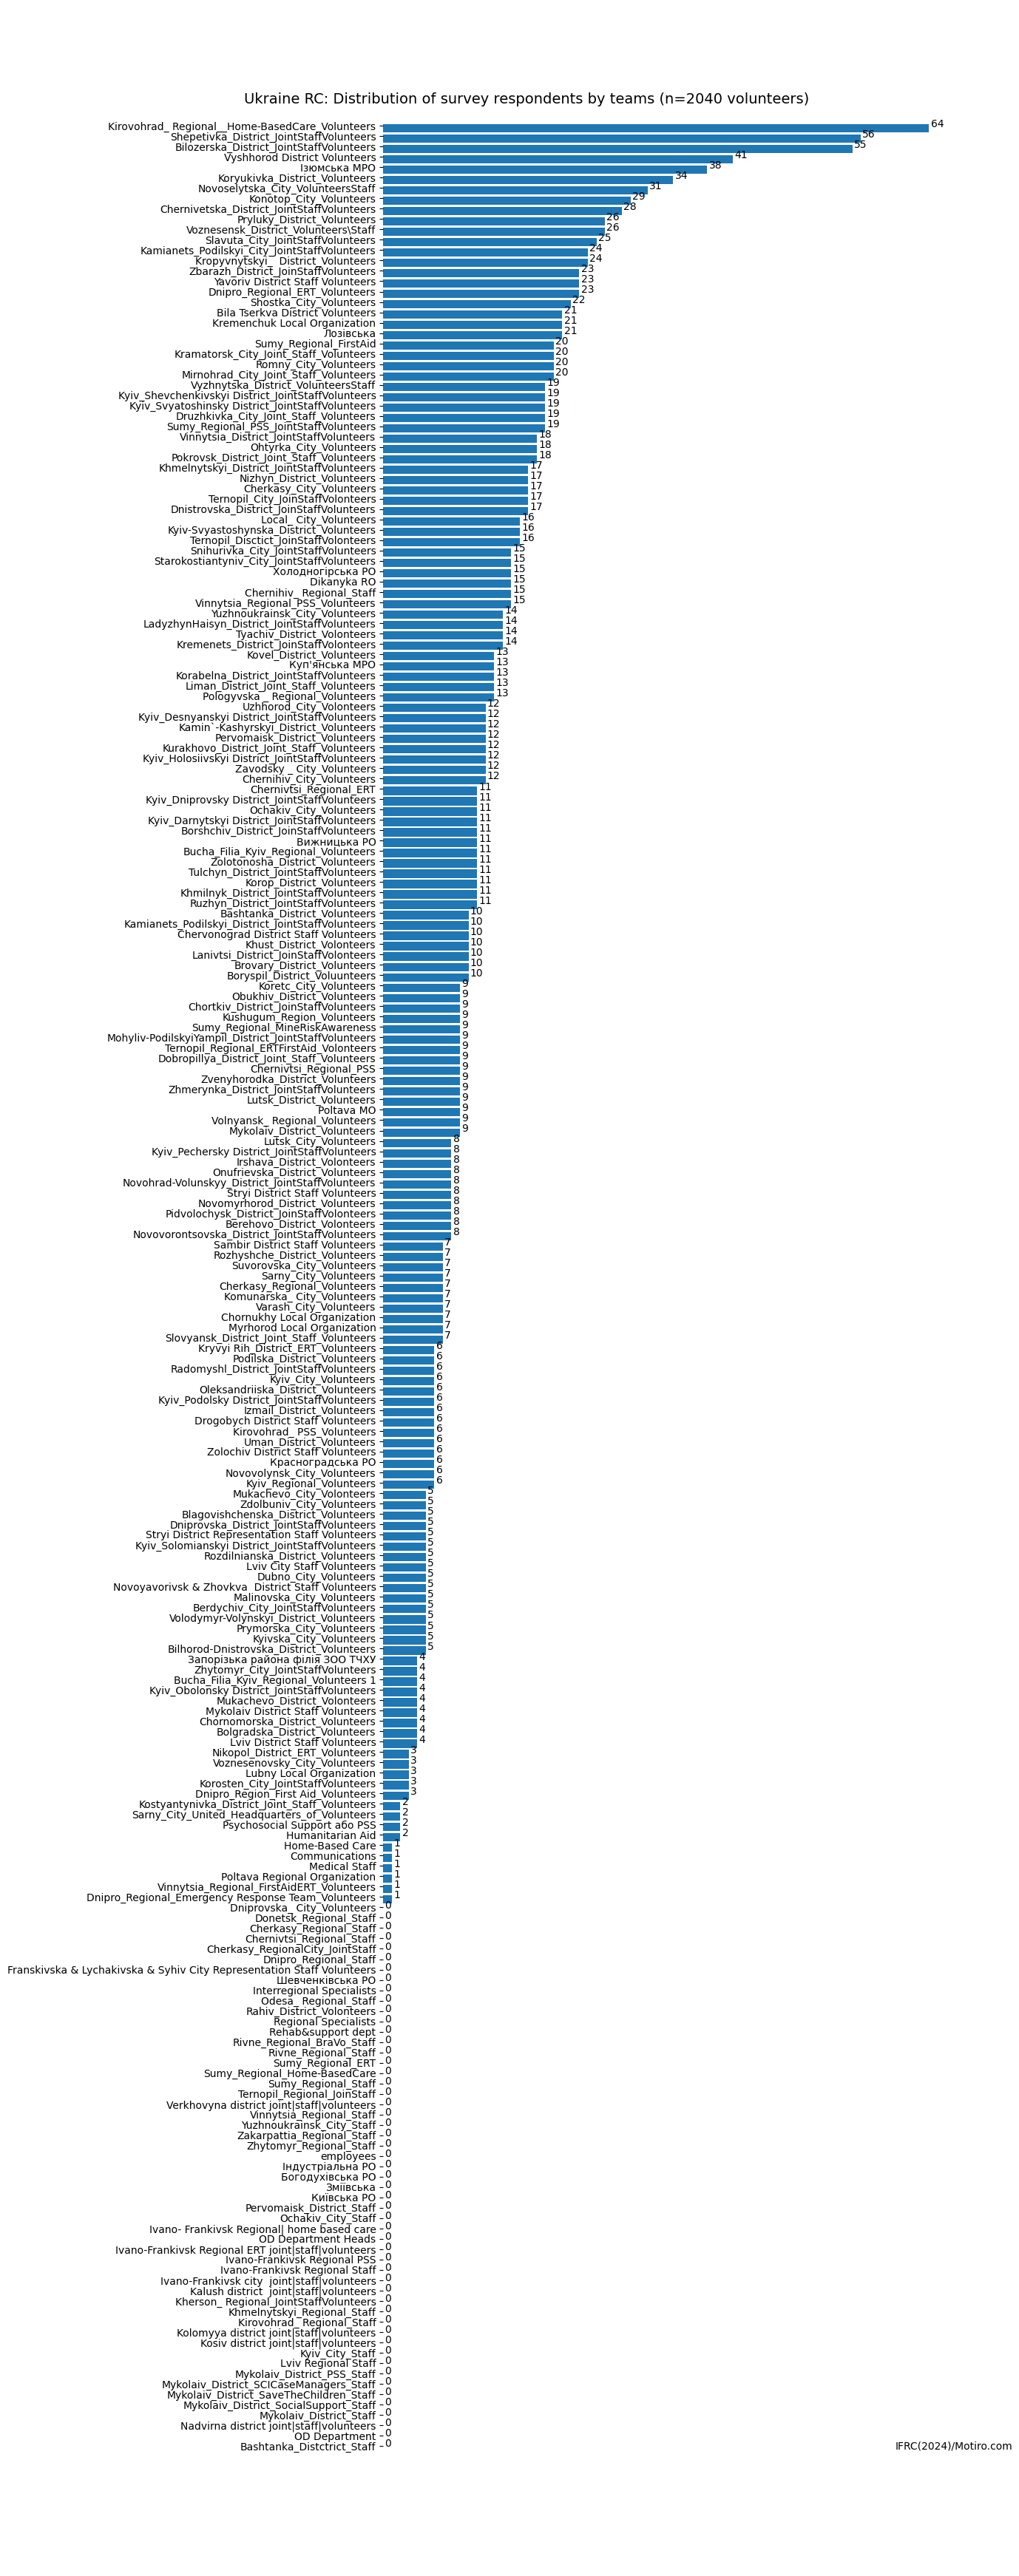

In [14]:
#  UKRAINE RED CROSS - DATA DESCRIPTION - Volunteer Teams

df = pd.read_csv('URC_ALL.csv', sep=",", encoding='utf-8')
df.shape

# Drop from illegitimate teams from dataframe
df = df.drop(df[df['region'] =='dk'].index)
df.shape

# Group the dataframe by teams and calculate the sum of 'Volunteer' 
grouped_df = df.groupby('Team Name').agg({'Volunteer': 'sum'}).sort_values('Volunteer', ascending=True)

# Count the total number of respondents (n)
n = df['Volunteer'].sum()
print(n)

# Get the list of teams
Teams = grouped_df.index

# Set the height of each bar
bar_height = 0.4

# Create the figure and axes
fig, ax = plt.subplots(figsize=(10, 45))

# Create an array of indices for the y-axis positions
y = np.arange(len(Teams))

# Plot the bars for volunteers
ax.barh(y, grouped_df['Volunteer'], height=bar_height*2, label='Volunteer', )
#ax.axvline(x=5, color='gray', linestyle='--')

# remove frame around the plot
sns.despine(ax=None, top=True, right=True, left=True, bottom=True, offset=0, trim=False)

# Plot the bars for staff
# ax.barh(y + bar_height, grouped_df['Staff'], height=bar_height, label='Staff', color='C1')

# Set the y-axis ticks and labels
ax.set_yticks(y + bar_height/2)
ax.set_yticklabels(Teams, size=10)

# Set the x-axis label
#ax.set_xlabel('Number of Respondents')

#remove x axis
plt.xticks([]) 

#annotate bar plot with values
for i in ax.patches:
    ax.text(i.get_width()+0.2, i.get_y()+0.5, str(round((i.get_width()), 2)), size=10)
 
plt.text(60, -0.1, "IFRC(2024)/Motiro.com", fontdict={'size': 10})
ax.set_title(f'Ukraine RC: Distribution of survey respondents by teams (n={n} volunteers)', x=0.25, y=0.96, fontsize=14)

# Adjust the layout to accommodate the y-axis labels
#plt.tight_layout()

plt.savefig('URC-VolRespondentsByTeam.png', bbox_inches='tight', pad_inches=-0)
# Show the plot
plt.show()


583


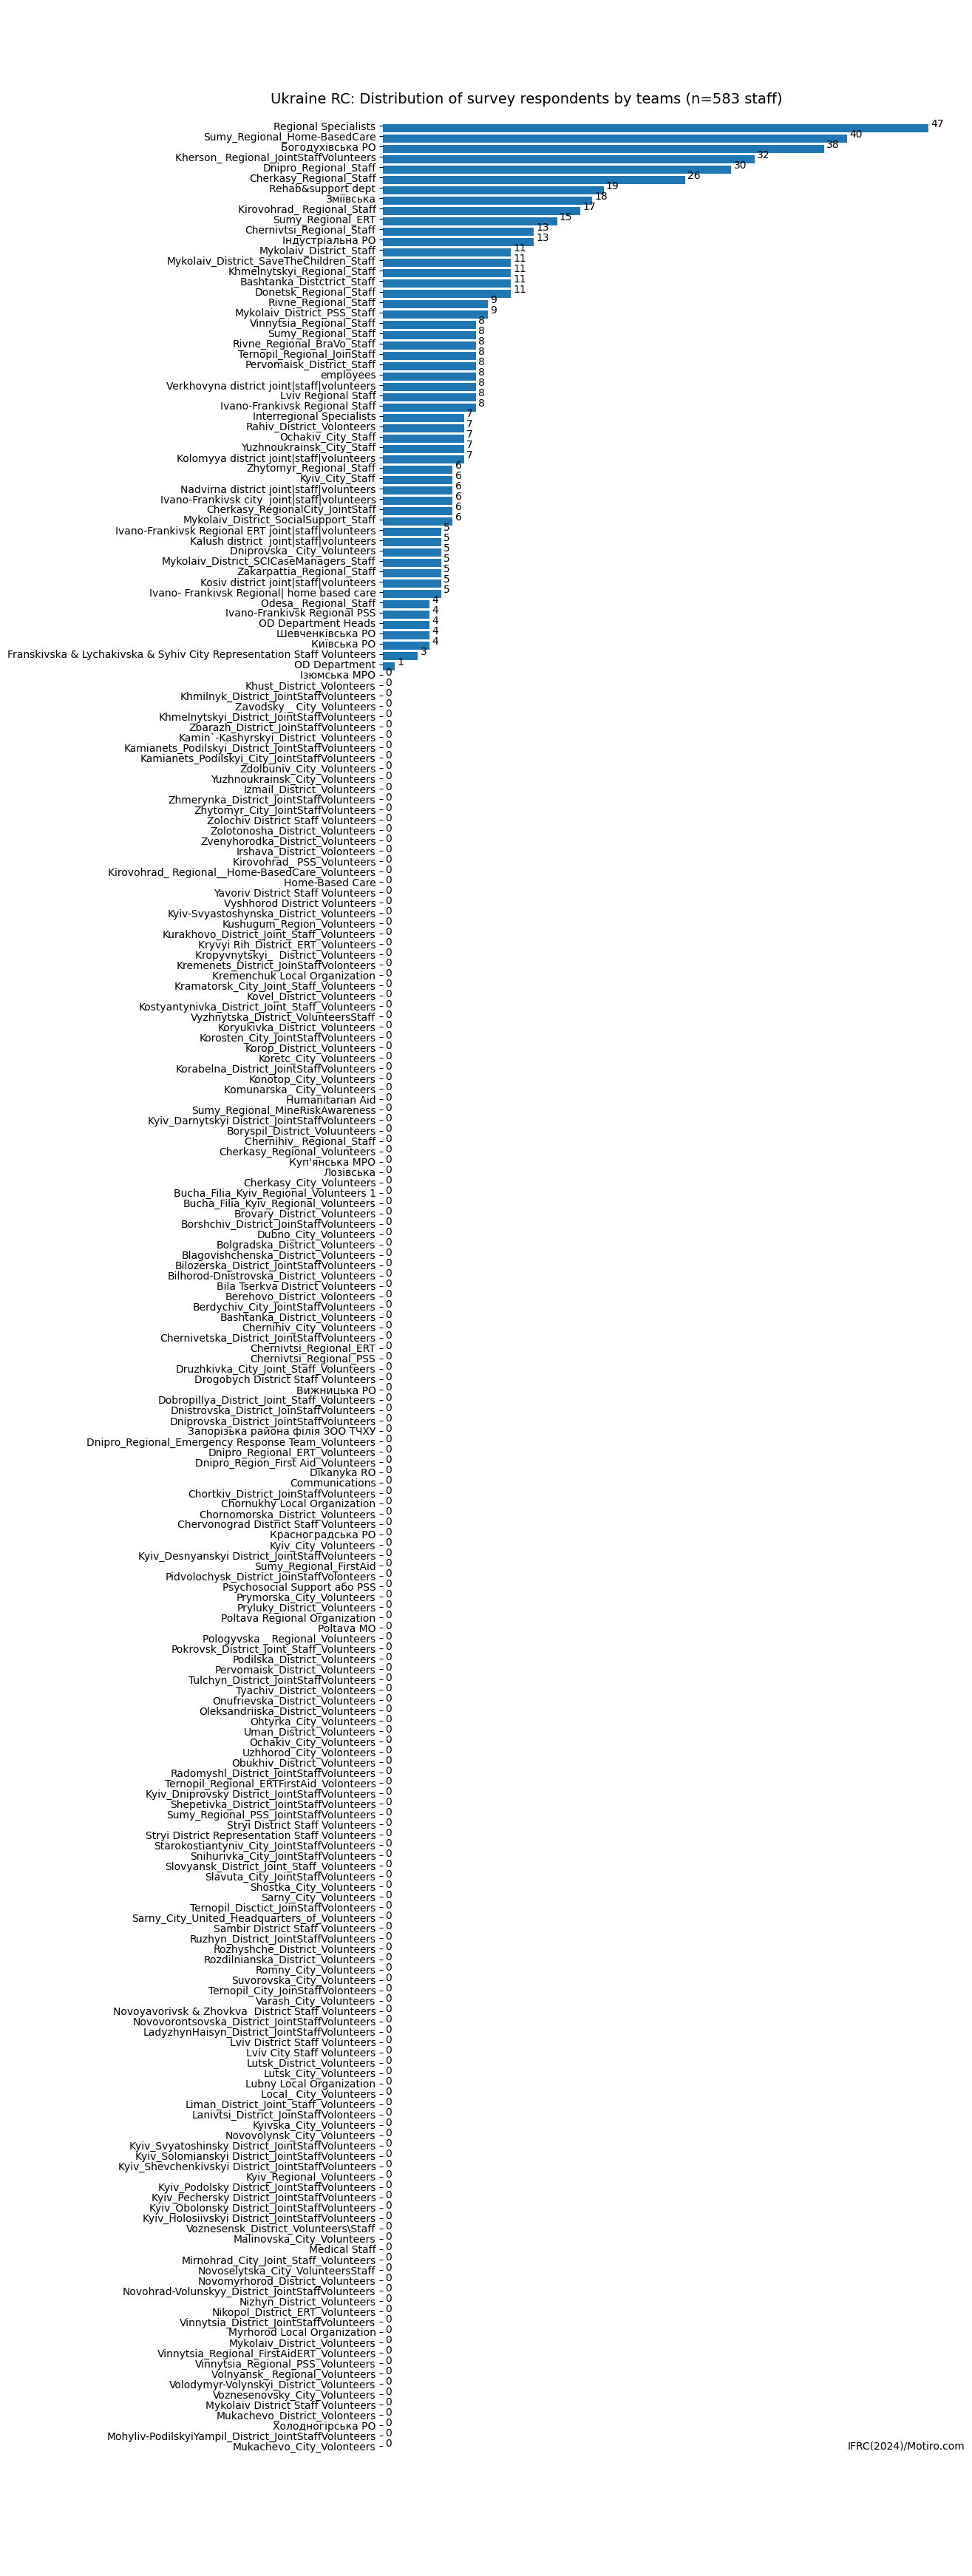

In [15]:
#  UKRAINE RED CROSS - DATA DESCRIPTION - Staff Teams

df = pd.read_csv('URC_ALL.csv', sep=",", encoding='utf-8')
df.shape

# Drop from illegitimate teams from dataframe
df = df.drop(df[df['region'] =='dk'].index)
df.shape

# Group the dataframe by teams and calculate the sum of 'Volunteer' 
grouped_df = df.groupby('Team Name').agg({'Staff': 'sum'}).sort_values('Staff', ascending=True)

# Count the total number of respondents (n)
n = df['Staff'].sum()
print(n)

# Get the list of teams
Teams = grouped_df.index

# Set the height of each bar
bar_height = 0.4

# Create the figure and axes
fig, ax = plt.subplots(figsize=(10, 45))

# Create an array of indices for the y-axis positions
y = np.arange(len(Teams))

# Plot the bars for volunteers
ax.barh(y, grouped_df['Staff'], height=bar_height*2, label='Staff', )
#ax.axvline(x=5, color='gray', linestyle='--')

# remove frame around the plot
sns.despine(ax=None, top=True, right=True, left=True, bottom=True, offset=0, trim=False)

# Plot the bars for staff
# ax.barh(y + bar_height, grouped_df['Staff'], height=bar_height, label='Staff', color='C1')

# Set the y-axis ticks and labels
ax.set_yticks(y + bar_height/2)
ax.set_yticklabels(Teams, size=10)

# Set the x-axis label
#ax.set_xlabel('Number of Respondents')

#remove x axis
plt.xticks([]) 

#annotate bar plot with values
for i in ax.patches:
    ax.text(i.get_width()+0.2, i.get_y()+0.5, str(round((i.get_width()), 2)), size=10)
 
plt.text(40, -0.1, "IFRC(2024)/Motiro.com", fontdict={'size': 10})
ax.set_title(f'Ukraine RC: Distribution of survey respondents by teams (n={n} staff)', x=0.25, y=0.96, fontsize=14)

# Adjust the layout to accommodate the y-axis labels
#plt.tight_layout()

plt.savefig('URC-StaffRespondentsByTeam.png', bbox_inches='tight', pad_inches=-0)
# Show the plot
plt.show()


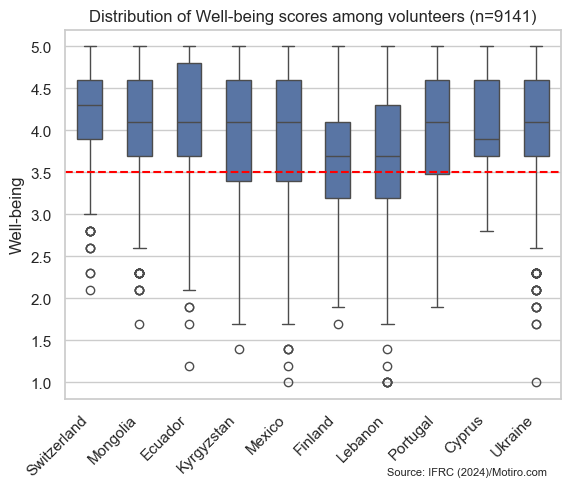

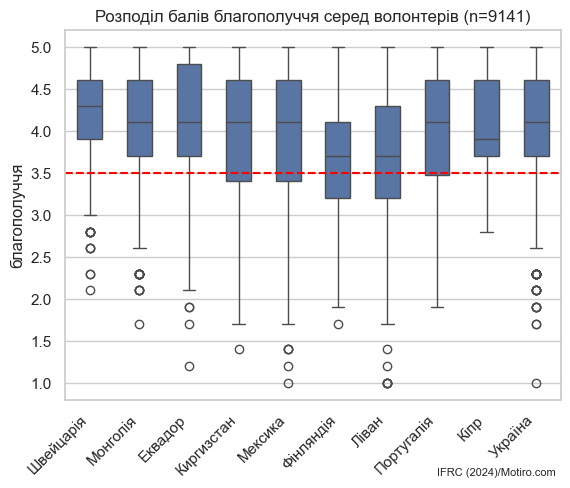

In [43]:
# STAFF and VOLUNTEERS - Box plots to see distribution in well-being scores in key dimensions,
# by country

df = pd.read_csv("Individual.csv", sep=",", encoding='utf-8')

# Filter the dataframe for 'Position' = 'Volunteer'
df = df[df['Position'] == 'Volunteer']

# Count the total number of respondents (n)
n = df['Volunteer'].sum() + df['Staff'].sum()

# define the countries to plot
countries = ['Ukraine',
             'Switzerland',
             'Mongolia',
             'Ecuador',
             'Kyrgyzstan',
             'Mexico',
             'Finland',
             'Lebanon',
             'Portugal',
             'Cyprus',
]
# Filter the dataframe for the specified countries
df = df[df['Country'].isin(countries)]


bplot=sns.boxplot(y='Well-being', x='Country', 
                 data=df, 
                 width=0.5)

# plt.setp(bplot.get_xticklabels(), rotation=45)
plt.xlabel('')
#rotation of x-axis labels
plt.xticks(rotation=45, ha='right')

# Add horizontal line to represent cut off values
plt.axhline(y=3.5, color='red', linestyle='--')

# Set the title
bplot.set_title(f'Distribution of Well-being scores among volunteers (n={n})')

plt.text(6, -0.1, "Source: IFRC (2024)/Motiro.com", fontdict={'size': 8})

# Save and show the plot
plt.savefig('URC-VOL-STAFF_Wellbeing_boxplot.png', bbox_inches='tight', pad_inches=0)
plt.show()

# Prepare the same boxplot with text in Ukrainian not English
# Translate into Ukrainian country names
country_translation = {
    'Ukraine': 'Україна',
    'Switzerland': 'Швейцарія',
    'Mongolia': 'Монголія',
    'Ecuador': 'Еквадор',  
    'Kyrgyzstan': 'Киргизстан',
    'Mexico': 'Мексика',
    'Finland': 'Фінляндія',
    'Lebanon': 'Ліван',
    'Portugal': 'Португалія',
    'Cyprus': 'Кіпр',
}
# Replace country names in the dataframe
df['Country'] = df['Country'].replace(country_translation)
# Create the boxplot with translated country names
bplot=sns.boxplot(y='Well-being', x='Country', 
                 data=df, 
                 width=0.5)
# plt.setp(bplot.get_xticklabels(), rotation=45)
plt.xlabel('')
plt.ylabel('благополуччя')
#rotation of x-axis labels
plt.xticks(rotation=45, ha='right')
# Add horizontal line to represent cut off values
plt.axhline(y=3.5, color='red', linestyle='--')
# Set the title
bplot.set_title(f'Розподіл балів благополуччя серед волонтерів (n={n})')
plt.text(7, -0.1, "IFRC (2024)/Motiro.com", fontdict={'size': 8})
# Save and show the plot
plt.savefig('URC-VOL-STAFF_Wellbeing_boxplot_UA.png', bbox_inches='tight', pad_inches=0)



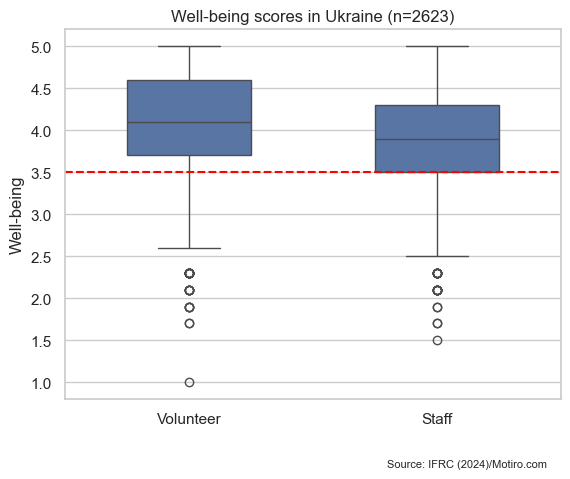

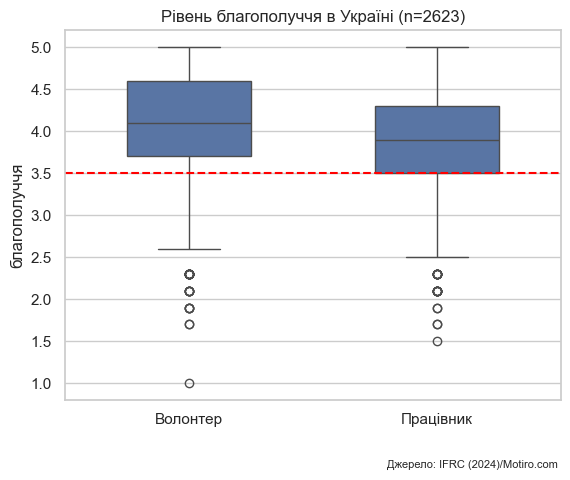

In [41]:
# STAFF and VOLUNTEERS - Box plots to see distribution in well-being scores in key dimensions, by country

df = pd.read_csv("URC_ALL.csv", sep=",", encoding='utf-8')

# Filter the dataframe for 'Position' = 'Volunteer'
#df = df[df['Position'] == 'Staff']

# Count the total number of respondents (n)
n = df['Volunteer'].sum() + df['Staff'].sum()

# Count the total number of respondents (n)
#n = df['Volunteer'].sum() + df['Staff'].sum()

bplot=sns.boxplot(y='Well-being', x='Position', 
                 data=df, 
                 width=0.5)

# plt.setp(bplot.get_xticklabels(), rotation=45)
plt.xlabel('')

# Add horizontal line to represent cut off values
plt.axhline(y=3.5, color='red', linestyle='--')

# Set the title
bplot.set_title(f'Well-being scores in Ukraine (n={n})')

plt.text(0.8, -0.01, "Source: IFRC (2024)/Motiro.com", fontdict={'size': 8})

# Save and show the plot
plt.savefig('URC-VOL-STAFF_Wellbeing_boxplot.png', bbox_inches='tight', pad_inches=0)
plt.show()

# Prepare the same boxplot with text in Ukrainian not English
#Create a new column 'Position' with values 'Staff' and 'Volunteer in Ukranian
df['Position'] = df['Position'].replace({'Staff': 'Працівник', 'Volunteer': 'Волонтер'})


bplot=sns.boxplot(y='Well-being', x='Position', 
                 data=df, 
                 width=0.5)
# plt.setp(bplot.get_xticklabels(), rotation=45)
plt.xlabel('')
plt.ylabel('благополуччя')
# Add horizontal line to represent cut off values
plt.axhline(y=3.5, color='red', linestyle='--')
# Set the title
bplot.set_title(f'Рівень благополуччя в Україні (n={n})')
plt.text(0.8, -0.01, "Джерело: IFRC (2024)/Motiro.com", fontdict={'size': 8})
# Save and show the plot
plt.savefig('URC-VOL-STAFF_Wellbeing_boxplot_UA.png', bbox_inches='tight', pad_inches=0)


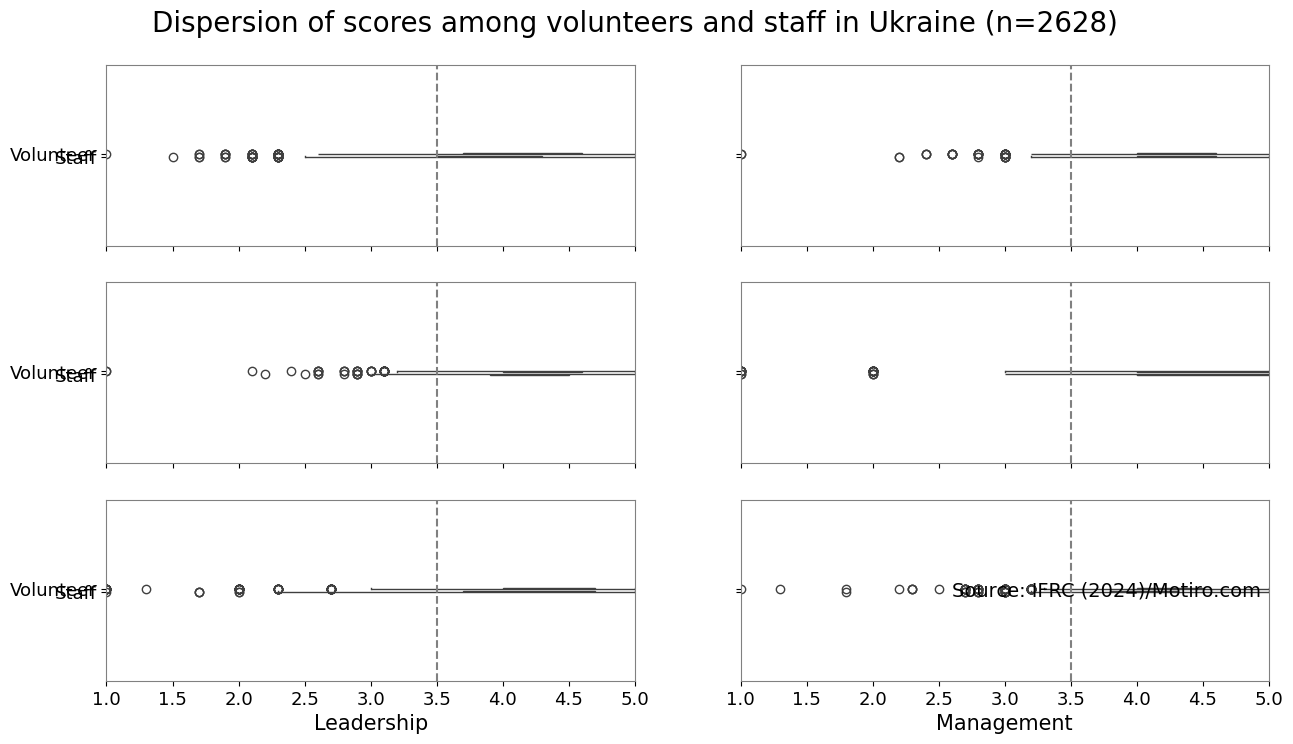

In [9]:
# Box plots to see dispersion in key dimensions

df = pd.read_csv("Individual.csv", sep=",", encoding='utf-8')

# Specify the x-axis and y-axis variables for each plot
variables = [
    ('Position', 'Well-being'),
    ('Position', 'Engagement'),
    ('Position', 'Needs'),
    ('Position', 'Stay'),
    ('Position', 'Leadership'),
    ('Position', 'Management')
    ]

# Create a 3x3 grid of subplots sharing the same x-axis and y-axis
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 8), sharex=True, sharey=True)

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Filter the dataframe for 'Position' = 'Volunteer'
#df = df[df['Position'] == 'Staff']

# Filter the DataFrame for teams from 'Ukraine'
df = df[df['Country'].isin(['Ukraine'])].copy()

# Count the total number of respondents (n)
n = df['Volunteer'].sum() + df['Staff'].sum()

for i, (x_var, y_var) in enumerate(variables):
    ax = axes[i]  # Get the current subplot
    bplot=sns.boxplot(y=x_var, x=y_var, 
                 data=df, 
                 width=0.4,
                 ax=ax)
    bplot.set(ylabel=None)
    # Add vertical line to represent cut off values
    ax.axvline(x=3.5, color='gray', linestyle='--')
    ax.set_xlabel(y_var, fontsize=15, x=0.5, y=100)
    ax.tick_params(axis='both', labelsize=13)
    ax.spines['bottom'].set_color('gray')
    ax.spines['top'].set_color('gray')
    ax.spines['right'].set_color('gray')
    ax.spines['left'].set_color('gray')
    #set margin
    ax.margins(x=0, y=23)

# Set the title
ax.set_title(f'Dispersion of scores among volunteers and staff in Ukraine (n={n})',
pad=50, y=3.2, x=-0.2, fontdict={'size': 20})

plt.text(2.6, 2.5, "Source: IFRC (2024)/Motiro.com", fontdict={'size': 14})

# Save and show the plot
plt.savefig('VOL-STAFF_combined URC boxplot.png', bbox_inches='tight', pad_inches=0)
plt.show()

2037 7355 9392


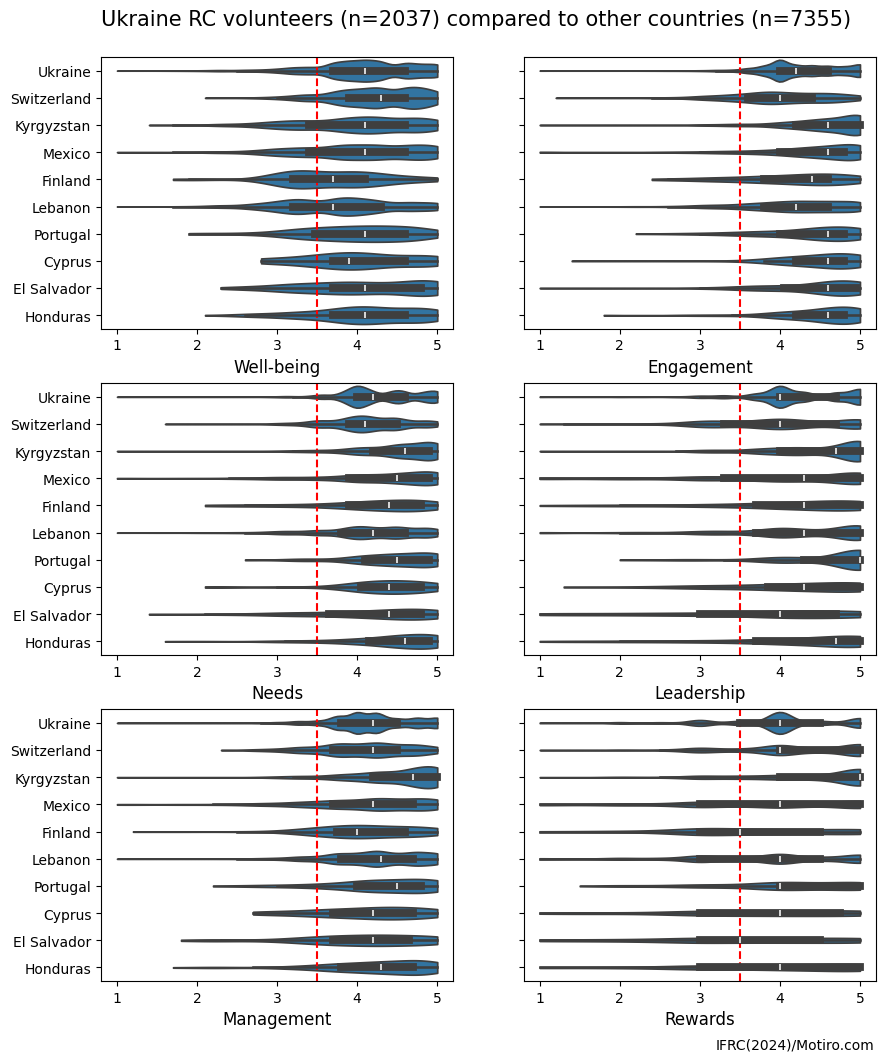

In [11]:
# Compare URC with volunteer benchmaks from other countries
file_path = "Individual.csv"
df = pd.read_csv(file_path, sep=",", encoding='utf-8')

# Filter the dataframe for 'Position' = 'Volunteer'
VOL_df = df[df['Position'] == 'Volunteer'].copy()

# Get the DataFrame for teams from 'Ukraine'
URC_df = pd.read_csv("URC_ALL.csv", sep=",", encoding='utf-8')

#count the number of volunteers from Ukraine
n_URC =  URC_df['Volunteer'].sum()

# Filter the DataFrame for selected countries with many volunteers
Country_df = VOL_df[VOL_df['Country'].isin(['Ukraine', 'Lebanon', 'Mexico', 'Honduras', 'El Salvador', 'Portugal', 'Kyrgyzstan', 'Finland', 'Cyprus', 'Switzerland'])].copy()

#count the number of volunteers from the other countries
n_country =  Country_df['Volunteer'].sum()

#total sample for the graphs:
n = n_URC + n_country

print(n_URC, n_country, n)

# Merge the two dataframes
URC_df = pd.concat([URC_df, Country_df], ignore_index=True)

# violin plots by team for selected variables
variables = [
    ('Well-being'),
    ('Engagement'),
    ('Needs'),
    ('Leadership'),
    ('Management'),
    ('Rewards')
    ]

# Create a 3x2 grid of subplots sharing the same x-axis and y-axis
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 12), sharex=False, sharey=True)

# Flatten the axes array for easier iteration
axes = axes.flatten()

for i, (x_var) in enumerate(variables):
    ax = axes[i]  # Get the current subplot
    ax.axvline(x=3.5, color='red', linestyle='--')
    ax=sns.violinplot(
        data=URC_df, x=x_var,
        y='Country', #replace team name with circle to group URC teams
        cut=0, ax=ax)
    ax.set_ylabel('')
    ax.set_xlabel(x_var, fontsize=12, x=0.5, y=100) # Change y value
        
plt.suptitle(f'Ukraine RC volunteers (n={n_URC}) compared to other countries (n={n_country})', x=0.5, y=0.92, fontsize=15)
plt.text(3.2, 12, "IFRC(2024)/Motiro.com", fontdict={'size': 10})

plt.savefig('URC_countries.png', bbox_inches='tight', pad_inches=0.1)

2040 7710 9750
2040 7710 9750


Text(3.2, 12.3, 'IFRC(2024)/Motiro.com')

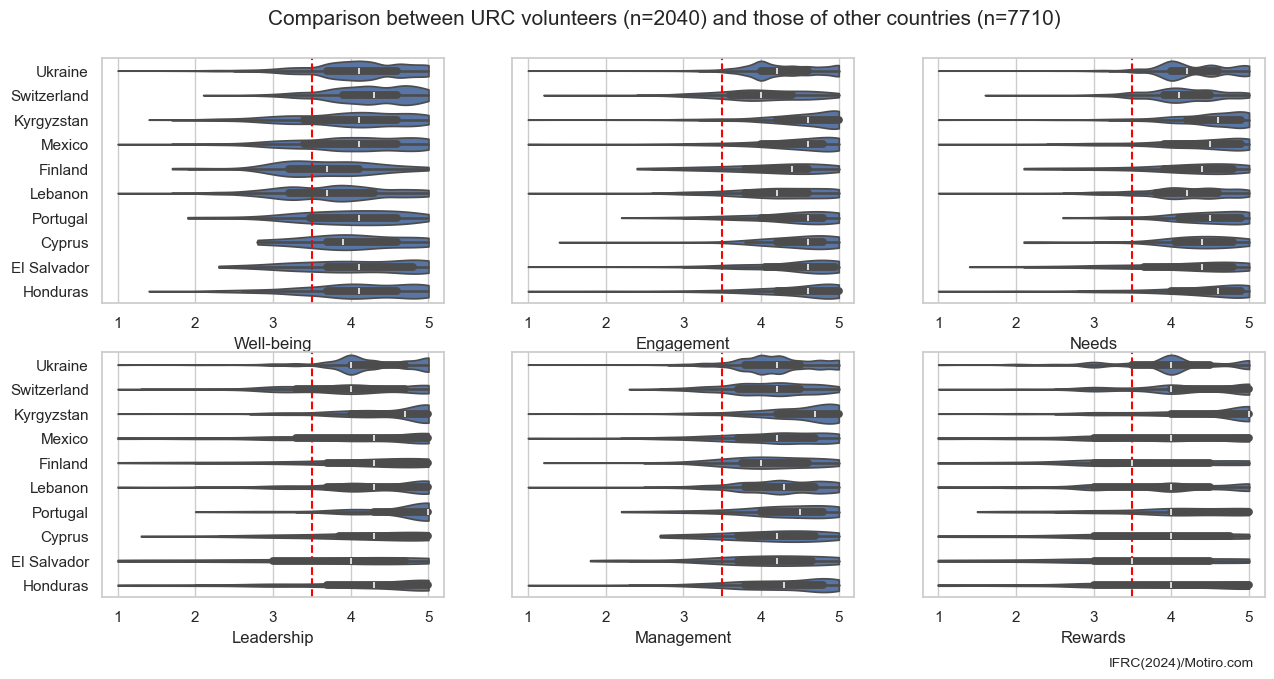

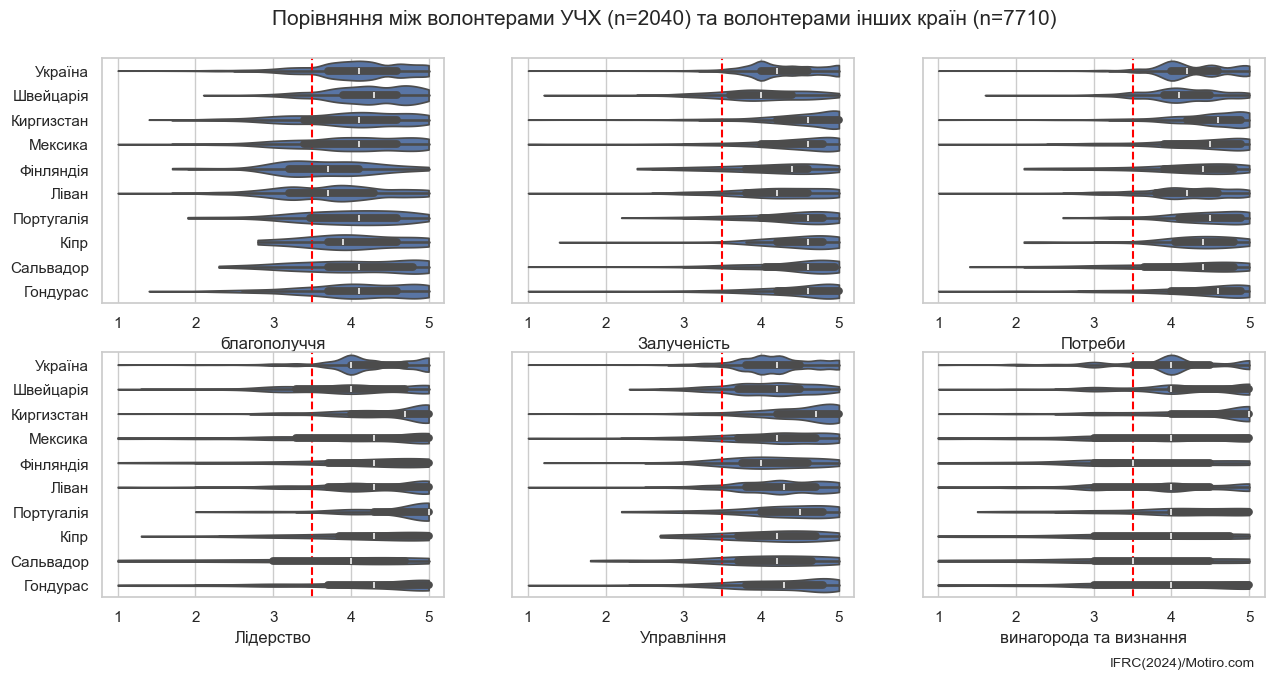

In [42]:
# SLIDE. Compare URC with volunteer benchmaks from other countries
file_path = "Individual.csv"
df = pd.read_csv(file_path, sep=",", encoding='utf-8')

# Filter the dataframe for 'Position' = 'Volunteer'
VOL_df = df[df['Position'] == 'Volunteer'].copy()

# Get the DataFrame for teams from 'Ukraine'
URC_df = pd.read_csv("URC_ALL.csv", sep=",", encoding='utf-8')

#count the number of volunteers from Switzerland
n_URC =  URC_df['Volunteer'].sum()

# Filter the DataFrame for selected countries with many volunteers
Country_df = VOL_df[VOL_df['Country'].isin(['Ukraine', 'Lebanon', 'Mexico', 'Honduras', 'El Salvador', 'Portugal', 'Kyrgyzstan', 'Finland', 'Cyprus', 'Switzerland'])].copy()

#count the number of volunteers from the other countries
n_country =  Country_df['Volunteer'].sum()

#total sample for the graphs:
n = n_URC + n_country

print(n_URC, n_country, n)

# Merge the two dataframes
URC_df = pd.concat([URC_df, Country_df], ignore_index=True)

# violin plots by team for selected variables
variables = [
    ('Well-being'),
    ('Engagement'),
    ('Needs'),
    ('Leadership'),
    ('Management'),
    ('Rewards')
    ]

# Create a 3x2 grid of subplots sharing the same x-axis and y-axis
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 7), sharex=False, sharey=True)

# Flatten the axes array for easier iteration
axes = axes.flatten()

for i, (x_var) in enumerate(variables):
    ax = axes[i]  # Get the current subplot
    ax.axvline(x=3.5, color='red', linestyle='--')
    ax=sns.violinplot(
        data=URC_df, x=x_var,
        y='Country', #replace team name with circle to group URC teams
        cut=0, ax=ax)
    ax.set_ylabel('')
    ax.set_xlabel(x_var, fontsize=12, x=0.5, y=100) # Change y value
        
plt.suptitle(f"Comparison between URC volunteers (n={n_URC}) and those of other countries (n={n_country})", 
             x=0.5, y=0.95, fontsize=15)
plt.text(3.2, 12.3, "IFRC(2024)/Motiro.com", fontdict={'size': 10})

plt.savefig('URC_countries slide.png', bbox_inches='tight', pad_inches=0.1)

#Plot the same violin plots with text in Ukrainian not English
# Create a copy of the DataFrame for teams from 'Ukraine'
URC_df = pd.read_csv("URC_ALL.csv", sep=",", encoding='utf-8')
#count the number of volunteers from Ukraine
n_URC =  URC_df['Volunteer'].sum()
# Filter the DataFrame for selected countries with many volunteers
Country_df = VOL_df[VOL_df['Country'].isin(['Ukraine', 'Lebanon', 'Mexico', 'Honduras', 'El Salvador', 'Portugal', 'Kyrgyzstan', 'Finland', 'Cyprus', 'Switzerland'])].copy()
#count the number of volunteers from the other countries
n_country =  Country_df['Volunteer'].sum()
#total sample for the graphs:
n = n_URC + n_country
print(n_URC, n_country, n)
# Merge the two dataframes
URC_df = pd.concat([URC_df, Country_df], ignore_index=True)
# violin plots by team for selected variables
variables = [
    ('Well-being'),
    ('Engagement'),
    ('Needs'),
    ('Leadership'),
    ('Management'),
    ('Rewards')
    ]
#Translate name of countries in Ukrainian
country_translation = {
    'Ukraine': 'Україна',
    'Lebanon': 'Ліван',
    'Mexico': 'Мексика',
    'Honduras': 'Гондурас',
    'El Salvador': 'Сальвадор',
    'Portugal': 'Португалія',
    'Kyrgyzstan': 'Киргизстан',
    'Finland': 'Фінляндія',
    'Cyprus': 'Кіпр',
    'Switzerland': 'Швейцарія'
}
# Replace country names in the 'Country' column with their Ukrainian translations
URC_df['Country'] = URC_df['Country'].replace(country_translation)

#Translate the names of the columns in the variables list
variables_translation = {
    'Well-being': 'благополуччя',
    'Engagement': 'Залученість',
    'Needs': 'Потреби',
    'Leadership': 'Лідерство',
    'Management': 'Управління',
    'Rewards': 'винагорода та визнання'
}
# Replace variable names in the variables list with their Ukrainian translations
variables = [(variables_translation.get(x_var, x_var)) for x_var in variables]

# Also rename the columns in URC_df to Ukrainian for plotting
URC_df = URC_df.rename(columns=variables_translation)

# Create a 3x2 grid of subplots sharing the same x-axis and y-axis
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 7), sharex=False, sharey=True)
# Flatten the axes array for easier iteration
axes = axes.flatten()
for i, (x_var) in enumerate(variables):
    ax = axes[i]  # Get the current subplot
    ax.axvline(x=3.5, color='red', linestyle='--')
    ax=sns.violinplot(
        data=URC_df, x=x_var,
        y='Country', #replace team name with circle to group URC teams
        cut=0, ax=ax)
    ax.set_ylabel('')
    ax.set_xlabel(x_var, fontsize=12, x=0.5, y=100) # Change y value
plt.suptitle(f"Порівняння між волонтерами УЧХ (n={n_URC}) та волонтерами інших країн (n={n_country})", 
             x=0.5, y=0.95, fontsize=15)
plt.text(3.2, 12.3, "IFRC(2024)/Motiro.com", fontdict={'size': 10})

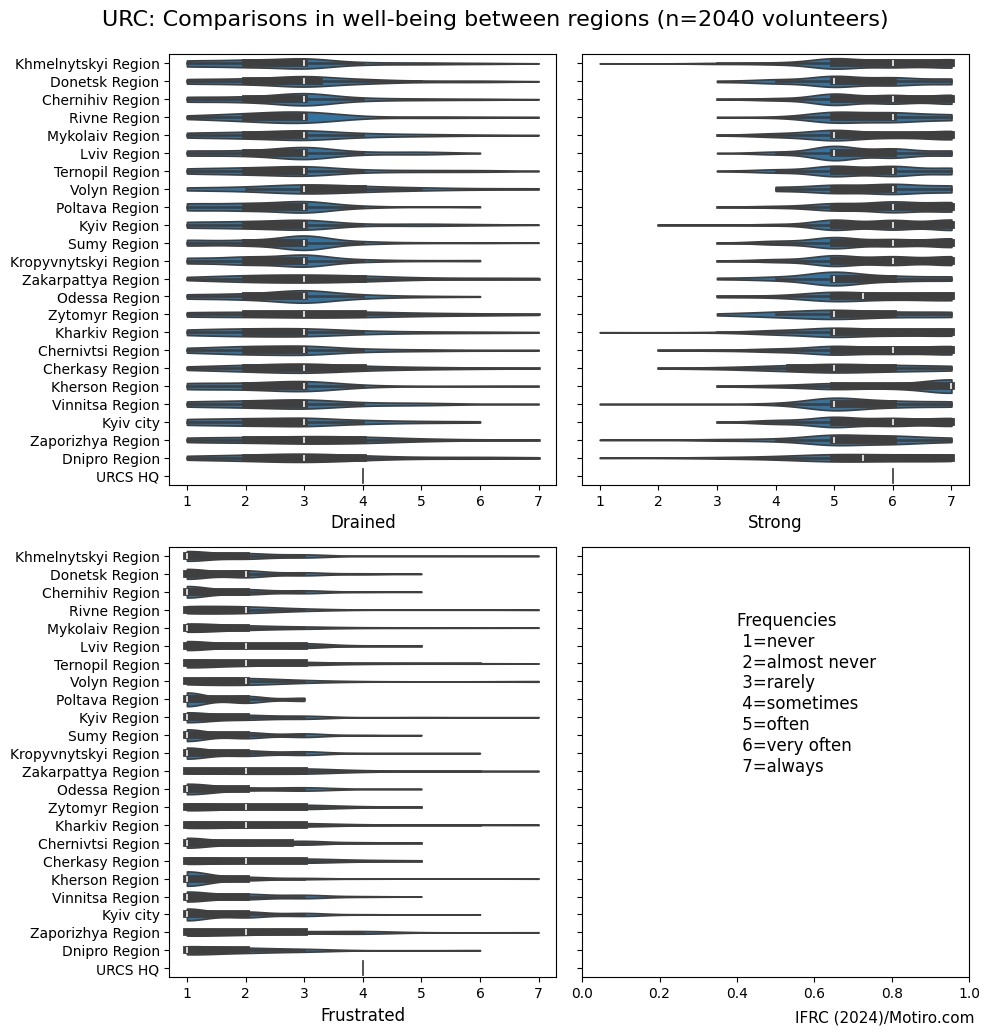

In [17]:
# Compare Ukraine RC regions in VOLUNTEER WELL-BEING
# plot includes only 3 questions are on a frequency scale of 7 to avoid confusion.
# Get the DataFrame for teams from 'Ukraine'
file_path = "URC_ALL.csv"
df = pd.read_csv(file_path, sep=",", encoding='utf-8')

#count the number of respondents from Ukraine
n =  df['Volunteer'].sum()

# Filter the dataframe for 'Position' = 'Volunteer'
VOL_df = df[df['Position'] == 'Volunteer'].copy()

# violin plots by team for selected variables
variables = [
    ('Drained'),
    ('Strong'),
    ('Frustrated')
    ]

# Create a 2x2 grid of subplots sharing the same x-axis and y-axis
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10), sharex=False, sharey=True)
sns.set_style(style=None, rc=None)

# Flatten the axes array for easier iteration
axes = axes.flatten()

for i, (x_var) in enumerate(variables):
    ax = axes[i]  # Get the current subplot
    ax=sns.violinplot(
        data=VOL_df, x=x_var,
        y='region',
        cut=0, ax=ax)
    ax.set_ylabel('')
    ax.set_xlabel(x_var, fontsize=12, x=0.5, y=100) # Change y value
        
# Adjust the spacing between subplots
plt.tight_layout()

plt.suptitle(f'URC: Comparisons in well-being between regions (n={n} volunteers)', x=0.5, y=1.03, fontsize=16)

plt.text(0.4, 12,
"Frequencies \n 1=never \n 2=almost never \n 3=rarely \n 4=sometimes \n 5=often \n 6=very often \n 7=always",
fontdict={'size': 12})

plt.text(0.55, 26, "IFRC (2024)/Motiro.com", fontdict={'size': 11})

plt.savefig('URC_Team Wellbeing frequencies violinplots.png', bbox_inches='tight', pad_inches=0.1)

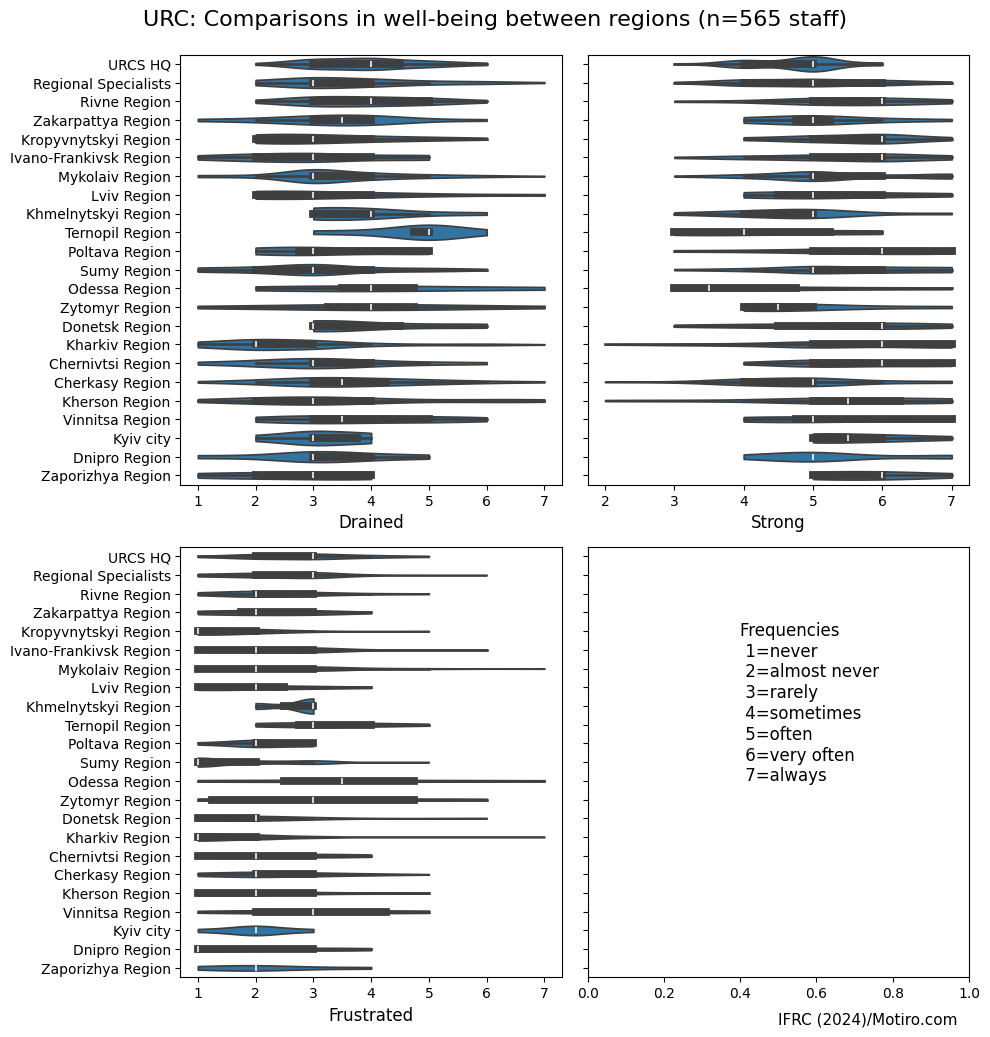

In [20]:
# Compare Ukraine RC regions in STAFF WELL-BEING
# plot includes only 3 questions are on a frequency scale of 7 to avoid confusion.
# Get the DataFrame for teams from 'Ukraine'
df = pd.read_csv("URC_ALL.csv", sep=",", encoding='utf-8')

#count the number of respondents from Ukraine
n =  df['Staff'].sum()

# Filter the dataframe for 'Position' = 'Staff'
Staff_df = df[df['Position'] == 'Staff'].copy()

# violin plots by team for selected variables
variables = [
    ('Drained'),
    ('Strong'),
    ('Frustrated')
    ]

# Create a 2x2 grid of subplots sharing the same x-axis and y-axis
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10), sharex=False, sharey=True)
sns.set_style(style=None, rc=None)

# Flatten the axes array for easier iteration
axes = axes.flatten()

for i, (x_var) in enumerate(variables):
    ax = axes[i]  # Get the current subplot
    ax=sns.violinplot(
        data=Staff_df, x=x_var,
        y='region',
        cut=0, ax=ax)
    ax.set_ylabel('')
    ax.set_xlabel(x_var, fontsize=12, x=0.5, y=100) # Change y value
        
# Adjust the spacing between subplots
plt.tight_layout()

plt.suptitle(f'URC: Comparisons in well-being between regions (n={n} staff)', x=0.5, y=1.03, fontsize=16)

plt.text(0.4, 12,
"Frequencies \n 1=never \n 2=almost never \n 3=rarely \n 4=sometimes \n 5=often \n 6=very often \n 7=always",
fontdict={'size': 12})

plt.text(0.5, 25, "IFRC (2024)/Motiro.com", fontdict={'size': 11})

plt.savefig('URC_Team Wellbeing frequencies violinplots.png', bbox_inches='tight', pad_inches=0.1)

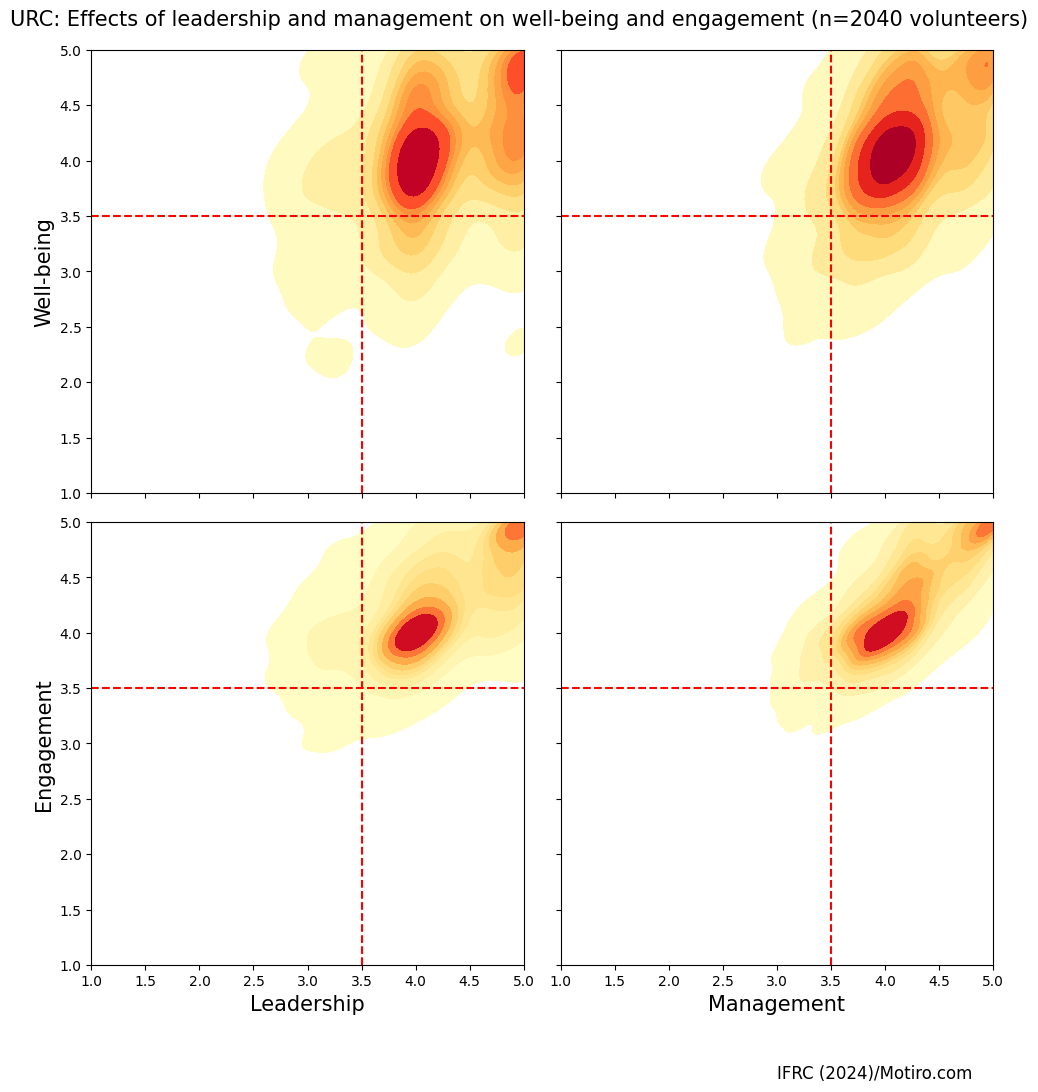

In [18]:
# Combined heatmaps Ukraine RED CROSS
df = pd.read_csv("URC_ALL.csv", sep=",", encoding='utf-8')

# Count the total number of respondents (n)
n = df['Volunteer'].sum()

fig, axs = plt.subplots(2, 2, figsize=(10, 10), sharex=True, sharey=True)

# Plot density heatmaps using sns.kdeplot
ax = sns.kdeplot(y=df['Well-being'], x=df['Leadership'], cmap='YlOrRd', fill=True, ax=axs[0, 0])
ax.axvline(x=3.5, color='red', linestyle='--')
ax.axhline(y=3.5, color='red', linestyle='--')
ax.set_xlim(1, 5)
ax.set_ylim(1, 5)
ax.yaxis.label.set_size(15)
ylabels = ['{:,.0f}']
ax = sns.kdeplot(y=df['Well-being'], x=df['Management'], cmap='YlOrRd', fill=True, ax=axs[0, 1])
ax.axvline(x=3.5, color='red', linestyle='--')
ax.axhline(y=3.5, color='red', linestyle='--')
ax.xaxis.label.set_size(15)
ax = sns.kdeplot(y=df['Engagement'], x=df['Leadership'], cmap='YlOrRd', fill=True, ax=axs[1, 0])
ax.axvline(x=3.5, color='red', linestyle='--')
ax.axhline(y=3.5, color='red', linestyle='--')
ax.yaxis.label.set_size(15)
ax.xaxis.label.set_size(15)
ylabels = ['{:,.0f}']
ax = sns.kdeplot(y=df['Engagement'], x=df['Management'], cmap='YlOrRd', fill=True, ax=axs[1, 1])
ax.axvline(x=3.5, color='red', linestyle='--')
ax.axhline(y=3.5, color='red', linestyle='--')
ax.xaxis.label.set_size(15)

# Adjust the spacing between subplots
plt.tight_layout()

plt.suptitle(f'URC: Effects of leadership and management on well-being and engagement (n={n} volunteers)',
             y=1.02, x=0.5, size=15)

plt.text(3, -0.02, "IFRC (2024)/Motiro.com", fontdict={'size': 12})

plt.savefig('URC heatmaps WB,Eng - Lead,Mgt.png', bbox_inches='tight', pad_inches=0)

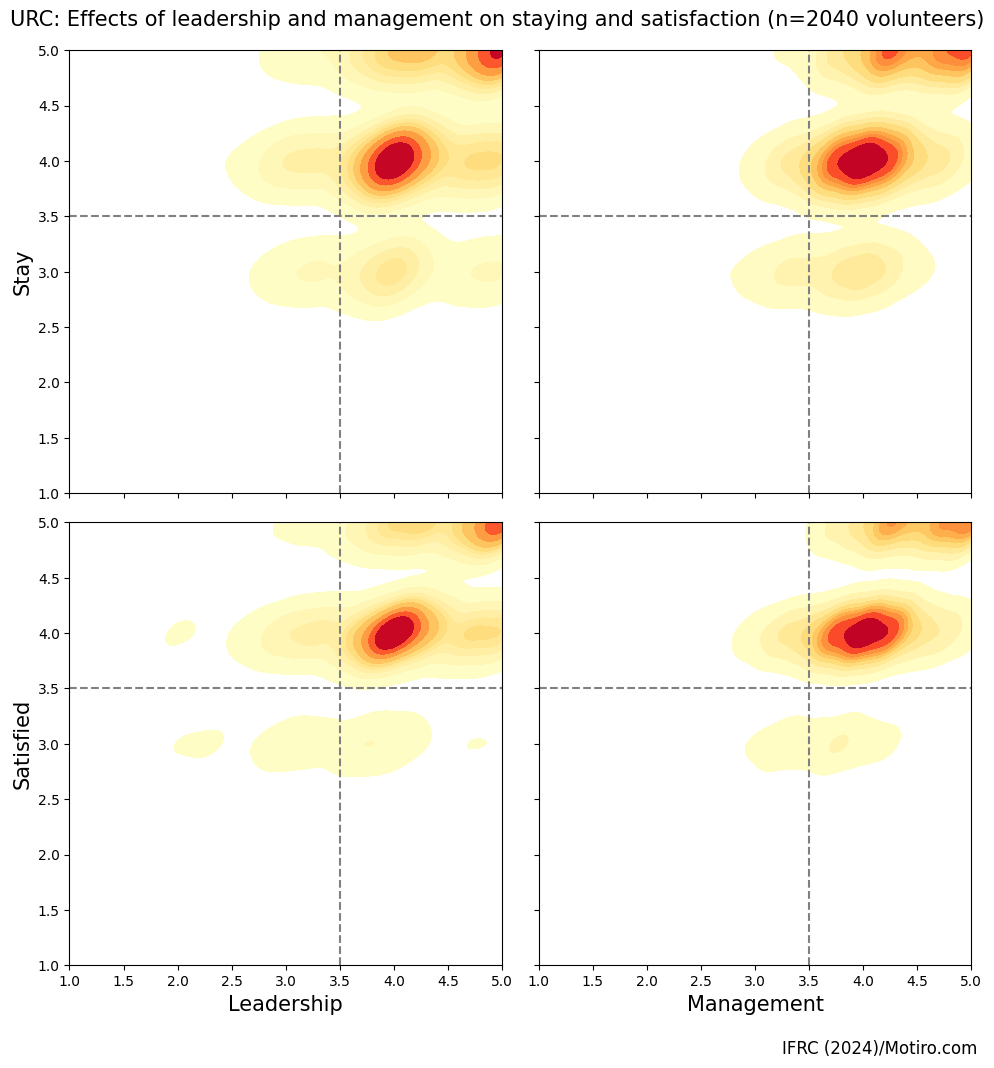

In [19]:
# Combined heatmaps UKRAINE RED CROSS
df = pd.read_csv("URC_ALL.csv", sep=",", encoding='utf-8')

# Count the total number of respondents (n)
n = df['Volunteer'].sum()

fig, axs = plt.subplots(2, 2, figsize=(10, 10), sharex=True, sharey=True)

# Plot density heatmaps using sns.kdeplot
ax = sns.kdeplot(y=df['Stay'], x=df['Leadership'], cmap='YlOrRd', fill=True, ax=axs[0, 0])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.set_xlim(1, 5)
ax.set_ylim(1, 5)
ax.yaxis.label.set_size(15)
ylabels = ['{:,.0f}']
ax = sns.kdeplot(y=df['Stay'], x=df['Management'], cmap='YlOrRd', fill=True, ax=axs[0, 1])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.xaxis.label.set_size(15)
ax = sns.kdeplot(y=df['Satisfied'], x=df['Leadership'], cmap='YlOrRd', fill=True, ax=axs[1, 0])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.yaxis.label.set_size(15)
ax.xaxis.label.set_size(15)
ylabels = ['{:,.0f}']
ax = sns.kdeplot(y=df['Satisfied'], x=df['Management'], cmap='YlOrRd', fill=True, ax=axs[1, 1])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.xaxis.label.set_size(15)

# Adjust the spacing between subplots
plt.tight_layout()

plt.suptitle(f'URC: Effects of leadership and management on staying and satisfaction (n={n} volunteers)',
             y=1.02, x=0.5, size=15)

plt.text(3.25, 0.2, "IFRC (2024)/Motiro.com", fontdict={'size': 12})

plt.savefig('URC stay heatmaps.png', bbox_inches='tight', pad_inches=0)

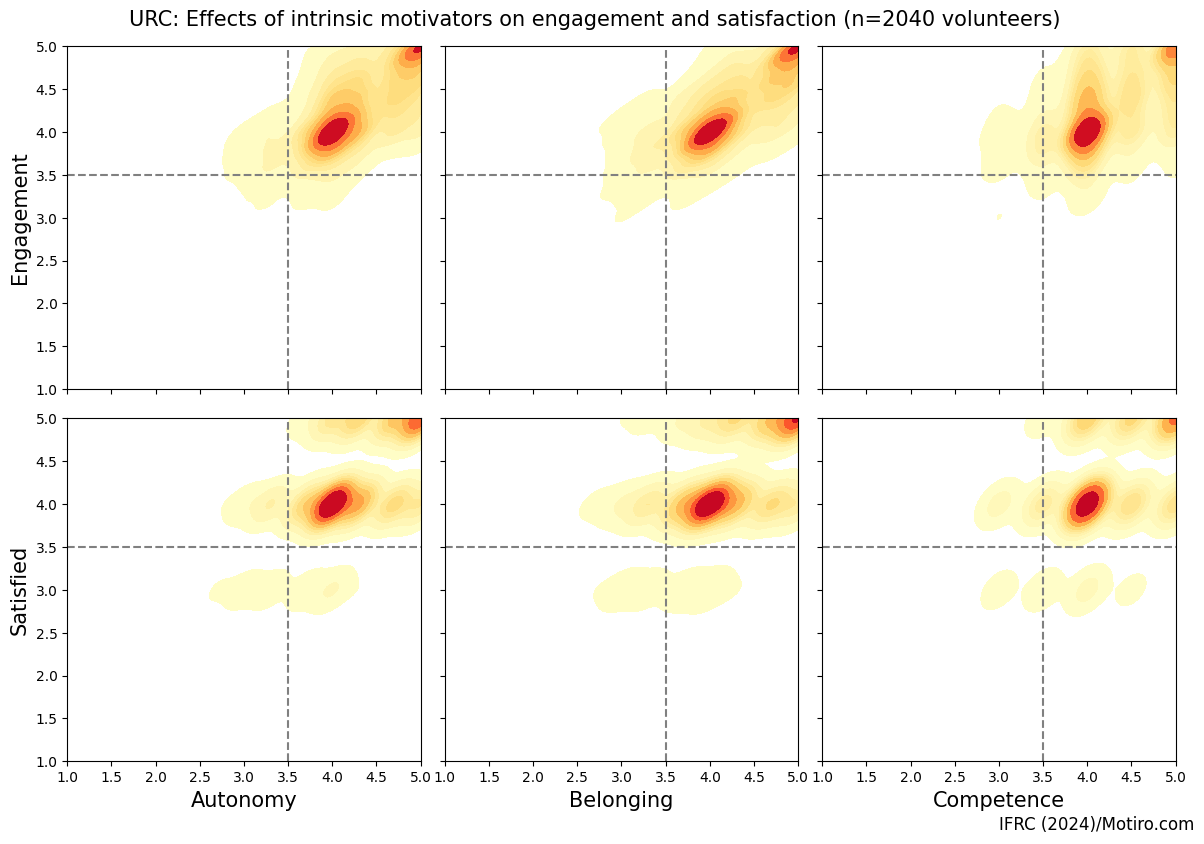

In [20]:
# SLIDE Combined heatmaps UKRAINE RED CROSS values, engagement, well-being and 3 needs
df = pd.read_csv("URC_ALL.csv", sep=",", encoding='utf-8')

# Count the total number of respondents (n)
n = df['Volunteer'].sum()

fig, axs = plt.subplots(2, 3, figsize=(12, 8), sharex=True, sharey=True)

# Plot density heatmaps using sns.kdeplot
ax = sns.kdeplot(y=df['Engagement'], x=df['Autonomy'], cmap='YlOrRd', fill=True, ax=axs[0, 0])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.set_xlim(1, 5)
ax.set_ylim(1, 5)
ax.yaxis.label.set_size(15)
ylabels = ['{:,.0f}']
ax = sns.kdeplot(y=df['Engagement'], x=df['Belonging'], cmap='YlOrRd', fill=True, ax=axs[0, 1])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.xaxis.label.set_size(15)
ax = sns.kdeplot(y=df['Engagement'], x=df['Competence'], cmap='YlOrRd', fill=True, ax=axs[0, 2])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.xaxis.label.set_size(15)
ax = sns.kdeplot(y=df['Satisfied'], x=df['Autonomy'], cmap='YlOrRd', fill=True, ax=axs[1, 0])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.yaxis.label.set_size(15)
ax.xaxis.label.set_size(15)
ylabels = ['{:,.0f}']
ax = sns.kdeplot(y=df['Satisfied'], x=df['Belonging'], cmap='YlOrRd', fill=True, ax=axs[1, 1])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.xaxis.label.set_size(15)
ax = sns.kdeplot(y=df['Satisfied'], x=df['Competence'], cmap='YlOrRd', fill=True, ax=axs[1, 2])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.xaxis.label.set_size(15)
# Adjust the spacing between subplots
plt.tight_layout()

plt.suptitle(f'URC: Effects of intrinsic motivators on engagement and satisfaction (n={n} volunteers)',
             y=1.02, x=0.5, size=15)

plt.text(3, 0.2, "IFRC (2024)/Motiro.com", fontdict={'size': 12})

plt.savefig('URC stay heatmaps Slide.png', bbox_inches='tight', pad_inches=0)

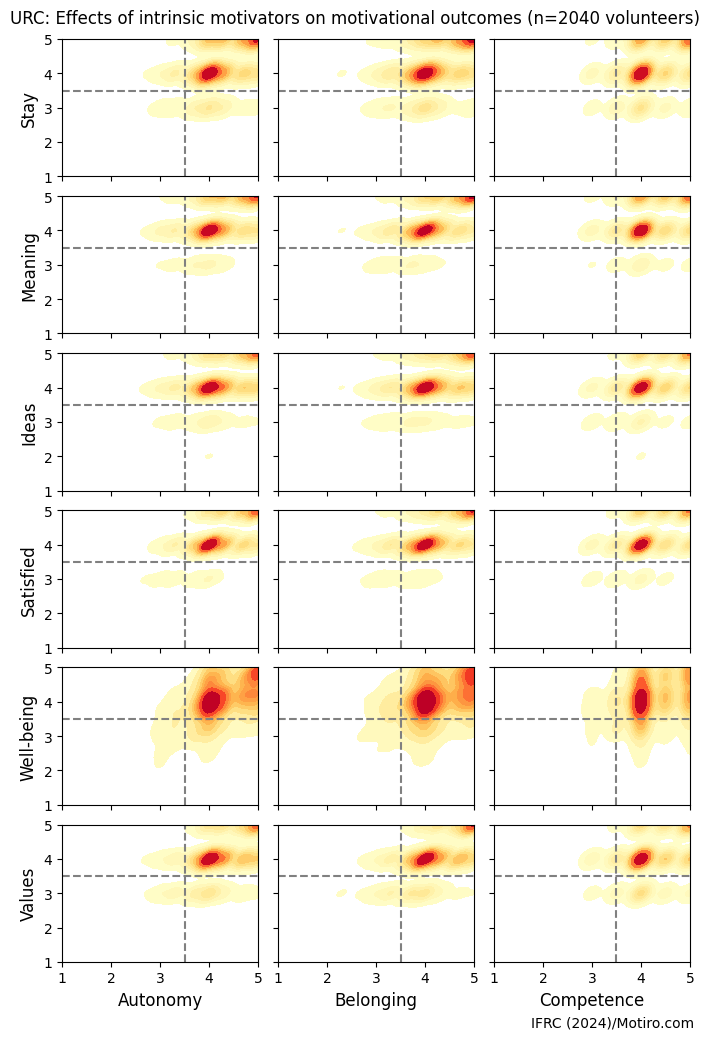

In [21]:

# Combined heatmaps UKRAINE RED CROSS 6 outcomes and 3 needs
df = pd.read_csv("URC_ALL.csv", sep=",", encoding='utf-8')

# Count the total number of respondents (n)
n = df['Volunteer'].sum()

fig, axs = plt.subplots(6, 3, figsize=(7, 10), sharex=True, sharey=True)

# Plot density heatmaps using sns.kdeplot
ax = sns.kdeplot(y=df['Stay'], x=df['Autonomy'], cmap='YlOrRd', fill=True, ax=axs[0, 0])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.set_xlim(1, 5)
ax.set_ylim(1, 5)
ax.yaxis.label.set_size(12)
ylabels = ['{:,.0f}']
ax = sns.kdeplot(y=df['Stay'], x=df['Belonging'], cmap='YlOrRd', fill=True, ax=axs[0, 1])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.xaxis.label.set_size(12)
ax = sns.kdeplot(y=df['Stay'], x=df['Competence'], cmap='YlOrRd', fill=True, ax=axs[0, 2])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.xaxis.label.set_size(12)
ax = sns.kdeplot(y=df['Meaning'], x=df['Autonomy'], cmap='YlOrRd', fill=True, ax=axs[1, 0])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.set_xlim(1, 5)
ax.set_ylim(1, 5)
ax.yaxis.label.set_size(12)
ylabels = ['{:,.0f}']
ax = sns.kdeplot(y=df['Meaning'], x=df['Belonging'], cmap='YlOrRd', fill=True, ax=axs[1, 1])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.xaxis.label.set_size(12)
ax = sns.kdeplot(y=df['Meaning'], x=df['Competence'], cmap='YlOrRd', fill=True, ax=axs[1, 2])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.xaxis.label.set_size(12)
ax = sns.kdeplot(y=df['Ideas'], x=df['Autonomy'], cmap='YlOrRd', fill=True, ax=axs[2, 0])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.set_xlim(1, 5)
ax.set_ylim(1, 5)
ax.yaxis.label.set_size(12)
ylabels = ['{:,.0f}']
ax = sns.kdeplot(y=df['Ideas'], x=df['Belonging'], cmap='YlOrRd', fill=True, ax=axs[2, 1])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.xaxis.label.set_size(12)
ax = sns.kdeplot(y=df['Ideas'], x=df['Competence'], cmap='YlOrRd', fill=True, ax=axs[2, 2])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.xaxis.label.set_size(12)
ax = sns.kdeplot(y=df['Satisfied'], x=df['Autonomy'], cmap='YlOrRd', fill=True, ax=axs[3, 0])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.set_xlim(1, 5)
ax.set_ylim(1, 5)
ax.yaxis.label.set_size(12)
ylabels = ['{:,.0f}']
ax = sns.kdeplot(y=df['Satisfied'], x=df['Belonging'], cmap='YlOrRd', fill=True, ax=axs[3, 1])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.xaxis.label.set_size(12)
ax = sns.kdeplot(y=df['Satisfied'], x=df['Competence'], cmap='YlOrRd', fill=True, ax=axs[3, 2])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.xaxis.label.set_size(12)
ax = sns.kdeplot(y=df['Well-being'], x=df['Autonomy'], cmap='YlOrRd', fill=True, ax=axs[4, 0])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.set_xlim(1, 5)
ax.set_ylim(1, 5)
ax.yaxis.label.set_size(12)
ylabels = ['{:,.0f}']
ax = sns.kdeplot(y=df['Well-being'], x=df['Belonging'], cmap='YlOrRd', fill=True, ax=axs[4, 1])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.xaxis.label.set_size(12)
ax = sns.kdeplot(y=df['Well-being'], x=df['Competence'], cmap='YlOrRd', fill=True, ax=axs[4, 2])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.xaxis.label.set_size(12)
ax = sns.kdeplot(y=df['Values'], x=df['Autonomy'], cmap='YlOrRd', fill=True, ax=axs[5, 0])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.yaxis.label.set_size(12)
ax.xaxis.label.set_size(12)
ylabels = ['{:,.0f}']
ax = sns.kdeplot(y=df['Values'], x=df['Belonging'], cmap='YlOrRd', fill=True, ax=axs[5, 1])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.xaxis.label.set_size(12)
ax = sns.kdeplot(y=df['Values'], x=df['Competence'], cmap='YlOrRd', fill=True, ax=axs[5, 2])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.xaxis.label.set_size(12)
# Adjust the spacing between subplots
plt.tight_layout()

plt.suptitle(f'URC: Effects of intrinsic motivators on motivational outcomes (n={n} volunteers)',
             y=1.015, x=0.5, size=12)

plt.text(1.75, -0.9, "IFRC (2024)/Motiro.com", fontdict={'size': 10})

plt.savefig('URC outcome-3needs heatmaps.png', bbox_inches='tight', pad_inches=0)

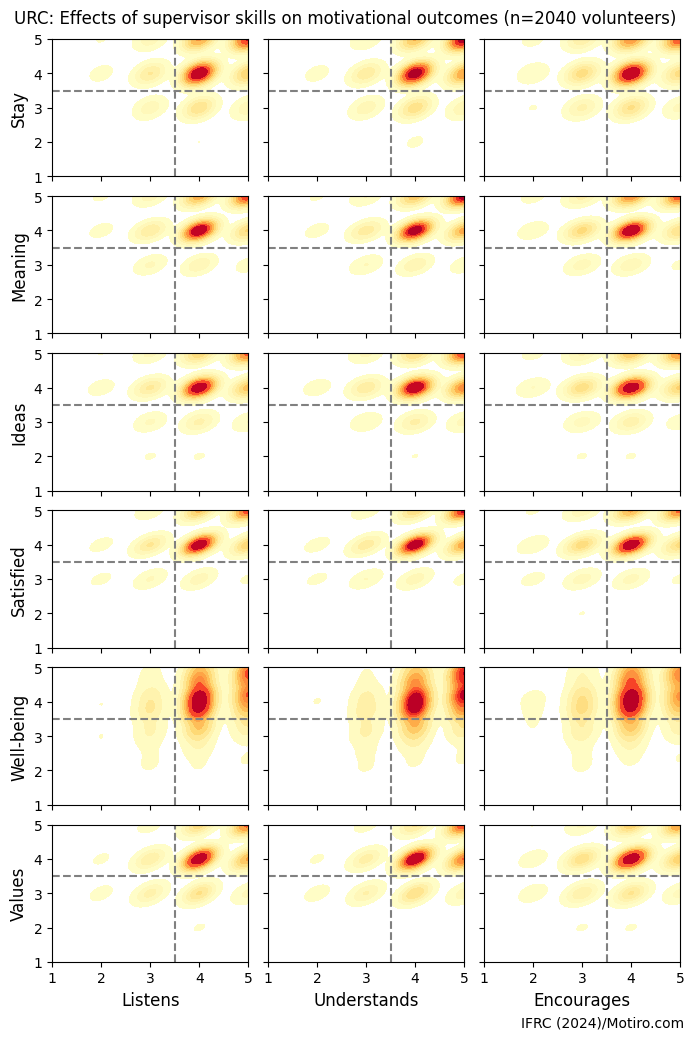

In [22]:

# Combined heatmaps UKRAINE RED CROSS 6 outcomes and 3 leadership skills
df = pd.read_csv("URC_ALL.csv", sep=",", encoding='utf-8')

# Count the total number of respondents (n)
n = df['Volunteer'].sum()

fig, axs = plt.subplots(6, 3, figsize=(7, 10), sharex=True, sharey=True)

# Plot density heatmaps using sns.kdeplot
ax = sns.kdeplot(y=df['Stay'], x=df['Listens'], cmap='YlOrRd', fill=True, ax=axs[0, 0])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.set_xlim(1, 5)
ax.set_ylim(1, 5)
ax.yaxis.label.set_size(12)
ylabels = ['{:,.0f}']
ax = sns.kdeplot(y=df['Stay'], x=df['Understands'], cmap='YlOrRd', fill=True, ax=axs[0, 1])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.xaxis.label.set_size(12)
ax = sns.kdeplot(y=df['Stay'], x=df['Encourages'], cmap='YlOrRd', fill=True, ax=axs[0, 2])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.xaxis.label.set_size(12)
ax = sns.kdeplot(y=df['Meaning'], x=df['Listens'], cmap='YlOrRd', fill=True, ax=axs[1, 0])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.set_xlim(1, 5)
ax.set_ylim(1, 5)
ax.yaxis.label.set_size(12)
ylabels = ['{:,.0f}']
ax = sns.kdeplot(y=df['Meaning'], x=df['Understands'], cmap='YlOrRd', fill=True, ax=axs[1, 1])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.xaxis.label.set_size(12)
ax = sns.kdeplot(y=df['Meaning'], x=df['Encourages'], cmap='YlOrRd', fill=True, ax=axs[1, 2])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.xaxis.label.set_size(12)
ax = sns.kdeplot(y=df['Ideas'], x=df['Listens'], cmap='YlOrRd', fill=True, ax=axs[2, 0])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.set_xlim(1, 5)
ax.set_ylim(1, 5)
ax.yaxis.label.set_size(12)
ylabels = ['{:,.0f}']
ax = sns.kdeplot(y=df['Ideas'], x=df['Understands'], cmap='YlOrRd', fill=True, ax=axs[2, 1])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.xaxis.label.set_size(12)
ax = sns.kdeplot(y=df['Ideas'], x=df['Encourages'], cmap='YlOrRd', fill=True, ax=axs[2, 2])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.xaxis.label.set_size(12)
ax = sns.kdeplot(y=df['Satisfied'], x=df['Listens'], cmap='YlOrRd', fill=True, ax=axs[3, 0])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.set_xlim(1, 5)
ax.set_ylim(1, 5)
ax.yaxis.label.set_size(12)
ylabels = ['{:,.0f}']
ax = sns.kdeplot(y=df['Satisfied'], x=df['Understands'], cmap='YlOrRd', fill=True, ax=axs[3, 1])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.xaxis.label.set_size(12)
ax = sns.kdeplot(y=df['Satisfied'], x=df['Encourages'], cmap='YlOrRd', fill=True, ax=axs[3, 2])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.xaxis.label.set_size(12)
ax = sns.kdeplot(y=df['Well-being'], x=df['Listens'], cmap='YlOrRd', fill=True, ax=axs[4, 0])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.set_xlim(1, 5)
ax.set_ylim(1, 5)
ax.yaxis.label.set_size(12)
ylabels = ['{:,.0f}']
ax = sns.kdeplot(y=df['Well-being'], x=df['Understands'], cmap='YlOrRd', fill=True, ax=axs[4, 1])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.xaxis.label.set_size(12)
ax = sns.kdeplot(y=df['Well-being'], x=df['Encourages'], cmap='YlOrRd', fill=True, ax=axs[4, 2])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.xaxis.label.set_size(12)
ax = sns.kdeplot(y=df['Values'], x=df['Listens'], cmap='YlOrRd', fill=True, ax=axs[5, 0])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.yaxis.label.set_size(12)
ax.xaxis.label.set_size(12)
ylabels = ['{:,.0f}']
ax = sns.kdeplot(y=df['Values'], x=df['Understands'], cmap='YlOrRd', fill=True, ax=axs[5, 1])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.xaxis.label.set_size(12)
ax = sns.kdeplot(y=df['Values'], x=df['Encourages'], cmap='YlOrRd', fill=True, ax=axs[5, 2])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.xaxis.label.set_size(12)
# Adjust the spacing between subplots
plt.tight_layout()

plt.suptitle(f'URC: Effects of supervisor skills on motivational outcomes (n={n} volunteers)',
             y=1.015, x=0.5, size=12)

plt.text(1.75, -0.9, "IFRC (2024)/Motiro.com", fontdict={'size': 10})

plt.savefig('URC outcome-leadership heatmaps.png', bbox_inches='tight', pad_inches=0)

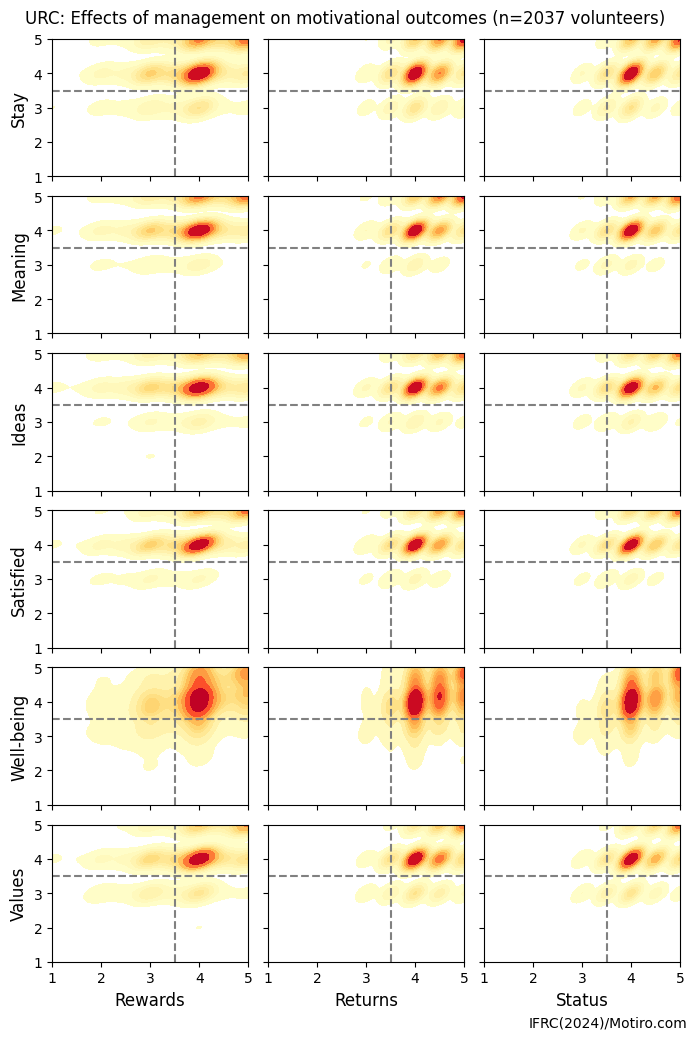

In [27]:
# Combined heatmaps UKRAINE RED CROSS 6 outcomes and 3 Management incentives
df = pd.read_csv("URC_ALL.csv", sep=",", encoding='utf-8')

# Count the total number of respondents (n)
n = df['Volunteer'].sum()

fig, axs = plt.subplots(6, 3, figsize=(7, 10), sharex=True, sharey=True)

# Plot density heatmaps using sns.kdeplot
ax = sns.kdeplot(y=df['Stay'], x=df['Rewards'], cmap='YlOrRd', fill=True, ax=axs[0, 0])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.set_xlim(1, 5)
ax.set_ylim(1, 5)
ax.yaxis.label.set_size(12)
ylabels = ['{:,.0f}']
ax = sns.kdeplot(y=df['Stay'], x=df['Returns'], cmap='YlOrRd', fill=True, ax=axs[0, 1])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.xaxis.label.set_size(12)
ax = sns.kdeplot(y=df['Stay'], x=df['Status'], cmap='YlOrRd', fill=True, ax=axs[0, 2])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.xaxis.label.set_size(12)
ax = sns.kdeplot(y=df['Meaning'], x=df['Rewards'], cmap='YlOrRd', fill=True, ax=axs[1, 0])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.set_xlim(1, 5)
ax.set_ylim(1, 5)
ax.yaxis.label.set_size(12)
ylabels = ['{:,.0f}']
ax = sns.kdeplot(y=df['Meaning'], x=df['Returns'], cmap='YlOrRd', fill=True, ax=axs[1, 1])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.xaxis.label.set_size(12)
ax = sns.kdeplot(y=df['Meaning'], x=df['Status'], cmap='YlOrRd', fill=True, ax=axs[1, 2])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.xaxis.label.set_size(12)
ax = sns.kdeplot(y=df['Ideas'], x=df['Rewards'], cmap='YlOrRd', fill=True, ax=axs[2, 0])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.set_xlim(1, 5)
ax.set_ylim(1, 5)
ax.yaxis.label.set_size(12)
ylabels = ['{:,.0f}']
ax = sns.kdeplot(y=df['Ideas'], x=df['Returns'], cmap='YlOrRd', fill=True, ax=axs[2, 1])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.xaxis.label.set_size(12)
ax = sns.kdeplot(y=df['Ideas'], x=df['Status'], cmap='YlOrRd', fill=True, ax=axs[2, 2])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.xaxis.label.set_size(12)
ax = sns.kdeplot(y=df['Satisfied'], x=df['Rewards'], cmap='YlOrRd', fill=True, ax=axs[3, 0])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.set_xlim(1, 5)
ax.set_ylim(1, 5)
ax.yaxis.label.set_size(12)
ylabels = ['{:,.0f}']
ax = sns.kdeplot(y=df['Satisfied'], x=df['Returns'], cmap='YlOrRd', fill=True, ax=axs[3, 1])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.xaxis.label.set_size(12)
ax = sns.kdeplot(y=df['Satisfied'], x=df['Status'], cmap='YlOrRd', fill=True, ax=axs[3, 2])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.xaxis.label.set_size(12)
ax = sns.kdeplot(y=df['Well-being'], x=df['Rewards'], cmap='YlOrRd', fill=True, ax=axs[4, 0])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.set_xlim(1, 5)
ax.set_ylim(1, 5)
ax.yaxis.label.set_size(12)
ylabels = ['{:,.0f}']
ax = sns.kdeplot(y=df['Well-being'], x=df['Returns'], cmap='YlOrRd', fill=True, ax=axs[4, 1])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.xaxis.label.set_size(12)
ax = sns.kdeplot(y=df['Well-being'], x=df['Status'], cmap='YlOrRd', fill=True, ax=axs[4, 2])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.xaxis.label.set_size(12)
ax = sns.kdeplot(y=df['Values'], x=df['Rewards'], cmap='YlOrRd', fill=True, ax=axs[5, 0])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.yaxis.label.set_size(12)
ax.xaxis.label.set_size(12)
ylabels = ['{:,.0f}']
ax = sns.kdeplot(y=df['Values'], x=df['Returns'], cmap='YlOrRd', fill=True, ax=axs[5, 1])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.xaxis.label.set_size(12)
ax = sns.kdeplot(y=df['Values'], x=df['Status'], cmap='YlOrRd', fill=True, ax=axs[5, 2])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.xaxis.label.set_size(12)
# Adjust the spacing between subplots
plt.tight_layout()

plt.suptitle(f'URC: Effects of management on motivational outcomes (n={n} volunteers)',
             y=1.015, x=0.5, size=12)

plt.text(1.9, -0.9, "IFRC(2024)/Motiro.com", fontdict={'size': 10})

plt.savefig('URC outcome-Management heatmaps.png', bbox_inches='tight', pad_inches=0)

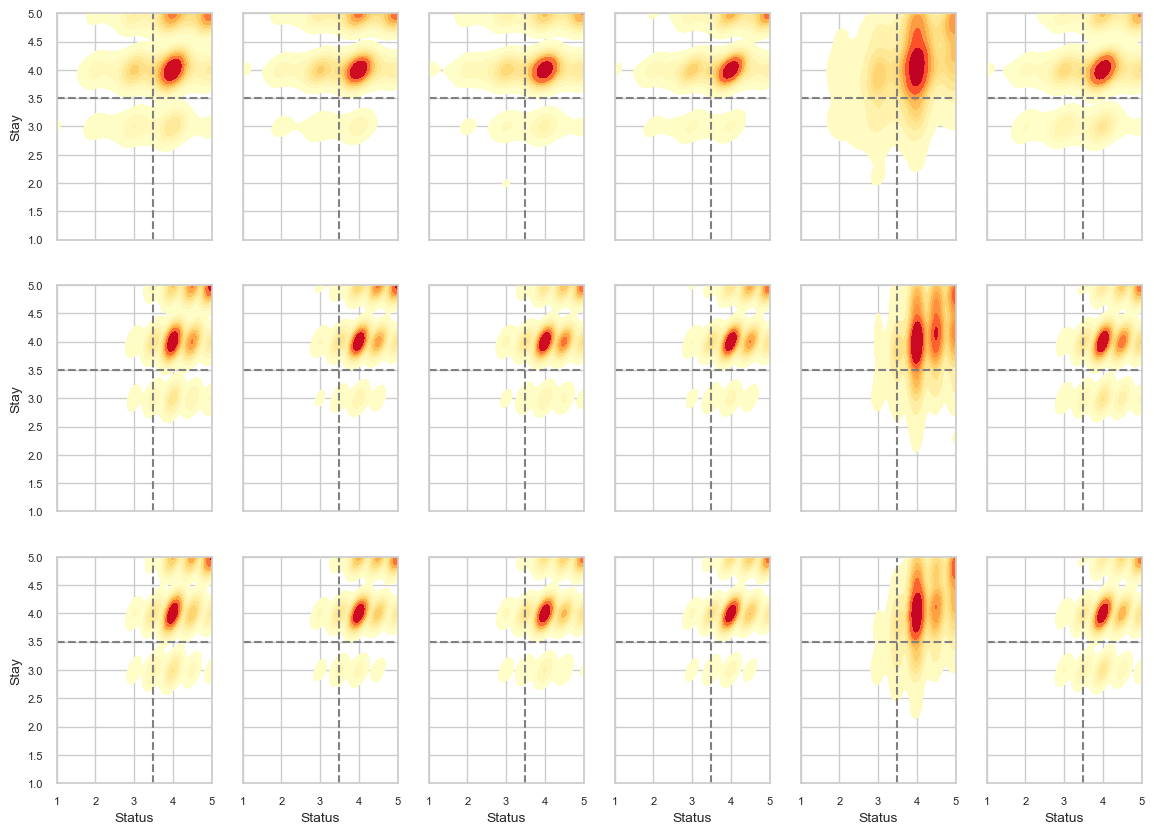

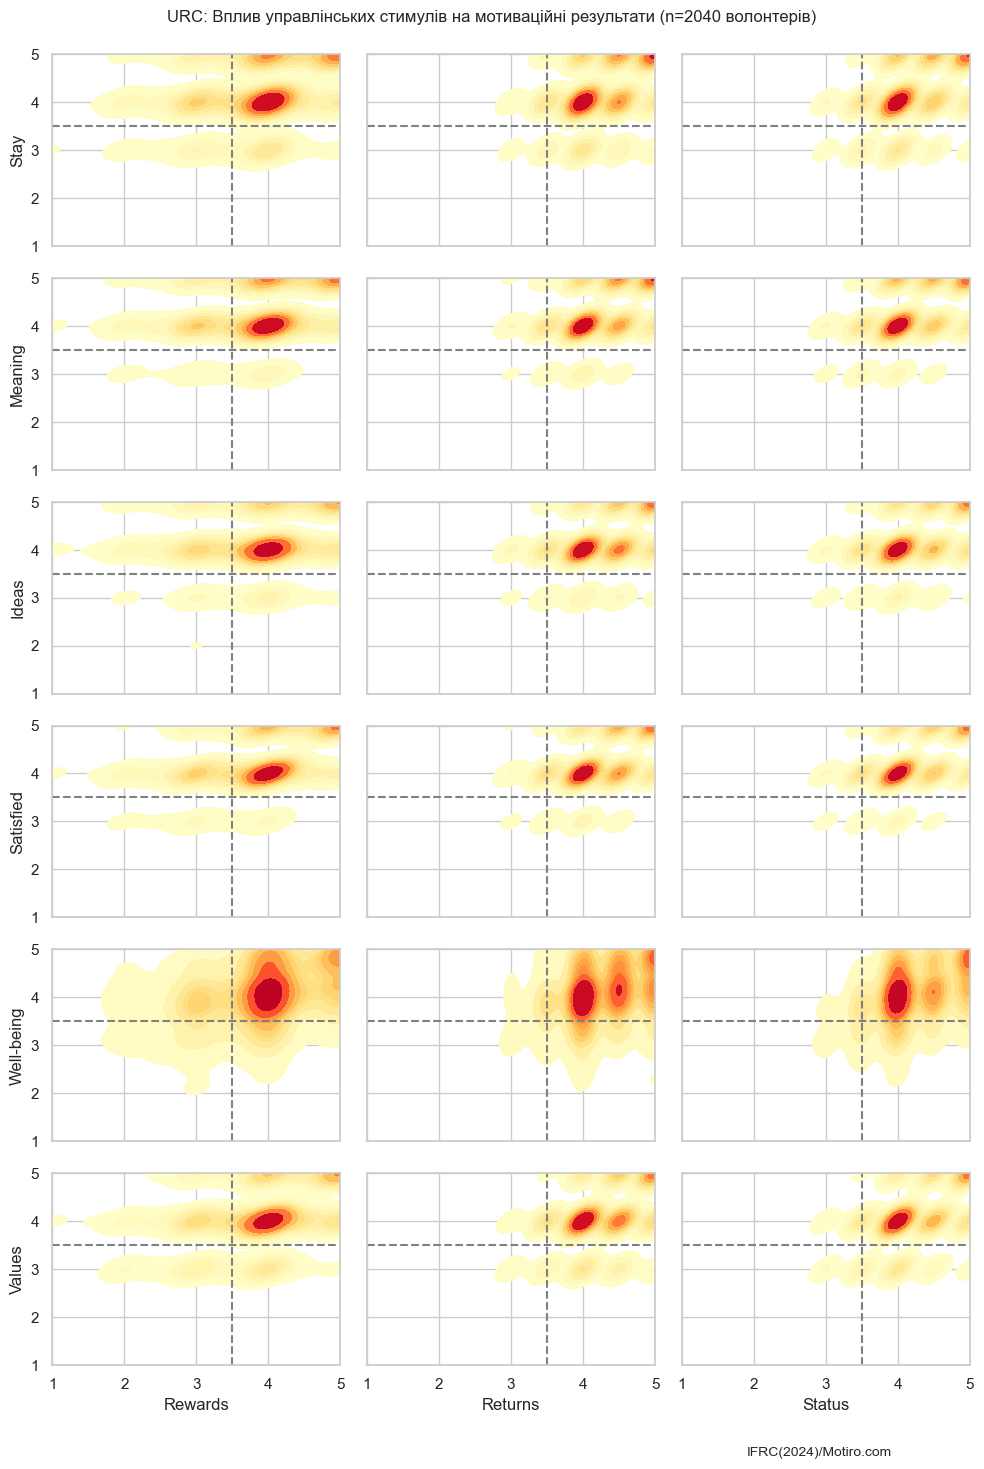

In [33]:
# Combined heatmaps UKRAINE RED CROSS 6 outcomes and 3 Management incentives
#Slide format
df = pd.read_csv("URC_ALL.csv", sep=",", encoding='utf-8')

# Count the total number of respondents (n)
n = df['Volunteer'].sum()

fig, axs = plt.subplots(3, 6, figsize=(14, 10), sharex=True, sharey=True)

# Plot density heatmaps using sns.kdeplot
# change to slide format with 3 rows and 6 columns
# top row: 'Rewards', middle row: 'Returns', bottom row:'Status'
# Define the outcomes and management incentives
outcomes = ['Stay', 'Meaning', 'Ideas', 'Satisfied', 'Well-being', 'Values']
incentives = ['Rewards', 'Returns', 'Status']

# Plot density heatmaps in slide format: 3 rows (incentives) x 6 columns (outcomes)
for row, incentive in enumerate(incentives):
    for col, outcome in enumerate(outcomes):
        ax = axs[row, col]
        sns.kdeplot(
            y=df[outcome], x=df[incentive],
            cmap='YlOrRd', fill=True, ax=ax
        )
        ax.axvline(x=3.5, color='gray', linestyle='--')
        ax.axhline(y=3.5, color='gray', linestyle='--')
        ax.set_xlim(1, 5)
        ax.set_ylim(1, 5)
        if row == 2:
            ax.set_xlabel(incentive, fontsize=10)
        else:
            ax.set_xlabel('')
        if col == 0:
            ax.set_ylabel(outcome, fontsize=10)
        else:
            ax.set_ylabel('')
        ax.tick_params(axis='both', labelsize=8)

#translate the same graph in Ukrainean
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Set the style for the plots
sns.set(style="whitegrid")
# Load the data
df = pd.read_csv("URC_ALL.csv", sep=",", encoding='utf-8')
# Count the total number of respondents (n)
n = df['Volunteer'].sum()
# Create a figure with subplots
fig, axs = plt.subplots(6, 3, figsize=(10, 14), sharex=True, sharey=True)
# Plot density heatmaps using sns.kdeplot
ax = sns.kdeplot(y=df['Stay'], x=df['Rewards'], cmap='YlOrRd', fill=True, ax=axs[0, 0])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.set_xlim(1, 5)
ax.set_ylim(1, 5)
ax.yaxis.label.set_size(12)
ylabels = ['{:,.0f}']
ax = sns.kdeplot(y=df['Stay'], x=df['Returns'], cmap='YlOrRd', fill=True, ax=axs[0, 1])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.xaxis.label.set_size(12)
ax = sns.kdeplot(y=df['Stay'], x=df['Status'], cmap='YlOrRd', fill=True, ax=axs[0, 2])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.xaxis.label.set_size(12)
ax = sns.kdeplot(y=df['Meaning'], x=df['Rewards'], cmap='YlOrRd', fill=True, ax=axs[1, 0])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.set_xlim(1, 5)
ax.set_ylim(1, 5)
ax.yaxis.label.set_size(12)
ylabels = ['{:,.0f}']
ax = sns.kdeplot(y=df['Meaning'], x=df['Returns'], cmap='YlOrRd', fill=True, ax=axs[1, 1])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.xaxis.label.set_size(12)
ax = sns.kdeplot(y=df['Meaning'], x=df['Status'], cmap='YlOrRd', fill=True, ax=axs[1, 2])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.xaxis.label.set_size(12)
ax = sns.kdeplot(y=df['Ideas'], x=df['Rewards'], cmap='YlOrRd', fill=True, ax=axs[2, 0])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.set_xlim(1, 5)
ax.set_ylim(1, 5)
ax.yaxis.label.set_size(12)
ylabels = ['{:,.0f}']
ax = sns.kdeplot(y=df['Ideas'], x=df['Returns'], cmap='YlOrRd', fill=True, ax=axs[2, 1])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.xaxis.label.set_size(12)
ax = sns.kdeplot(y=df['Ideas'], x=df['Status'], cmap='YlOrRd', fill=True, ax=axs[2, 2])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.xaxis.label.set_size(12)
ax = sns.kdeplot(y=df['Satisfied'], x=df['Rewards'], cmap='YlOrRd', fill=True, ax=axs[3, 0])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.set_xlim(1, 5)
ax.set_ylim(1, 5)
ax.yaxis.label.set_size(12)
ylabels = ['{:,.0f}']
ax = sns.kdeplot(y=df['Satisfied'], x=df['Returns'], cmap='YlOrRd', fill=True, ax=axs[3, 1])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.xaxis.label.set_size(12)
ax = sns.kdeplot(y=df['Satisfied'], x=df['Status'], cmap='YlOrRd', fill=True, ax=axs[3, 2]) 
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.xaxis.label.set_size(12)
ax = sns.kdeplot(y=df['Well-being'], x=df['Rewards'], cmap='YlOrRd', fill=True, ax=axs[4, 0])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.set_xlim(1, 5)
ax.set_ylim(1, 5)
ax.yaxis.label.set_size(12)
ylabels = ['{:,.0f}']
ax = sns.kdeplot(y=df['Well-being'], x=df['Returns'], cmap='YlOrRd', fill=True, ax=axs[4, 1])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.xaxis.label.set_size(12)
ax = sns.kdeplot(y=df['Well-being'], x=df['Status'], cmap='YlOrRd', fill=True, ax=axs[4, 2])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.xaxis.label.set_size(12)
ax = sns.kdeplot(y=df['Values'], x=df['Rewards'], cmap='YlOrRd', fill=True, ax=axs[5, 0])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.yaxis.label.set_size(12)
ax.xaxis.label.set_size(12)
ylabels = ['{:,.0f}']
ax = sns.kdeplot(y=df['Values'], x=df['Returns'], cmap='YlOrRd', fill=True, ax=axs[5, 1])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.xaxis.label.set_size(12)
ax = sns.kdeplot(y=df['Values'], x=df['Status'], cmap='YlOrRd', fill=True, ax=axs[5, 2])
ax.axvline(x=3.5, color='gray', linestyle='--')
ax.axhline(y=3.5, color='gray', linestyle='--')
ax.xaxis.label.set_size(12)
# Adjust the spacing between subplots
plt.tight_layout()
plt.suptitle(f'URC: Вплив управлінських стимулів на мотиваційні результати (n={n} волонтерів)',
             y=1.015, x=0.5, size=12)   
plt.text(1.9, -0.9, "IFRC(2024)/Motiro.com", fontdict={'size': 10})
plt.savefig('URC outcome-Management heatmaps_ukr.png', bbox_inches='tight', pad_inches=0)



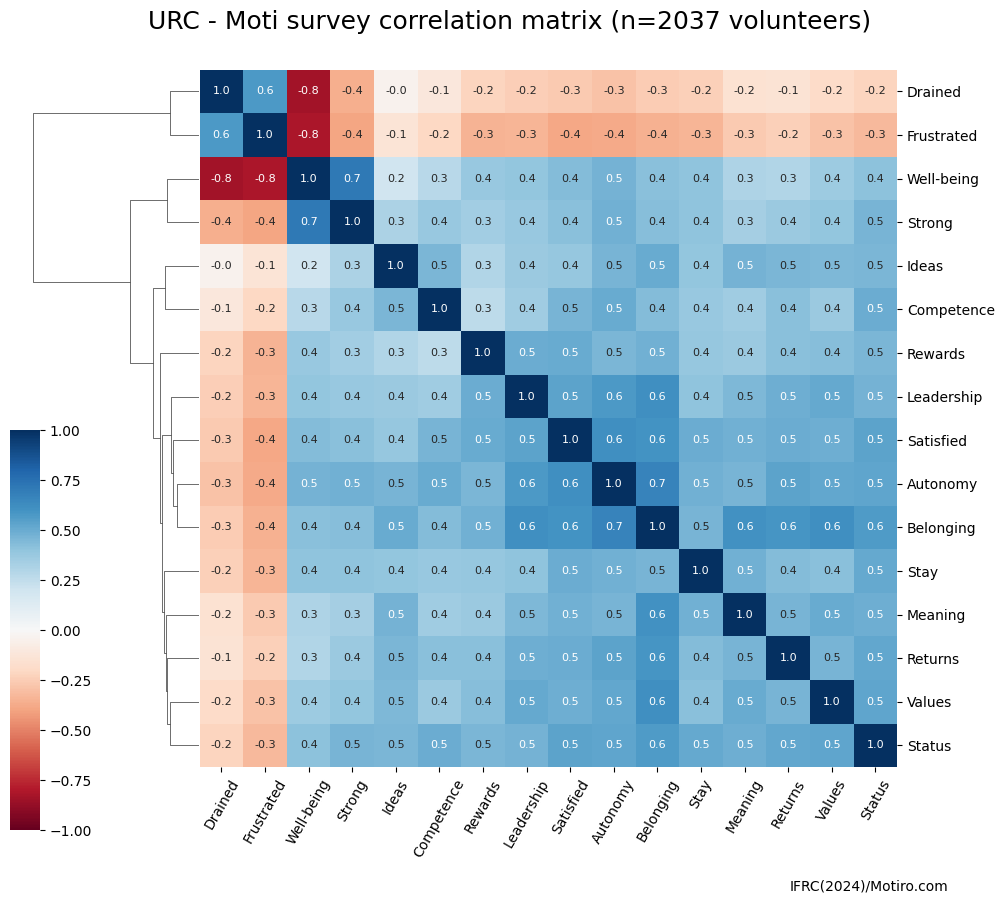

In [32]:
# Summary correlation matrix with grouped scores Ukraine Red Cross

df = pd.read_csv("URC_ALL.csv", sep=",", encoding='utf-8')

# Count the total number of respondents (n)
n = df['Volunteer'].sum()

columns = ['Well-being',
           'Ideas',
           'Meaning',
           'Values',
           'Autonomy',
           'Belonging',
           'Competence',
           'Leadership',
           'Returns',
           'Rewards',
           'Status',
           'Satisfied',
           'Stay',
           'Strong',
           'Drained',
           'Frustrated']

# Create the table with the desired columns
df = df[columns]

g = sns.clustermap(df.corr(), 
                   method = 'complete', 
                   #row_cluster=False,
                   cmap   = 'RdBu', vmin=-1, vmax=1,
                   cbar_pos=(0, .05, .03, .4),
                   annot  = True , fmt=".1f",
                   annot_kws = {'size': 8})
plt.setp(g.ax_heatmap.get_xticklabels(), rotation=60);

g.ax_col_dendrogram.remove()

plt.suptitle(f'URC - Moti survey correlation matrix (n={n} volunteers)',
             x=0.5, y=0.87, fontsize=18)
plt.text(26, -1.3, "IFRC(2024)/Motiro.com")

# Show the plot
plt.savefig('URC Summary Correlation Matrix.png', bbox_inches='tight', pad_inches=0)
plt.show()


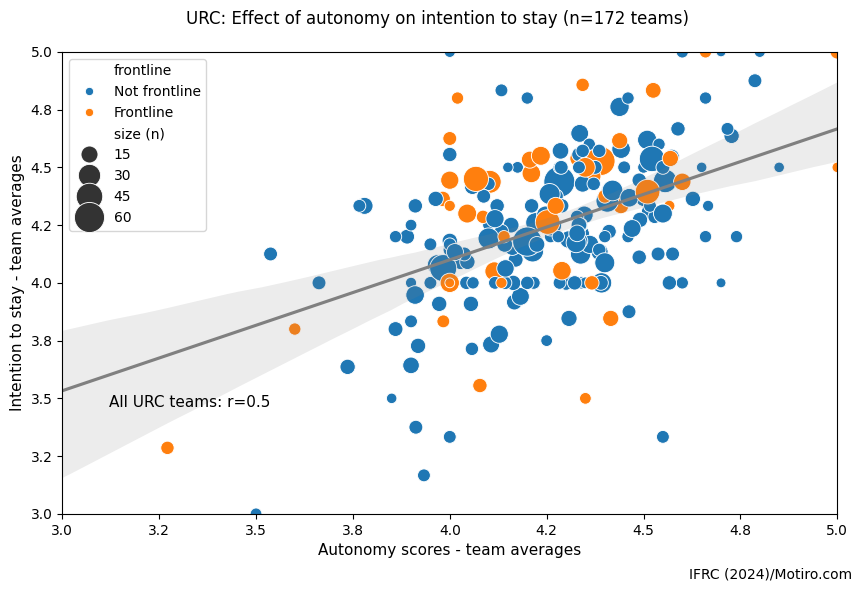

In [29]:
# UKRAINE RED CROSS: EFFECTS OF AUTONOMY ON ENGAGEMENT
df = pd.read_csv("URC_team.csv")
   
# Count the total number of respondents (n)
n = df['Volunteer'].sum()

# Create the bubble graph
plt.figure(figsize=(10, 6))
ax = sns.scatterplot(data=team_df, x='Autonomy', y='Stay', size='size (n)',
                hue='frontline', sizes=(50, 500))
plt.xlim((3,5))
plt.ylim((3,5))
ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.1f}'))
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.1f}'))

sns.regplot(data=team_df, x='Autonomy', y='Stay', color='gray', scatter=False)

# Calculate and display correlation coefficients
volunteer_corr = pearsonr(df['Autonomy'], df['Stay'])[0]

# Add correlation coefficient labels within the plot area
plt.text(0.06, 0.231, f'All URC teams: r={volunteer_corr:.1f}', color='black',
         size=11, transform=plt.gca().transAxes)

# Set the labels and title
plt.xlabel('Autonomy scores - team averages', fontsize=11)
plt.ylabel('Intention to stay - team averages', fontsize=11)

plt.suptitle(f'URC: Effect of autonomy on intention to stay (n={n:.0f} teams)',
             x=0.5, y=0.95, fontsize=12)
plt.annotate("IFRC (2024)/Motiro.com", xy=(0.8,-0.1), xycoords="axes fraction",
                    xytext=(5,-5), textcoords="offset points",
                    ha="left", va="top")
# Save and show the plot
plt.savefig('URC-Autonomy_vs_Stay.png', bbox_inches='tight', pad_inches=0)
plt.show()

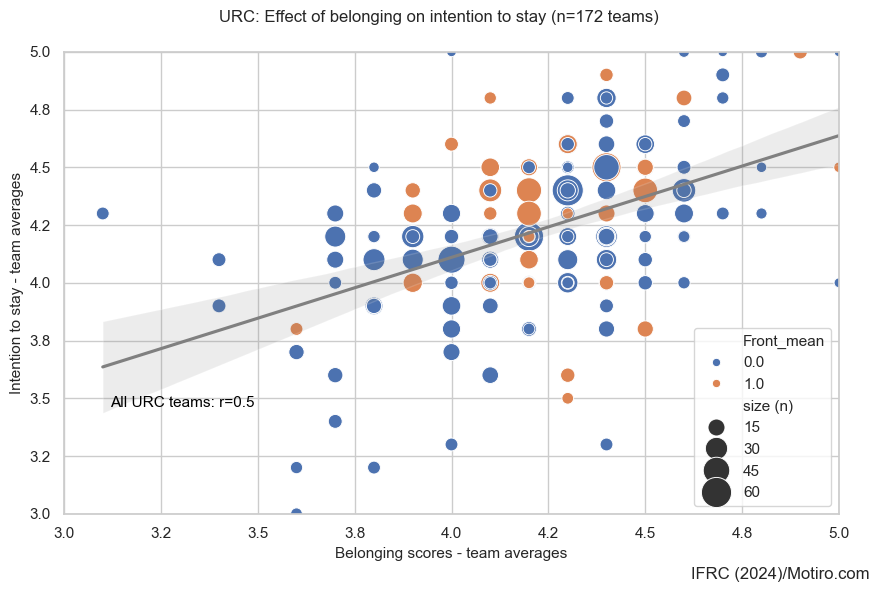

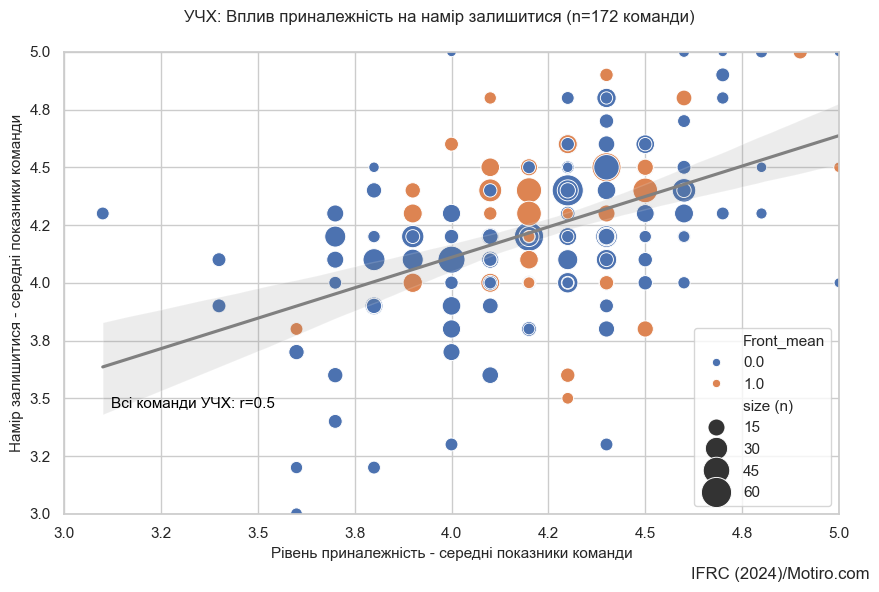

In [39]:
# UKRAINE RED CROSS: EFFECTS OF BELONGING ON INTENTION TO STAY
df = pd.read_csv("URC_team.csv")
   
# Count the total number of respondents (n)
n = df['Volunteer'].sum()

# Create the bubble graph
plt.figure(figsize=(10, 6))
ax = sns.scatterplot(data=df, x='Belonging_mean', y='Stay_mean', size='size (n)',
                hue='Front_mean', sizes=(50, 500))
plt.xlim((3,5))
plt.ylim((3,5))
ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.1f}'))
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.1f}'))

sns.regplot(data=df, x='Belonging_mean', y='Stay_mean', color='gray', scatter=False)

# Calculate and display correlation coefficients
volunteer_corr = pearsonr(df['Belonging_mean'], df['Stay_mean'])[0]

# Add correlation coefficient labels within the plot area
plt.text(0.06, 0.231, f'All URC teams: r={volunteer_corr:.1f}', color='black',
         size=11, transform=plt.gca().transAxes)

# Set the labels and title
plt.xlabel('Belonging scores - team averages', fontsize=11)
plt.ylabel('Intention to stay - team averages', fontsize=11)

plt.suptitle(f'URC: Effect of belonging on intention to stay (n={n:.0f} teams)',
             x=0.5, y=0.95, fontsize=12)
plt.annotate("IFRC (2024)/Motiro.com", xy=(0.8,-0.1), xycoords="axes fraction",
                    xytext=(5,-5), textcoords="offset points",
                    ha="left", va="top")
# Save and show the plot
plt.savefig('URC-Belonging_vs_Stay.png', bbox_inches='tight', pad_inches=0)
plt.show()

# Translate same plot in Ukrainian
# Create the bubble graph
plt.figure(figsize=(10, 6))
ax = sns.scatterplot(data=df, x='Belonging_mean', y='Stay_mean', size='size (n)',
                hue='Front_mean', sizes=(50, 500))
plt.xlim((3,5))
plt.ylim((3,5))
ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.1f}'))
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.1f}'))
sns.regplot(data=df, x='Belonging_mean', y='Stay_mean', color='gray', scatter=False)
# Calculate and display correlation coefficients
volunteer_corr = pearsonr(df['Belonging_mean'], df['Stay_mean'])[0]
# Add correlation coefficient labels within the plot area
plt.text(0.06, 0.231, f'Всі команди УЧХ: r={volunteer_corr:.1f}', color='black',
         size=11, transform=plt.gca().transAxes)
# Set the labels and title
plt.xlabel('Рівень приналежність - середні показники команди', fontsize=11)
plt.ylabel('Намір залишитися - середні показники команди', fontsize=11)
plt.suptitle(f'УЧХ: Вплив приналежність на намір залишитися (n={n:.0f} команди)',
             x=0.5, y=0.95, fontsize=12)
plt.annotate("IFRC (2024)/Motiro.com", xy=(0.8,-0.1), xycoords="axes fraction",
                    xytext=(5,-5), textcoords="offset points",
                    ha="left", va="top")
# Save and show the plot
plt.savefig('URC-Belonging_vs_Stay_ukr.png', bbox_inches='tight', pad_inches=0)
plt.show()

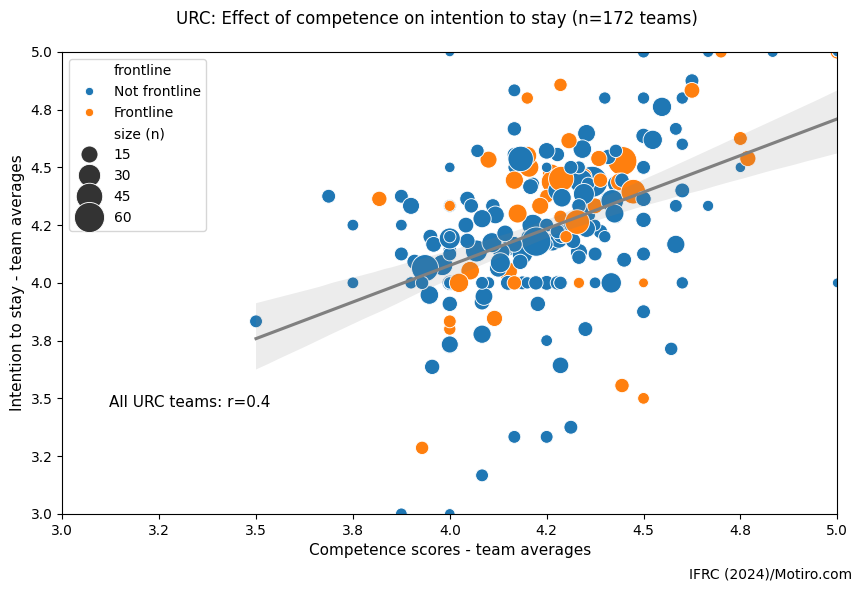

In [33]:
# UKRAINE RED CROSS: EFFECTS OF COMPETENCE ON INTENTION TO STAY
df = pd.read_csv("URC_team.csv")
   
# Count the total number of respondents (n)
n = df['Volunteer'].sum()

# Create the bubble graph
plt.figure(figsize=(10, 6))
ax = sns.scatterplot(data=team_df, x='Competence', y='Stay', size='size (n)',
                hue='frontline', sizes=(50, 500))
plt.xlim((3,5))
plt.ylim((3,5))
ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.1f}'))
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.1f}'))

sns.regplot(data=team_df, x='Competence', y='Stay', color='gray', scatter=False)

# Calculate and display correlation coefficients
volunteer_corr = pearsonr(df['Competence'], df['Stay'])[0]

# Add correlation coefficient labels within the plot area
plt.text(0.06, 0.231, f'All URC teams: r={volunteer_corr:.1f}', color='black',
         size=11, transform=plt.gca().transAxes)

# Set the labels and title
plt.xlabel('Competence scores - team averages', fontsize=11)
plt.ylabel('Intention to stay - team averages', fontsize=11)

plt.suptitle(f'URC: Effect of competence on intention to stay (n={n:.0f} teams)',
             x=0.5, y=0.95, fontsize=12)
plt.annotate("IFRC (2024)/Motiro.com", xy=(0.8,-0.1), xycoords="axes fraction",
                    xytext=(5,-5), textcoords="offset points",
                    ha="left", va="top")
# Save and show the plot
plt.savefig('URC-Competence_vs_Stay.png', bbox_inches='tight', pad_inches=0)
plt.show()

Note: you may need to restart the kernel to use updated packages.
Well-being Needs 0.233956587798284 0.48369059097555744
Well-being Autonomy 0.22437407510621676 0.4736814067558666
Well-being Belonging 0.17636510428713137 0.4199584554299763
Well-being Competence 0.08128361701001463 0.2851028183129985
Well-being Leadership 0.1616984526668993 0.40211746128077963
Well-being Understands 0.16051866727415642 0.4006478095212258
Well-being Encourages 0.09241659936746649 0.3040009858001557
Well-being Listens 0.13451675759838588 0.3667652622569181
Well-being Management 0.21024921349439896 0.4585294030859951
Well-being Returns 0.09340545762774366 0.3056230646200376
Well-being Rewards 0.1430974231307638 0.378282200388498
Well-being Status 0.17245880358050292 0.41528159552345073
Well-being Front 0.0007331126862102355 0.027076053741456406
Satisfied Needs 0.45960853851241723 0.677944347651352
Satisfied Autonomy 0.36989411889193946 0.6081892130677257
Satisfied Belonging 0.35537359781675626 0.5961321982

C:\Users\Gabriel\AppData\Local\Temp\ipykernel_6544\2209681193.py:38: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, new_row], ignore_index=True)


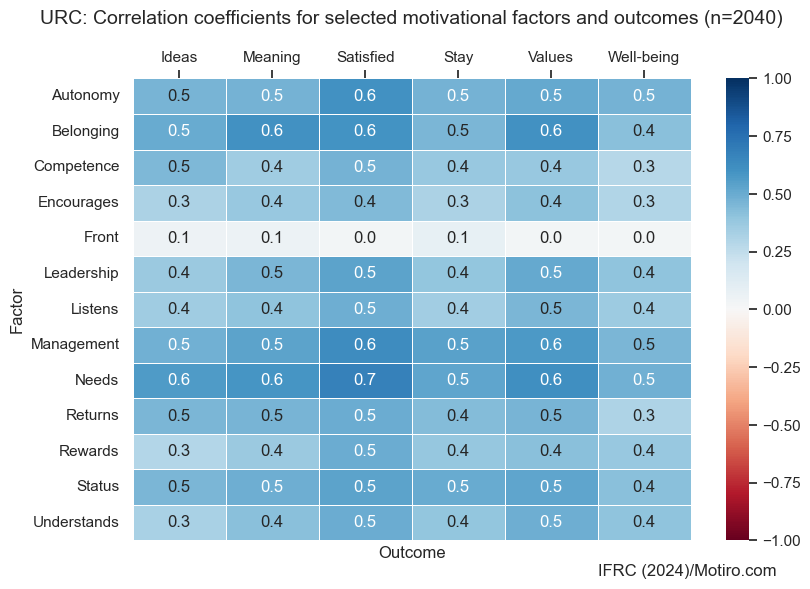

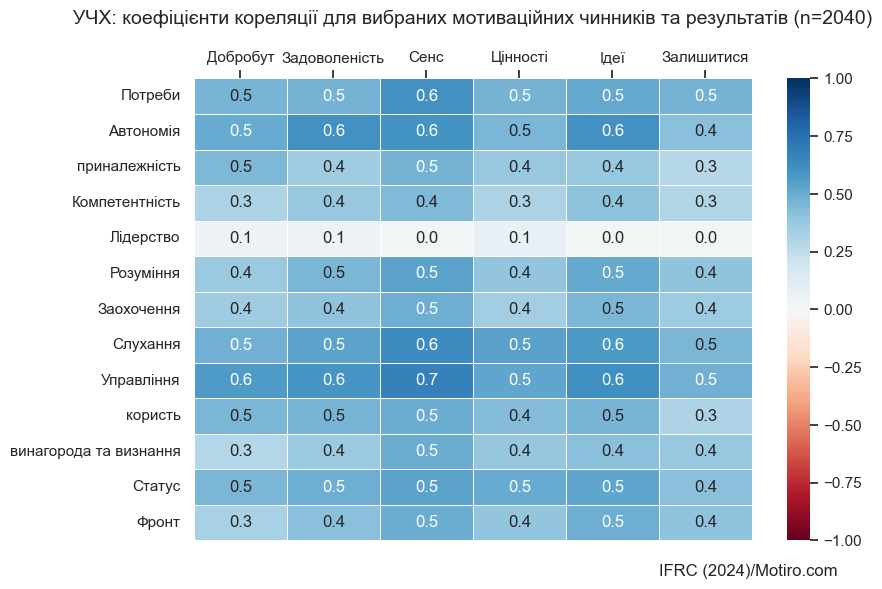

In [44]:
#  COUNTRY PROFILE: UKRAINE
#  CORRELATION COEFFICIENTS for staying, being staisfied, being frustrated  and being drained
#  and selected independent variables: Needs, Management, leadership
#  using Linear regression
#  use this to prepare odds ratio pivot table for VOL and STAFF and heatmap

# %pip install scikit-learn
%pip install openpyxl

from scipy.stats import fisher_exact
import itertools
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

df = pd.read_csv('URC_ALL.csv')

# Count the total number of respondents (n)
n = df['Volunteer'].sum()

columnY = ['Well-being', 'Satisfied', 'Meaning', 'Values', 'Ideas', 'Stay'] 
columnX = ['Needs', 'Autonomy', 'Belonging', 'Competence',
           'Leadership', 'Understands', 'Encourages', 'Listens',
           'Management', 'Returns', 'Rewards', 'Status', 'Front']

#create the dataframe that will store the outputs
results_df= pd.DataFrame(columns=['Outcome', 'Factor', 'CorrCoef'])

for Y in columnY:
    for X in columnX:
        X_data = df[X].values.reshape(-1, 1)
        Y_data = df[Y]
        model = LinearRegression().fit(X_data, Y_data)
        r_sq = model.score(X_data, Y_data)
        r = np.sqrt(r_sq)
        print(Y, X, r_sq, r)
        # Append results to the results_df DataFrame
        new_row = pd.DataFrame({'Outcome': [Y], 'Factor': [X], 'CorrCoef': [r]})
        results_df = pd.concat([results_df, new_row], ignore_index=True)


# Display the results DataFrame
#print(results_df)

# Save the results DataFrame to a CSV file
results_df.to_csv('CorrCoef_URC.csv', index=False)

# Pivot the results_df DataFrame
pivot_table = results_df.pivot(index='Factor', columns='Outcome', values='CorrCoef')

# Display the pivot_table
print(pivot_table)

# Save the Pivot table DataFrame to a CSV file
pivot_table.to_excel('CorrCoef_PivotTable_URC.xlsx', index=False)      

# heatmap to represent odds ratios for LEBANESE RED CROSS only (all are volunteers)
sns.set_theme()

df = pd.read_csv('CorrCoef_URC.csv')

# Pivot the results_df DataFrame
pivot_table = df.pivot(index='Factor', columns='Outcome', values='CorrCoef')

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(pivot_table, annot=True, fmt=".1f", vmin=-1, vmax=1, linewidths=.5, cmap='RdBu', ax=ax)
ax.xaxis.tick_top()
#ax.set_xlabel('Outcome', x=0.5)

plt.text(5, 14, "IFRC (2024)/Motiro.com", fontdict={'size': 12})
plt.title(f'URC: Correlation coefficients for selected motivational factors and outcomes (n={n})', 
          x=0.5, y=1.1, fontsize=14)

# Save the plot as an image file
plt.savefig('URC_r_heatmap.png', bbox_inches='tight', pad_inches=0)


# Prepare the same heatmap in Ukranian
df = pd.read_csv('CorrCoef_URC.csv')
# Pivot the results_df DataFrame
pivot_table = df.pivot(index='Factor', columns='Outcome', values='CorrCoef')
# translate columns to Ukrainian (match the number of columns in pivot_table)
pivot_table.columns = [
    'Добробут',
    'Задоволеність',
    'Сенс',
    'Цінності',
    'Ідеї',
    'Залишитися'
]
# tanslate index to Ukrainian
pivot_table.index = [
    'Потреби',
    'Автономія',
    'приналежність',
    'Компетентність',
    'Лідерство',
    'Розуміння',
    'Заохочення',
    'Слухання',
    'Управління',
    'користь',
    'винагорода та визнання',
    'Статус',
    'Фронт'
]

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(pivot_table, annot=True, fmt=".1f", vmin=-1, vmax=1, linewidths=.5, cmap='RdBu', ax=ax)
ax.xaxis.tick_top()
#ax.set_xlabel('Outcome', x=0.5)
plt.text(5, 14, "IFRC (2024)/Motiro.com", fontdict={'size': 12})
plt.title(f'УЧХ: коефіцієнти кореляції для вибраних мотиваційних чинників та результатів (n={n})', 
          x=0.5, y=1.1, fontsize=14)    
# Save the plot as an image file
plt.savefig('URC_r_heatmap_Ukr.png', bbox_inches='tight', pad_inches=0)


Well-being Needs 0.23304502541779237 0.48274737225363784
Well-being Autonomy 0.2246317116650408 0.4739532800446061
Well-being Belonging 0.1769891863041494 0.4207008275534402
Well-being Competence 0.0787870673755956 0.2806903407237157
Well-being Leadership 0.1582759552813734 0.39783910728003274
Well-being Understands 0.15777122970883473 0.3972042669821596
Well-being Encourages 0.09098792163772074 0.3016420422250863
Well-being Listens 0.1303147842047392 0.36099139076263187
Well-being Management 0.2063598375112251 0.4542684641390211
Well-being Returns 0.09242244439808434 0.3040105991541814
Well-being Rewards 0.14140071257772358 0.3760328610344096
Well-being Status 0.17028667973190703 0.41265806635991864
Satisfied Needs 0.4635648260623646 0.6808559510369022
Satisfied Autonomy 0.37444723111089584 0.6119209353428724
Satisfied Belonging 0.3604082971524716 0.6003401512080228
Satisfied Competence 0.21869124813070517 0.46764436073869764
Satisfied Leadership 0.2893883957739374 0.5379483207278719


C:\Users\gabriel.pictet\AppData\Local\Temp\ipykernel_15428\2565180112.py:33: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, new_row], ignore_index=True)


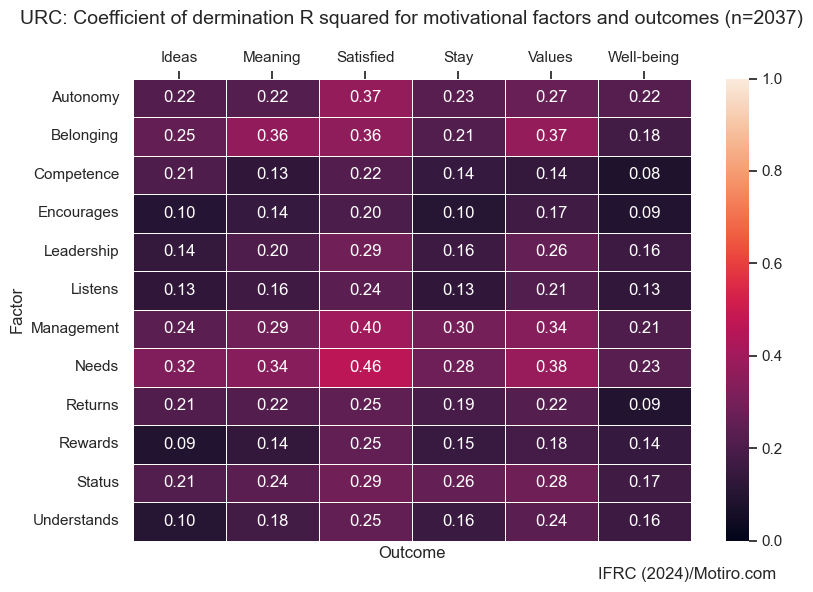

In [40]:
#  COUNTRY PROFILE: UKRAINE
#  CORRELATION DETERMINANTS R for staying, being satisfied, being frustrated  and being drained
#  and selected independent variables: Needs, Management, leadership
#  using Linear regression
#  use this to prepare odds ratio pivot table for VOL and STAFF and heatmap

from scipy.stats import fisher_exact
import itertools
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

df = pd.read_csv('URC_ALL.csv')

columnY = ['Well-being', 'Satisfied', 'Meaning', 'Values', 'Ideas', 'Stay'] 
columnX = ['Needs', 'Autonomy', 'Belonging', 'Competence',
           'Leadership', 'Understands', 'Encourages', 'Listens',
           'Management', 'Returns', 'Rewards', 'Status']

#create the dataframe that will store the outputs
results_df= pd.DataFrame(columns=['Outcome', 'Factor', 'CorrDet'])

for Y in columnY:
    for X in columnX:
        X_data = df[X].values.reshape(-1, 1)
        Y_data = df[Y]
        model = LinearRegression().fit(X_data, Y_data)
        r_sq = model.score(X_data, Y_data)
        r = np.sqrt(r_sq)
        print(Y, X, r_sq, r)
        
        # Append results to the results_df DataFrame
        new_row = pd.DataFrame({'Outcome': [Y], 'Factor': [X], 'CorrDet': [r_sq]})
        results_df = pd.concat([results_df, new_row], ignore_index=True)

# Save the results DataFrame to a CSV file
results_df.to_csv('CorrDet_Ukraine.csv', index=False)

# Pivot the results_df DataFrame
pivot_table = results_df.pivot(index='Factor', columns='Outcome', values='CorrDet')

# Display the pivot_table
print(pivot_table)

# Save the Pivot table DataFrame to a CSV file
pivot_table.to_excel('CorrDet_PivotTable_Ukraine.xlsx', index=False)      

# heatmap to represent correlation determinants for UKRAINE RED CROSS only (staff+volunteers)
sns.set_theme()

df = pd.read_csv('CorrDet_Ukraine.csv')

# Pivot the results_df DataFrame
pivot_table = df.pivot(index='Factor', columns='Outcome', values='CorrDet')

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(pivot_table, annot=True, fmt=".2f", vmin=0, vmax=1, linewidths=.5, ax=ax)
ax.xaxis.tick_top()
#ax.set_xlabel('Outcome', x=0.5)

plt.text(5, 13, "IFRC (2024)/Motiro.com", fontdict={'size': 12})
plt.title(f'URC: Coefficient of dermination R squared for motivational factors and outcomes (n={n})',
          x=0.5, y=1.1, fontsize=14)

# Save the plot as an image file
plt.savefig('URC_R-sq_heatmap.png', bbox_inches='tight', pad_inches=0)

In [41]:
# create dummy variables for motivational outcomes (Y) and independent variables (x)
df = pd.read_csv("URC_ALL.csv", sep=",", encoding='utf-8')

# first we select 2 types of outcome variable - on 1-5 and 1-7 scales
# we create dictionary to recode the values in each category of outcome variables

columns5 = ['Satisfied',
            'Stay',
            'Values',
            'Meaning',
            'Ideas',
            ]

columns7 = ['Strong',
           'Drained',
           'Frustrated']

# we create dictionary to recode the values in each category of outcome variables
# neutral (3) is considered positive, i.e. Y=1 if neutral)
mapping5 = {
    5: 1,
    4: 1,
    3: 1,
    2: 0,
    1: 0
}

# NB: this is the current coding for frequencies:
#    "Every day": 7,
#    "Very often": 6,
#    "Often": 5,
#    "Sometimes": 4,
#    "Rarely": 3,
#    "Almost never": 2,
#    "Never": 1
# We set the cut off point between 4 (sometimes) and 5 (often), i.e. Y=1 if "often"
mapping7 = {
    7: 1,
    6: 1,
    5: 1,
    4: 0,
    3: 0,
    2: 0,
    1: 0
}

df[columns5] = df[columns5].replace(mapping5)
df[columns7] = df[columns7].replace(mapping7)

df.head(20)

#Independent Variables to convert into dummy variables for Odds Ratio computations
# we create dictionary to recode the values in each category of outcome variables
# cutoff point: 3.5 and above considered positive.
# We keep the original continous variables in the data.

df['Well'] = df['Well-being']
df['3Needsmet'] = df['Needs']
df['Autonomous'] = df['Autonomy']
df['Belongs'] = df['Belonging']
df['Competent'] = df['Competence']
df['LeaderOK'] = df['Leadership']
df['Understood'] = df['Understands']
df['Encouraged'] = df['Encourages']
df['Heard'] = df['Listens']
df['ManagementOK'] = df['Management']
df['ReturnsOK'] = df['Returns']
df['RewardsOK'] = df['Rewards']
df['StatusOK'] = df['Status']
   
DummyColumns = [
    'Well',
    '3Needsmet',
    'Autonomous',
    'Belongs',
    'Competent',
    'LeaderOK',
    'Understood',
    'Encouraged',
    'Heard',
    'ManagementOK',
    'ReturnsOK',
    'RewardsOK',
    'StatusOK'
    ] 

# Calculate the rounded value row by row and assign it to a new dummy variable column
# By rounding we can have 3.5 and above as 1  and below 3.5 as 0
df[DummyColumns] = df[DummyColumns].round(0)
df[DummyColumns] = df[DummyColumns].astype(int)
df
mappingX = {
    5: 1,
    4: 1,
    3: 0,
    2: 0,
    1: 0
}

df[DummyColumns] = df[DummyColumns].replace(mappingX)

#for Var_x in df[DummyColumn]:
#    Var_x = float(Var_x)
#    if Var_x < 4 :
#        Var_x = 0
#    else: Var_x = 1
    
#Variables to keep for logistic regressions
columns = ['Strong', 'Drained', 'Frustrated',
           'Satisfied', 'Stay', 'Values', 'Meaning', 'Ideas',
           'region', 'Staff', 'Volunteer',
           'Well-being', 'Needs', 'Autonomy', 'Belonging', 'Competence',
           'Leadership', 'Understands', 'Encourages', 'Listens',
           'Management', 'Returns', 'Rewards', 'Status',
           'Well', '3Needsmet', 'Autonomous', 'Belongs', 'Competent',
           'LeaderOK', 'Understood', 'Encouraged', 'Heard',
           'ManagementOK', 'ReturnsOK', 'RewardsOK', 'StatusOK', 'Front'
          ]

LogReg_df=df[columns]


LogReg_df.to_csv('LogReg_df_URC.csv', index=False)
df.head(7)


df.shape

(2602, 59)

Stay 3Needsmet [[31.32819253]]
Stay Autonomous [[18.78848606]]
Stay Belongs [[8.01887889]]
Stay Competent [[14.11903664]]
Stay LeaderOK [[10.8375858]]
Stay Understood [[8.12429124]]
Stay Encouraged [[5.78596026]]
Stay Heard [[10.63080478]]
Stay ManagementOK [[26.24866398]]
Stay ReturnsOK [[20.13714325]]
Stay RewardsOK [[12.30649846]]
Stay StatusOK [[24.25115828]]
Stay Volunteer [[8.46649645]]
Stay Front [[2.3087032]]
Satisfied 3Needsmet [[57.56282372]]
Satisfied Autonomous [[79.21926263]]
Satisfied Belongs [[17.21186662]]
Satisfied Competent [[12.57711374]]
Satisfied LeaderOK [[25.65584964]]
Satisfied Understood [[14.63642923]]
Satisfied Encouraged [[21.17721794]]
Satisfied Heard [[13.80144179]]
Satisfied ManagementOK [[31.3260993]]
Satisfied ReturnsOK [[18.73842936]]
Satisfied RewardsOK [[32.50082136]]
Satisfied StatusOK [[33.61133977]]
Satisfied Volunteer [[9.3453723]]
Satisfied Front [[0.29693764]]
Meaning 3Needsmet [[57.38635498]]
Meaning Autonomous [[26.36259297]]
Meaning Belongs 

C:\Users\gabriel.pictet\AppData\Local\Temp\ipykernel_15428\2369604442.py:36: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, new_row], ignore_index=True)


Meaning Understood [[33.88608412]]
Meaning Encouraged [[25.16920511]]
Meaning Heard [[13.33826944]]
Meaning ManagementOK [[27.08579828]]
Meaning ReturnsOK [[27.12586454]]
Meaning RewardsOK [[33.30044274]]
Meaning StatusOK [[11.70145003]]
Meaning Volunteer [[11.17197541]]
Meaning Front [[1.19510385]]
Values 3Needsmet [[47.63946451]]
Values Autonomous [[24.57689059]]
Values Belongs [[16.23682035]]
Values Competent [[17.89350773]]
Values LeaderOK [[26.54454338]]
Values Understood [[27.65404961]]
Values Encouraged [[9.97828869]]
Values Heard [[18.71248256]]
Values ManagementOK [[28.88983364]]
Values ReturnsOK [[25.37092244]]
Values RewardsOK [[11.70042136]]
Values StatusOK [[14.45345734]]
Values Volunteer [[8.62310094]]
Values Front [[1.2107523]]
Ideas 3Needsmet [[15.65490663]]
Ideas Autonomous [[7.21954634]]
Ideas Belongs [[11.8454755]]
Ideas Competent [[8.98867899]]
Ideas LeaderOK [[8.29541622]]
Ideas Understood [[8.45969197]]
Ideas Encouraged [[7.22151298]]
Ideas Heard [[9.68877167]]
Id

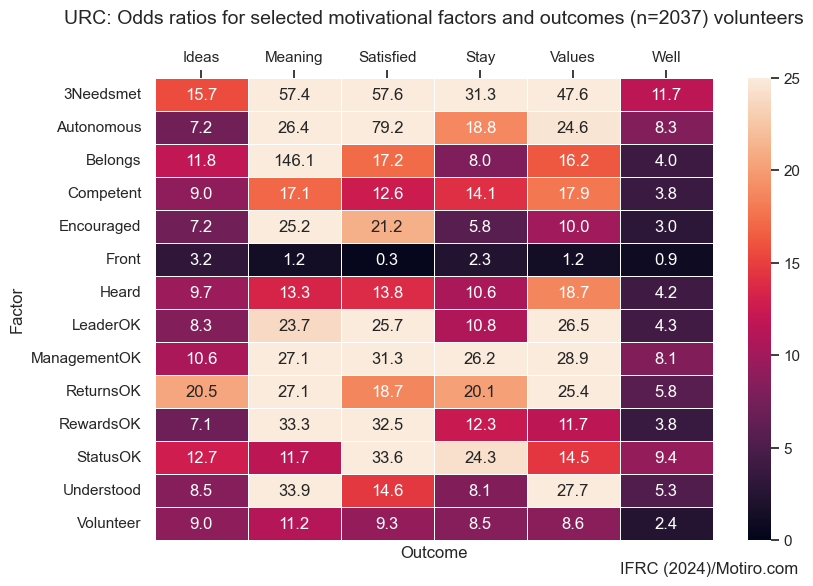

In [50]:
###### COUNTRY PROFILE: UKRAINE - VOLUNTEERS ONLY
#  Odds ratios for staying, being satisfied, being frustrated  and being drained
#  and selected independent variables: Needs, Management, leadership
#  using logistic regression
#  use this to prepare odds ratio pivot table for VOL and STAFF and heatmap

from scipy.stats import fisher_exact
import itertools
from sklearn.linear_model import LogisticRegression

df = pd.read_csv('LogReg_df_URC.csv')

# Filter the dataframe for volunteers only
df = df[df['Volunteer'] == 1]
n=df['Volunteer'].sum()

columnY = ['Stay', 'Satisfied', 'Meaning', 'Values', 'Ideas', 'Well'] 
columnX = ['3Needsmet', 'Autonomous', 'Belongs', 'Competent',
           'LeaderOK', 'Understood', 'Encouraged', 'Heard',
           'ManagementOK', 'ReturnsOK', 'RewardsOK', 'StatusOK', 'Volunteer', 'Front']

#create the dataframe that will store the outputs
results_df= pd.DataFrame(columns=['Outcome', 'Factor', 'Odds ratio'])

for Y in columnY:
    for X in columnX:
        clf = LogisticRegression(penalty=None)
        # Reshape the data to be 2D
        X_data = df[X].values.reshape(-1, 1)
        Y_data = df[Y]
        clf.fit(X_data, Y_data)
        odds_ratio = np.exp(clf.coef_)
        print(Y, X, odds_ratio)
        # Append results to the results_df DataFrame using pd.concat
        new_row = pd.DataFrame({'Outcome': [Y], 'Factor': [X], 'Odds ratio': [odds_ratio[0][0]]})
        results_df = pd.concat([results_df, new_row], ignore_index=True)

# Display the results DataFrame
#print(results_df)

# Save the results DataFrame to a CSV file
results_df.to_csv('odds_ratios_Ukraine_VOL.csv', index=False)

# Pivot the results_df DataFrame
pivot_table = results_df.pivot(index='Factor', columns='Outcome', values='Odds ratio')

# Display the pivot_table
#print(pivot_table)

# Save the Pivot table DataFrame to a CSV file
pivot_table.to_excel('odds_ratios_PivotTable_Ukraine_VOL.xlsx', index=False)      

# heatmap to represent odds ratios for UKRAINE RED CROSS only (all are volunteers)
sns.set_theme()

df = pd.read_csv('odds_ratios_Ukraine_VOL.csv')

# Pivot the results_df DataFrame
pivot_table = df.pivot(index='Factor', columns='Outcome', values='Odds ratio')

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(pivot_table, annot=True, fmt=".1f", vmin=0, vmax=25, linewidths=.5, ax=ax)
ax.xaxis.tick_top()
#ax.set_xlabel('Outcome', x=0.5)

plt.text(5, 15, "IFRC (2024)/Motiro.com", fontdict={'size': 12})
plt.title(f'URC: Odds ratios for selected motivational factors and outcomes (n={n}) volunteers',
          x=0.5, y=1.1, fontsize=14)

# Save the plot as an image file
plt.savefig('URC_OR_heatmap_VOL.png', bbox_inches='tight', pad_inches=0)

Stay 3Needsmet [[12.02646571]]
Stay Autonomous [[7.02998612]]
Stay Belongs [[6.91383409]]
Stay Competent [[3.83996569]]
Stay LeaderOK [[10.5849114]]
Stay Understood [[12.94869583]]
Stay Encouraged [[7.45998505]]
Stay Heard [[4.63872822]]
Stay ManagementOK [[29.06912839]]
Stay ReturnsOK [[13.54301244]]
Stay RewardsOK [[439.69961619]]
Stay StatusOK [[41.09825356]]
Stay Volunteer [[1.]]
Stay Front [[2.33538487]]
Satisfied 3Needsmet [[1859.87860322]]
Satisfied Autonomous [[2700.21188552]]
Satisfied Belongs [[34.44518855]]
Satisfied Competent [[9.63892387]]
Satisfied LeaderOK [[1116.51383539]]
Satisfied Understood [[1368.78506389]]
Satisfied Encouraged [[7.45998505]]
Satisfied Heard [[9.42042065]]
Satisfied ManagementOK [[71.49254117]]
Satisfied ReturnsOK [[28.45090388]]
Satisfied RewardsOK [[14.43563977]]
Satisfied StatusOK [[41.09825356]]
Satisfied Volunteer [[1.]]
Satisfied Front [[0.47951184]]
Meaning 3Needsmet [[7.981115]]
Meaning Autonomous [[10.43789532]]
Meaning Belongs [[10.2646107

C:\Users\gabriel.pictet\AppData\Local\Temp\ipykernel_15428\2080654820.py:36: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, new_row], ignore_index=True)


Ideas Volunteer [[1.]]
Ideas Front [[0.92947825]]
Well 3Needsmet [[15.97180871]]
Well Autonomous [[11.97754263]]
Well Belongs [[7.34952002]]
Well Competent [[5.89044538]]
Well LeaderOK [[5.49674578]]
Well Understood [[6.68101603]]
Well Encouraged [[3.12757896]]
Well Heard [[3.81033279]]
Well ManagementOK [[6.20845707]]
Well ReturnsOK [[3.93897653]]
Well RewardsOK [[3.74811069]]
Well StatusOK [[10.15452131]]
Well Volunteer [[1.]]
Well Front [[2.12180821]]


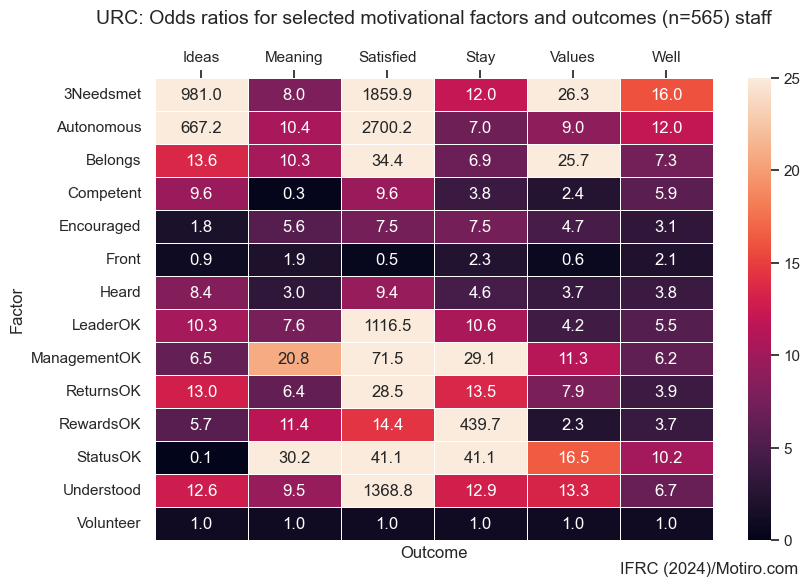

In [51]:
###### COUNTRY PROFILE: UKRAINE - STAFF ONLY
#  Odds ratios for staying, being satisfied, being frustrated  and being drained
#  and selected independent variables: Needs, Management, leadership
#  using logistic regression
#  use this to prepare odds ratio pivot table for VOL and STAFF and heatmap

from scipy.stats import fisher_exact
import itertools
from sklearn.linear_model import LogisticRegression

df = pd.read_csv('LogReg_df_URC.csv')

# Filter the dataframe for staff only
df = df[df['Staff'] == 1]
n=df['Staff'].sum()

columnY = ['Stay', 'Satisfied', 'Meaning', 'Values', 'Ideas', 'Well'] 
columnX = ['3Needsmet', 'Autonomous', 'Belongs', 'Competent',
           'LeaderOK', 'Understood', 'Encouraged', 'Heard',
           'ManagementOK', 'ReturnsOK', 'RewardsOK', 'StatusOK', 'Volunteer', 'Front']

#create the dataframe that will store the outputs
results_df= pd.DataFrame(columns=['Outcome', 'Factor', 'Odds ratio'])

for Y in columnY:
    for X in columnX:
        clf = LogisticRegression(penalty=None)
        # Reshape the data to be 2D
        X_data = df[X].values.reshape(-1, 1)
        Y_data = df[Y]
        clf.fit(X_data, Y_data)
        odds_ratio = np.exp(clf.coef_)
        print(Y, X, odds_ratio)
        # Append results to the results_df DataFrame using pd.concat
        new_row = pd.DataFrame({'Outcome': [Y], 'Factor': [X], 'Odds ratio': [odds_ratio[0][0]]})
        results_df = pd.concat([results_df, new_row], ignore_index=True)

# Display the results DataFrame
#print(results_df)

# Save the results DataFrame to a CSV file
results_df.to_csv('odds_ratios_Ukraine_STAFF.csv', index=False)

# Pivot the results_df DataFrame
pivot_table = results_df.pivot(index='Factor', columns='Outcome', values='Odds ratio')

# Display the pivot_table
#print(pivot_table)

# Save the Pivot table DataFrame to a CSV file
pivot_table.to_excel('odds_ratios_PivotTable_Ukraine_STAFF.xlsx', index=False)      

# heatmap to represent odds ratios for UKRAINE RED CROSS only (all are volunteers)
sns.set_theme()

df = pd.read_csv('odds_ratios_Ukraine_STAFF.csv')

# Pivot the results_df DataFrame
pivot_table = df.pivot(index='Factor', columns='Outcome', values='Odds ratio')

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(pivot_table, annot=True, fmt=".1f", vmin=0, vmax=25, linewidths=.5, ax=ax)
ax.xaxis.tick_top()
#ax.set_xlabel('Outcome', x=0.5)

plt.text(5, 15, "IFRC (2024)/Motiro.com", fontdict={'size': 12})
plt.title(f'URC: Odds ratios for selected motivational factors and outcomes (n={n}) staff',
          x=0.5, y=1.1, fontsize=14)

# Save the plot as an image file
plt.savefig('URC_OR_heatmap_STAFF.png', bbox_inches='tight', pad_inches=0)

Stay 3Needsmet [[31.32819253]]
Stay Autonomous [[18.78848606]]
Stay Belongs [[8.01887889]]
Stay Competent [[14.11903664]]
Stay LeaderOK [[10.8375858]]
Stay Understood [[8.12429124]]
Stay Encouraged [[5.78596026]]
Stay Heard [[10.63080478]]
Stay ManagementOK [[26.24866398]]
Stay ReturnsOK [[20.13714325]]
Stay RewardsOK [[12.30649846]]
Stay StatusOK [[24.25115828]]
Stay Front [[2.3087032]]
Drained 3Needsmet [[0.1560908]]
Drained Autonomous [[0.23219389]]
Drained Belongs [[0.36978161]]
Drained Competent [[0.45536646]]
Drained LeaderOK [[0.33452474]]
Drained Understood [[0.29735164]]
Drained Encouraged [[0.47329655]]
Drained Heard [[0.39928547]]
Drained ManagementOK [[0.27939775]]
Drained ReturnsOK [[0.40590055]]
Drained RewardsOK [[0.41094036]]
Drained StatusOK [[0.29890164]]
Drained Front [[0.84130339]]
Frustrated 3Needsmet [[0.05158798]]
Frustrated Autonomous [[0.08365113]]


C:\Users\gabriel.pictet\AppData\Local\Temp\ipykernel_15428\3276127111.py:36: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, new_row], ignore_index=True)


Frustrated Belongs [[0.15056681]]
Frustrated Competent [[0.18758162]]
Frustrated LeaderOK [[0.15689746]]
Frustrated Understood [[0.11192075]]
Frustrated Encouraged [[0.26540476]]
Frustrated Heard [[0.15838668]]
Frustrated ManagementOK [[0.0978613]]
Frustrated ReturnsOK [[0.09952902]]
Frustrated RewardsOK [[0.16441151]]
Frustrated StatusOK [[0.08220862]]
Frustrated Front [[0.88594157]]
Strong 3Needsmet [[14.88932615]]
Strong Autonomous [[10.57342817]]
Strong Belongs [[4.7333785]]
Strong Competent [[6.98698351]]
Strong LeaderOK [[5.71802379]]
Strong Understood [[5.21997865]]
Strong Encouraged [[3.789898]]
Strong Heard [[5.55926146]]
Strong ManagementOK [[8.56385923]]
Strong ReturnsOK [[7.34049897]]
Strong RewardsOK [[3.63936365]]
Strong StatusOK [[16.725518]]
Strong Front [[0.74229927]]
Satisfied 3Needsmet [[57.56282372]]
Satisfied Autonomous [[79.21926263]]
Satisfied Belongs [[17.21186662]]
Satisfied Competent [[12.57711374]]
Satisfied LeaderOK [[25.65584964]]
Satisfied Understood [[14.

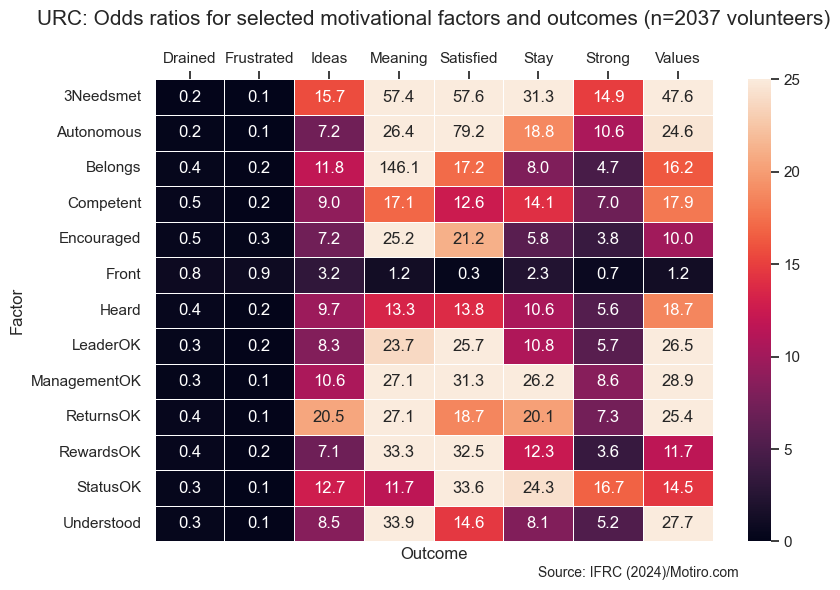

In [52]:
#  COUNTRY PROFILE: UKRAINE
#  Odds ratios for staying, being staisfied, being frustrated  and being drained
#  and selected independent variables: Needs, Management, leadership
#  using logistic regression
#  use this to prepare odds ratio pivot table for VOL and STAFF and heatmap

from scipy.stats import fisher_exact
import itertools
from sklearn.linear_model import LogisticRegression

df = pd.read_csv('LogReg_df_URC.csv')

# Filter the dataframe for volunteers only
df = df[df['Volunteer'] == 1]
n=df['Volunteer'].sum()

columnY = ['Stay', 'Drained', 'Frustrated', 'Strong', 'Satisfied', 'Meaning', 'Values', 'Ideas'] 
columnX = ['3Needsmet', 'Autonomous', 'Belongs', 'Competent',
           'LeaderOK', 'Understood', 'Encouraged', 'Heard',
           'ManagementOK', 'ReturnsOK', 'RewardsOK', 'StatusOK', 'Front']

#create the dataframe that will store the outputs
results_df= pd.DataFrame(columns=['Outcome', 'Factor', 'Odds ratio'])

for Y in columnY:
    for X in columnX:
        clf = LogisticRegression(penalty=None)
        # Reshape the data to be 2D
        X_data = df[X].values.reshape(-1, 1)
        Y_data = df[Y]
        clf.fit(X_data, Y_data)
        odds_ratio = np.exp(clf.coef_)
        print(Y, X, odds_ratio)
        # Append results to the results_df DataFrame using pd.concat
        new_row = pd.DataFrame({'Outcome': [Y], 'Factor': [X], 'Odds ratio': [odds_ratio[0][0]]})
        results_df = pd.concat([results_df, new_row], ignore_index=True)

# Display the results DataFrame
#print(results_df)

# Save the results DataFrame to a CSV file
results_df.to_csv('odds_ratios_Ukraine_VOL.csv', index=False)

# Pivot the results_df DataFrame
pivot_table = results_df.pivot(index='Factor', columns='Outcome', values='Odds ratio')

# Display the pivot_table
#print(pivot_table)

# Save the Pivot table DataFrame to a CSV file
pivot_table.to_excel('odds_ratios_PivotTable_Ukraine_VOL.xlsx', index=False)      

# heatmap to represent odds ratios for UKRAINE RED CROSS only (volunteers only)
sns.set_theme()

df = pd.read_csv('odds_ratios_Ukraine_VOL.csv')

# Pivot the results_df DataFrame
pivot_table = df.pivot(index='Factor', columns='Outcome', values='Odds ratio')

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(pivot_table, annot=True, fmt=".1f", vmin=0, vmax=25, linewidths=.5, ax=ax)
ax.xaxis.tick_top()
#ax.set_xlabel('Outcome', x=0.5)

plt.text(5.5, 14, "Source: IFRC (2024)/Motiro.com", fontdict={'size': 10})
plt.title(f'URC: Odds ratios for selected motivational factors and outcomes (n={n} volunteers)', x=0.5, y=1.1, fontsize=15)

# Save the plot as an image file
plt.savefig('Ukraine_OR_heatmap2_VOL.png')

Status {'size': 75, 'color': 'bisque'}
Rewards {'size': 75, 'color': 'bisque'}
Returns {'size': 75, 'color': 'bisque'}
Listens {'size': 75, 'color': 'lightblue'}
Understands {'size': 75, 'color': 'lightblue'}
Encourages {'size': 75, 'color': 'lightblue'}
Autonomy {'size': 75, 'color': 'thistle'}
Belonging {'size': 75, 'color': 'thistle'}
Competence {'size': 75, 'color': 'thistle'}
Frustrated {'size': 75, 'color': 'pink'}
Drained {'size': 75, 'color': 'pink'}
Strong {'size': 75, 'color': 'pink'}
Meaning {'size': 75, 'color': 'palegreen'}
Ideas {'size': 75, 'color': 'palegreen'}
Values {'size': 75, 'color': 'palegreen'}
Stay {'size': 75, 'color': 'palegreen'}
Satisfied {'size': 75, 'color': 'palegreen'}


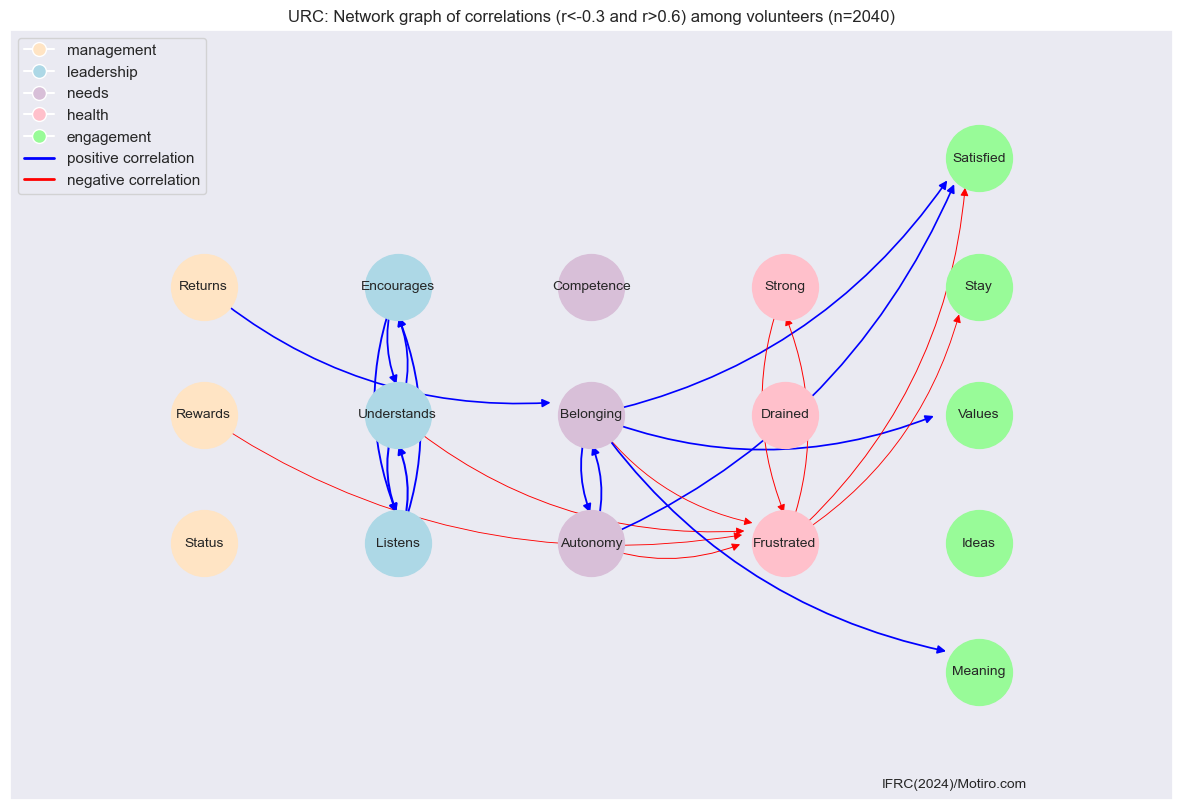

In [59]:
## VOLUNTEERS Ukraine Red Cross Correlations network graph key variables on horizontal axis
import networkx as nx
import matplotlib
#matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
import math

#set correlation coefficient thresholds for graph
negcorr = -0.3
poscorr = 0.6

df = pd.read_csv("URC_ALL.csv", sep=",", encoding='utf-8')

# Filter the dataframe for 'Position' = 'Volunteer'
df = df[df['Position'] == 'Volunteer']
#df = df[df['frontline'] == 'Frontline']
#df = df[df['region'] == 'Donetsk Region']

# Count the total number of teams in filtered dataframe (n)
n = df['Volunteer'].sum()

# Compute correlation matrix with numeric_only set to True to avoid warning
corr_matrix = df.corr(numeric_only=True)


# Define variable sets
management_vars = ['Status', 'Rewards', 'Returns']
leadership_vars = ['Listens', 'Understands', 'Encourages']
needs_vars = ['Autonomy', 'Belonging', 'Competence']
health_vars = ['Frustrated', 'Drained', 'Strong']
engagement_vars = ['Meaning', 'Ideas', 'Values', 'Stay', 'Satisfied']

all_vars = management_vars + leadership_vars + needs_vars + health_vars + engagement_vars

# Create the graph
G = nx.DiGraph()

# Define variable colors
colors = {
    'management_vars': 'bisque',
    'leadership_vars': 'lightblue',
    'needs_vars': 'thistle',
    'health_vars': 'pink',
    'engagement_vars': 'palegreen'
}

# Modify the node addition part to include the color attribute
for var in all_vars:
    node_size = sum(corr_matrix[var])  # Sum of correlation coefficients
    if var in management_vars:
        node_color = colors['management_vars']
    elif var in leadership_vars:
        node_color = colors['leadership_vars']
    elif var in needs_vars:
        node_color = colors['needs_vars']
    elif var in health_vars:
        node_color = colors['health_vars']
    else:
        node_color = colors['engagement_vars']
    G.add_node(var, size=node_size, color=node_color)
    

# adjust arrows so that they touch circle periphery and are not hidden by the nodes' colored circle

def adjust_line_to_circle(x1, y1, x2, y2, r):
    """
    Adjusts the line segment (x1, y1) to (x2, y2) to stop at the circumference of a circle of radius r centered at (x2, y2).
    """
    angle = math.atan2(y2 - y1, x2 - x1)
    x2_new = x2 - r * math.cos(angle)
    y2_new = y2 - r * math.sin(angle)
    return x1, y1, x2_new, y2_new

# Add edges with color and weight attributes
for var1 in all_vars:
    for var2 in all_vars:
        correlation = corr_matrix[var1][var2]
        if var1 != var2 and not np.isnan(correlation) and (correlation > poscorr or correlation < negcorr):
            weight = abs(correlation)
            color = 'blue' if correlation > 0 else 'red'
            
            # Define the direction based on variable sets
            if var1 in management_vars and (var2 in needs_vars or var2 in health_vars or var2 in engagement_vars):
                G.add_edge(var1, var2, weight=weight, color=color)
            elif var1 in leadership_vars and (var2 in needs_vars or var2 in health_vars or var2 in engagement_vars):
                G.add_edge(var1, var2, weight=weight, color=color)
            elif var1 in needs_vars and (var2 in health_vars or var2 in engagement_vars):
                G.add_edge(var1, var2, weight=weight, color=color)
            elif var1 in management_vars and (var2 in health_vars or var2 in engagement_vars):
                G.add_edge(var1, var2, weight=weight, color=color)
            elif var1 in leadership_vars and (var2 in health_vars or var2 in engagement_vars):
                G.add_edge(var1, var2, weight=weight, color=color)
            elif var1 in health_vars and var2 in engagement_vars:
                G.add_edge(var1, var2, weight=weight, color=color)
            elif set([var1, var2]).issubset(set(management_vars)) or \
                 set([var1, var2]).issubset(set(leadership_vars)) or \
                 set([var1, var2]).issubset(set(needs_vars)) or \
                 set([var1, var2]).issubset(set(health_vars)) or \
                 set([var1, var2]).issubset(set(engagement_vars)):
                # Only add bidirectional arrows if they're in the same set
                G.add_edge(var1, var2, weight=weight, color=color)
                G.add_edge(var2, var1, weight=weight, color=color)

# Create positions for nodes
positions = {}
spacing_h = 1
spacing_v = 1

# Compute maximum group length for vertical centering
max_len = max(map(len, [management_vars, leadership_vars, needs_vars, health_vars, engagement_vars]))

for i, group in enumerate([management_vars, leadership_vars, needs_vars, health_vars, engagement_vars]):
    # Compute the starting y-coordinate for this group
    start_y = (max_len - len(group)) * spacing_v / 2
    
    for j, var in enumerate(group):
        positions[var] = (i * spacing_h, start_y + j * spacing_v)

for node, attributes in G.nodes(data=True):
    if np.isnan(attributes['size']):
        G.nodes[node]['size'] = 75  # Set default size

for node, data in G.nodes(data=True):
    print(node, data)

# Dummy lines for the legend
from matplotlib.lines import Line2D
legend_elements = []

# Adding legend for nodes
for label, color in colors.items():
    legend_elements.append(Line2D([0], [0], marker='o', color='w', label=label.replace('_vars', ''), markersize=10, markerfacecolor=color))

# Adding legend for edges
legend_elements.append(Line2D([0], [0], color='blue', lw=2, label='positive correlation'))
legend_elements.append(Line2D([0], [0], color='red', lw=2, label='negative correlation'))

# Plotting
fig, ax = plt.subplots(figsize=(15, 10))

# Modify the Draw nodes part to use the color from the node attributes
for node, (x, y) in positions.items():
    node_color = G.nodes[node]['color']
    ax.scatter(x, y, s=G.nodes[node]['size'] * 30, c=node_color, zorder=2)
    ax.text(x, y, node, ha='center', va='center', fontsize=10, zorder=3)

# Draw edges with a slight curve using connectionstyle
for u, v, data in G.edges(data=True):
    x1, y1 = positions[u]
    x2, y2 = positions[v]
    
    # Adjust end of arrow to connect to the node circle's periphery
    node_radius = math.sqrt(G.nodes[v]['size'] * 0.002 / math.pi)
    x1, y1, x2, y2 = adjust_line_to_circle(x1, y1, x2, y2, node_radius)

    arrowprops = dict(arrowstyle='-|>', linewidth=data['weight'] * 2, color=data['color'], 
                      connectionstyle="arc3,rad=0.2")  # Adding a curve
    plt.annotate("", xy=(x2, y2), xytext=(x1, y1), arrowprops=arrowprops, zorder=1)

# Add the legend to the plot
ax.legend(handles=legend_elements, loc='upper left')

plt.title(f'URC: Network graph of correlations (r<{negcorr} and r>{poscorr}) among volunteers (n={n})')
plt.text(3.5, -0.9, "IFRC(2024)/Motiro.com", size=10)
plt.xlim(-1, len([management_vars, leadership_vars, needs_vars, health_vars, engagement_vars]))
plt.ylim(-1, max_len)  # Using max_len for the ylim

# Remove x and y ticks
ax.set_xticks([])
ax.set_yticks([])
plt.savefig('URC VOL SDTCorrNetworkGraph.png', bbox_inches='tight', pad_inches=0.1)
plt.show()


Статус {'size': 75, 'color': 'bisque'}
Винагорода та визнання {'size': 75, 'color': 'bisque'}
Користь {'size': 75, 'color': 'bisque'}
Слухання {'size': 75, 'color': 'lightblue'}
Розуміння {'size': 75, 'color': 'lightblue'}
Заохочення {'size': 75, 'color': 'lightblue'}
Автономія {'size': 75, 'color': 'thistle'}
Приналежність {'size': 75, 'color': 'thistle'}
Компетентність {'size': 75, 'color': 'thistle'}
Розчарування {'size': 75, 'color': 'pink'}
Виснаження {'size': 75, 'color': 'pink'}
Енергійність {'size': 75, 'color': 'pink'}
Сенс {'size': 75, 'color': 'palegreen'}
Ідеї {'size': 75, 'color': 'palegreen'}
Цінності {'size': 75, 'color': 'palegreen'}
Наполегливість {'size': 75, 'color': 'palegreen'}
Самореалізація {'size': 75, 'color': 'palegreen'}


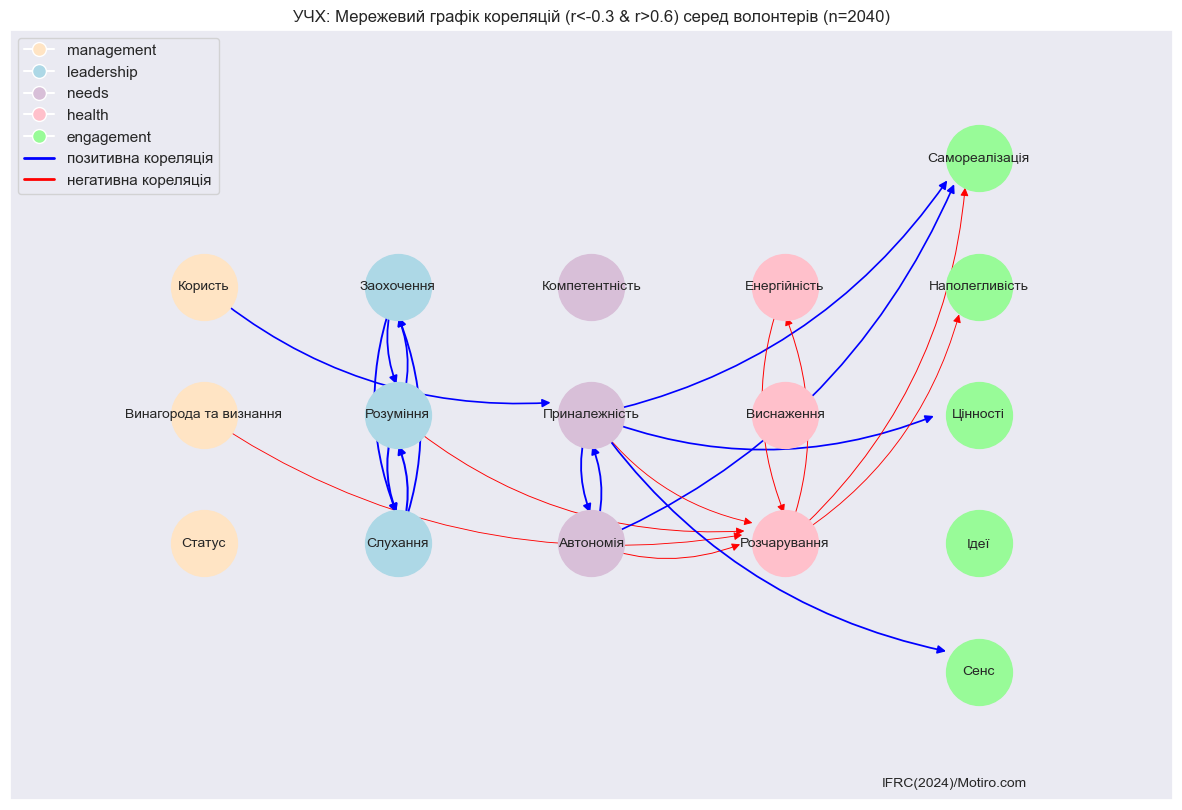

In [58]:
## VOLUNTEERS Ukraine Red Cross Correlations network graph key variables on horizontal axis
import networkx as nx
import matplotlib
#matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
import math

#set correlation coefficient thresholds for graph
negcorr = -0.3
poscorr = 0.6

df = pd.read_csv("URC_ALL.csv", sep=",", encoding='utf-8')

# Filter the dataframe for 'Position' = 'Volunteer'
df = df[df['Position'] == 'Volunteer']
#df = df[df['frontline'] == 'Frontline']
#df = df[df['region'] == 'Donetsk Region']

# Count the total number of teams in filtered dataframe (n)
n = df['Volunteer'].sum()

# Define columns and translation dictionary
columns = ['Well-being', 'Strong', 'Drained', 'Frustrated', 
           'Engagement', 'Satisfied', 'Meaning', 'Stay', 'Ideas', 'Values',
           'Needs', 'Autonomy', 'Belonging', 'Competence',
           'Leadership', 'Understands', 'Encourages', 'Listens',
           'Management', 'Returns', 'Rewards', 'Status',
           'Volunteer']

## use this dictionary to translate column names
column_names = {
    'Well-being': 'Благополуччя',
    'Strong': 'Енергійність',
    'Drained': 'Виснаження',
    'Frustrated': 'Розчарування',
    'Engagement': 'Залучення',
    'Satisfied': 'Самореалізація',
    'Stay': 'Наполегливість',
    'Ideas': 'Ідеї',
    'Values': 'Цінності',
    'Meaning': 'Сенс',
    'Needs': 'Потреби',
    'Autonomy': 'Автономія',
    'Belonging': 'Приналежність',
    'Competence': 'Компетентність',
    'Leadership': 'Лідерство',
    'Listens': 'Слухання',
    'Understands': 'Розуміння',
    'Encourages': 'Заохочення',
    'Management': 'Управління',
    'Returns': 'Користь',
    'Rewards': 'Винагорода та визнання',
    'Status': 'Статус'
}
# Translate column names in the DataFrame
df.rename(columns=column_names, inplace=True)

# Define variable sets
health_vars = ['Розчарування', 'Виснаження', 'Енергійність']
engagement_vars = ['Сенс', 'Ідеї', 'Цінності', 'Наполегливість', 'Самореалізація']
needs_vars = ['Автономія', 'Приналежність', 'Компетентність']
leadership_vars = ['Слухання', 'Розуміння', 'Заохочення']
management_vars = ['Статус', 'Винагорода та визнання', 'Користь']

# Compute correlation matrix with numeric_only set to True to avoid warning
corr_matrix = df.corr(numeric_only=True)

all_vars = management_vars + leadership_vars + needs_vars + health_vars + engagement_vars

# Create the graph
G = nx.DiGraph()

# Define variable colors
colors = {
    'management_vars': 'bisque',
    'leadership_vars': 'lightblue',
    'needs_vars': 'thistle',
    'health_vars': 'pink',
    'engagement_vars': 'palegreen'
}

# Modify the node addition part to include the color attribute
for var in all_vars:
    node_size = sum(corr_matrix[var])  # Sum of correlation coefficients
    if var in management_vars:
        node_color = colors['management_vars']
    elif var in leadership_vars:
        node_color = colors['leadership_vars']
    elif var in needs_vars:
        node_color = colors['needs_vars']
    elif var in health_vars:
        node_color = colors['health_vars']
    else:
        node_color = colors['engagement_vars']
    G.add_node(var, size=node_size, color=node_color)
    

# adjust arrows so that they touch circle periphery and are not hidden by the nodes' colored circle

def adjust_line_to_circle(x1, y1, x2, y2, r):
    """
    Adjusts the line segment (x1, y1) to (x2, y2) to stop at the circumference of a circle of radius r centered at (x2, y2).
    """
    angle = math.atan2(y2 - y1, x2 - x1)
    x2_new = x2 - r * math.cos(angle)
    y2_new = y2 - r * math.sin(angle)
    return x1, y1, x2_new, y2_new

# Add edges with color and weight attributes
for var1 in all_vars:
    for var2 in all_vars:
        correlation = corr_matrix[var1][var2]
        if var1 != var2 and not np.isnan(correlation) and (correlation > poscorr or correlation < negcorr):
            weight = abs(correlation)
            color = 'blue' if correlation > 0 else 'red'
            
            # Define the direction based on variable sets
            if var1 in management_vars and (var2 in needs_vars or var2 in health_vars or var2 in engagement_vars):
                G.add_edge(var1, var2, weight=weight, color=color)
            elif var1 in leadership_vars and (var2 in needs_vars or var2 in health_vars or var2 in engagement_vars):
                G.add_edge(var1, var2, weight=weight, color=color)
            elif var1 in needs_vars and (var2 in health_vars or var2 in engagement_vars):
                G.add_edge(var1, var2, weight=weight, color=color)
            elif var1 in management_vars and (var2 in health_vars or var2 in engagement_vars):
                G.add_edge(var1, var2, weight=weight, color=color)
            elif var1 in leadership_vars and (var2 in health_vars or var2 in engagement_vars):
                G.add_edge(var1, var2, weight=weight, color=color)
            elif var1 in health_vars and var2 in engagement_vars:
                G.add_edge(var1, var2, weight=weight, color=color)
            elif set([var1, var2]).issubset(set(management_vars)) or \
                 set([var1, var2]).issubset(set(leadership_vars)) or \
                 set([var1, var2]).issubset(set(needs_vars)) or \
                 set([var1, var2]).issubset(set(health_vars)) or \
                 set([var1, var2]).issubset(set(engagement_vars)):
                # Only add bidirectional arrows if they're in the same set
                G.add_edge(var1, var2, weight=weight, color=color)
                G.add_edge(var2, var1, weight=weight, color=color)

# Create positions for nodes
positions = {}
spacing_h = 1
spacing_v = 1

# Compute maximum group length for vertical centering
max_len = max(map(len, [management_vars, leadership_vars, needs_vars, health_vars, engagement_vars]))

for i, group in enumerate([management_vars, leadership_vars, needs_vars, health_vars, engagement_vars]):
    # Compute the starting y-coordinate for this group
    start_y = (max_len - len(group)) * spacing_v / 2
    
    for j, var in enumerate(group):
        positions[var] = (i * spacing_h, start_y + j * spacing_v)

for node, attributes in G.nodes(data=True):
    if np.isnan(attributes['size']):
        G.nodes[node]['size'] = 75  # Set default size

for node, data in G.nodes(data=True):
    print(node, data)

# Dummy lines for the legend
from matplotlib.lines import Line2D
legend_elements = []

# Adding legend for nodes
for label, color in colors.items():
    legend_elements.append(Line2D([0], [0], marker='o', color='w', label=label.replace('_vars', ''), markersize=10, markerfacecolor=color))

# Adding legend for edges
legend_elements.append(Line2D([0], [0], color='blue', lw=2, label='позитивна кореляція'))
legend_elements.append(Line2D([0], [0], color='red', lw=2, label='негативна кореляція'))

# Plotting
fig, ax = plt.subplots(figsize=(15, 10))

# Modify the Draw nodes part to use the color from the node attributes
for node, (x, y) in positions.items():
    node_color = G.nodes[node]['color']
    ax.scatter(x, y, s=G.nodes[node]['size'] * 30, c=node_color, zorder=2)
    ax.text(x, y, node, ha='center', va='center', fontsize=10, zorder=3)

# Draw edges with a slight curve using connectionstyle
for u, v, data in G.edges(data=True):
    x1, y1 = positions[u]
    x2, y2 = positions[v]
    
    # Adjust end of arrow to connect to the node circle's periphery
    node_radius = math.sqrt(G.nodes[v]['size'] * 0.002 / math.pi)
    x1, y1, x2, y2 = adjust_line_to_circle(x1, y1, x2, y2, node_radius)

    arrowprops = dict(arrowstyle='-|>', linewidth=data['weight'] * 2, color=data['color'], 
                      connectionstyle="arc3,rad=0.2")  # Adding a curve
    plt.annotate("", xy=(x2, y2), xytext=(x1, y1), arrowprops=arrowprops, zorder=1)

# Add the legend to the plot
ax.legend(handles=legend_elements, loc='upper left')

plt.title(f'УЧХ: Мережевий графік кореляцій (r<{negcorr} & r>{poscorr}) серед волонтерів (n={n})')
plt.text(3.5, -0.9, "IFRC(2024)/Motiro.com", size=10)
plt.xlim(-1, len([management_vars, leadership_vars, needs_vars, health_vars, engagement_vars]))
plt.ylim(-1, max_len)  # Using max_len for the ylim

# Remove x and y ticks
ax.set_xticks([])
ax.set_yticks([])
plt.savefig('URC VOL SDTCorrNetworkGraph Ukr.png', bbox_inches='tight', pad_inches=0.1)
plt.show()


Статус {'size': 75, 'color': 'bisque'}
Винагорода та визнання {'size': 75, 'color': 'bisque'}
Користь {'size': 75, 'color': 'bisque'}
Слухання {'size': 75, 'color': 'lightblue'}
Розуміння {'size': 75, 'color': 'lightblue'}
Заохочення {'size': 75, 'color': 'lightblue'}
Автономія {'size': 75, 'color': 'thistle'}
Приналежність {'size': 75, 'color': 'thistle'}
Компетентність {'size': 75, 'color': 'thistle'}
Розчарування {'size': 75, 'color': 'pink'}
Виснаження {'size': 75, 'color': 'pink'}
Енергійність {'size': 75, 'color': 'pink'}
Сенс {'size': 75, 'color': 'palegreen'}
Ідеї {'size': 75, 'color': 'palegreen'}
Цінності {'size': 75, 'color': 'palegreen'}
Наполегливість {'size': 75, 'color': 'palegreen'}
Самореалізація {'size': 75, 'color': 'palegreen'}


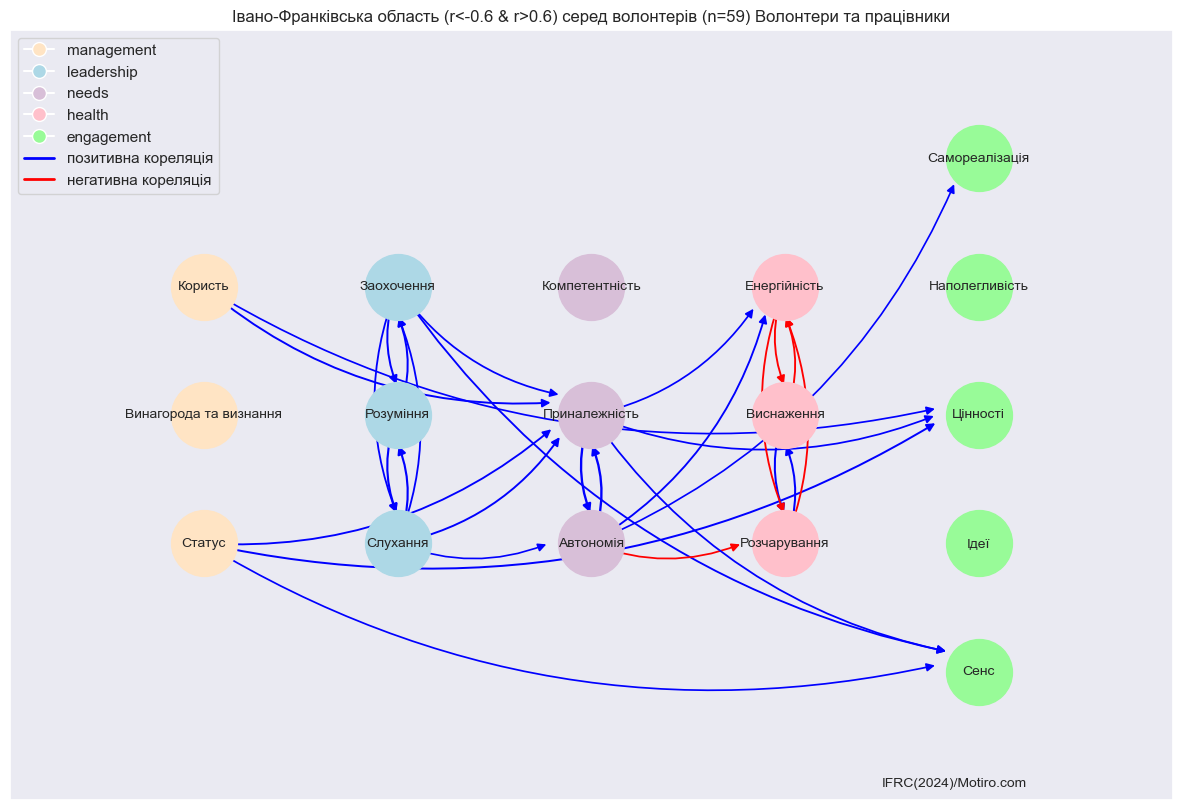

In [64]:
## VOLUNTEERS Ukraine Red Cross Correlations network graph key variables on horizontal axis
#    'Ivano-Frankivsk Region': 'Івано-Франківська область',

# import networkx as nx
import matplotlib
#matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
import math

#set correlation coefficient thresholds for graph
negcorr = -0.6
poscorr = 0.6

df = pd.read_csv("URC_ALL.csv", sep=",", encoding='utf-8')

# Filter the dataframe for 'Position' = 'Volunteer'
#df = df[df['Position'] == 'Volunteer']
#df = df[df['frontline'] == 'Frontline']
df = df[df['region'] == 'Ivano-Frankivsk Region']

# Count the total number of teams in filtered dataframe (n)
n = df['Volunteer'].sum() + df['Staff'].sum()

# Define columns and translation dictionary
columns = ['Well-being', 'Strong', 'Drained', 'Frustrated', 
           'Engagement', 'Satisfied', 'Meaning', 'Stay', 'Ideas', 'Values',
           'Needs', 'Autonomy', 'Belonging', 'Competence',
           'Leadership', 'Understands', 'Encourages', 'Listens',
           'Management', 'Returns', 'Rewards', 'Status',
           'Volunteer']

## use this dictionary to translate column names
column_names = {
    'Well-being': 'Благополуччя',
    'Strong': 'Енергійність',
    'Drained': 'Виснаження',
    'Frustrated': 'Розчарування',
    'Engagement': 'Залучення',
    'Satisfied': 'Самореалізація',
    'Stay': 'Наполегливість',
    'Ideas': 'Ідеї',
    'Values': 'Цінності',
    'Meaning': 'Сенс',
    'Needs': 'Потреби',
    'Autonomy': 'Автономія',
    'Belonging': 'Приналежність',
    'Competence': 'Компетентність',
    'Leadership': 'Лідерство',
    'Listens': 'Слухання',
    'Understands': 'Розуміння',
    'Encourages': 'Заохочення',
    'Management': 'Управління',
    'Returns': 'Користь',
    'Rewards': 'Винагорода та визнання',
    'Status': 'Статус'
}
# Translate column names in the DataFrame
df.rename(columns=column_names, inplace=True)

# Define variable sets
health_vars = ['Розчарування', 'Виснаження', 'Енергійність']
engagement_vars = ['Сенс', 'Ідеї', 'Цінності', 'Наполегливість', 'Самореалізація']
needs_vars = ['Автономія', 'Приналежність', 'Компетентність']
leadership_vars = ['Слухання', 'Розуміння', 'Заохочення']
management_vars = ['Статус', 'Винагорода та визнання', 'Користь']

# Compute correlation matrix with numeric_only set to True to avoid warning
corr_matrix = df.corr(numeric_only=True)

all_vars = management_vars + leadership_vars + needs_vars + health_vars + engagement_vars

# Create the graph
G = nx.DiGraph()

# Define variable colors
colors = {
    'management_vars': 'bisque',
    'leadership_vars': 'lightblue',
    'needs_vars': 'thistle',
    'health_vars': 'pink',
    'engagement_vars': 'palegreen'
}

# Modify the node addition part to include the color attribute
for var in all_vars:
    node_size = sum(corr_matrix[var])  # Sum of correlation coefficients
    if var in management_vars:
        node_color = colors['management_vars']
    elif var in leadership_vars:
        node_color = colors['leadership_vars']
    elif var in needs_vars:
        node_color = colors['needs_vars']
    elif var in health_vars:
        node_color = colors['health_vars']
    else:
        node_color = colors['engagement_vars']
    G.add_node(var, size=node_size, color=node_color)
    

# adjust arrows so that they touch circle periphery and are not hidden by the nodes' colored circle

def adjust_line_to_circle(x1, y1, x2, y2, r):
    """
    Adjusts the line segment (x1, y1) to (x2, y2) to stop at the circumference of a circle of radius r centered at (x2, y2).
    """
    angle = math.atan2(y2 - y1, x2 - x1)
    x2_new = x2 - r * math.cos(angle)
    y2_new = y2 - r * math.sin(angle)
    return x1, y1, x2_new, y2_new

# Add edges with color and weight attributes
for var1 in all_vars:
    for var2 in all_vars:
        correlation = corr_matrix[var1][var2]
        if var1 != var2 and not np.isnan(correlation) and (correlation > poscorr or correlation < negcorr):
            weight = abs(correlation)
            color = 'blue' if correlation > 0 else 'red'
            
            # Define the direction based on variable sets
            if var1 in management_vars and (var2 in needs_vars or var2 in health_vars or var2 in engagement_vars):
                G.add_edge(var1, var2, weight=weight, color=color)
            elif var1 in leadership_vars and (var2 in needs_vars or var2 in health_vars or var2 in engagement_vars):
                G.add_edge(var1, var2, weight=weight, color=color)
            elif var1 in needs_vars and (var2 in health_vars or var2 in engagement_vars):
                G.add_edge(var1, var2, weight=weight, color=color)
            elif var1 in management_vars and (var2 in health_vars or var2 in engagement_vars):
                G.add_edge(var1, var2, weight=weight, color=color)
            elif var1 in leadership_vars and (var2 in health_vars or var2 in engagement_vars):
                G.add_edge(var1, var2, weight=weight, color=color)
            elif var1 in health_vars and var2 in engagement_vars:
                G.add_edge(var1, var2, weight=weight, color=color)
            elif set([var1, var2]).issubset(set(management_vars)) or \
                 set([var1, var2]).issubset(set(leadership_vars)) or \
                 set([var1, var2]).issubset(set(needs_vars)) or \
                 set([var1, var2]).issubset(set(health_vars)) or \
                 set([var1, var2]).issubset(set(engagement_vars)):
                # Only add bidirectional arrows if they're in the same set
                G.add_edge(var1, var2, weight=weight, color=color)
                G.add_edge(var2, var1, weight=weight, color=color)

# Create positions for nodes
positions = {}
spacing_h = 1
spacing_v = 1

# Compute maximum group length for vertical centering
max_len = max(map(len, [management_vars, leadership_vars, needs_vars, health_vars, engagement_vars]))

for i, group in enumerate([management_vars, leadership_vars, needs_vars, health_vars, engagement_vars]):
    # Compute the starting y-coordinate for this group
    start_y = (max_len - len(group)) * spacing_v / 2
    
    for j, var in enumerate(group):
        positions[var] = (i * spacing_h, start_y + j * spacing_v)

for node, attributes in G.nodes(data=True):
    if np.isnan(attributes['size']):
        G.nodes[node]['size'] = 75  # Set default size

for node, data in G.nodes(data=True):
    print(node, data)

# Dummy lines for the legend
from matplotlib.lines import Line2D
legend_elements = []

# Adding legend for nodes
for label, color in colors.items():
    legend_elements.append(Line2D([0], [0], marker='o', color='w', label=label.replace('_vars', ''), markersize=10, markerfacecolor=color))

# Adding legend for edges
legend_elements.append(Line2D([0], [0], color='blue', lw=2, label='позитивна кореляція'))
legend_elements.append(Line2D([0], [0], color='red', lw=2, label='негативна кореляція'))

# Plotting
fig, ax = plt.subplots(figsize=(15, 10))

# Modify the Draw nodes part to use the color from the node attributes
for node, (x, y) in positions.items():
    node_color = G.nodes[node]['color']
    ax.scatter(x, y, s=G.nodes[node]['size'] * 30, c=node_color, zorder=2)
    ax.text(x, y, node, ha='center', va='center', fontsize=10, zorder=3)

# Draw edges with a slight curve using connectionstyle
for u, v, data in G.edges(data=True):
    x1, y1 = positions[u]
    x2, y2 = positions[v]
    
    # Adjust end of arrow to connect to the node circle's periphery
    node_radius = math.sqrt(G.nodes[v]['size'] * 0.002 / math.pi)
    x1, y1, x2, y2 = adjust_line_to_circle(x1, y1, x2, y2, node_radius)

    arrowprops = dict(arrowstyle='-|>', linewidth=data['weight'] * 2, color=data['color'], 
                      connectionstyle="arc3,rad=0.2")  # Adding a curve
    plt.annotate("", xy=(x2, y2), xytext=(x1, y1), arrowprops=arrowprops, zorder=1)

# Add the legend to the plot
ax.legend(handles=legend_elements, loc='upper left')

plt.title(f'Івано-Франківська область (r<{negcorr} & r>{poscorr}) серед волонтерів (n={n}) Волонтери та працівники')
plt.text(3.5, -0.9, "IFRC(2024)/Motiro.com", size=10)
plt.xlim(-1, len([management_vars, leadership_vars, needs_vars, health_vars, engagement_vars]))
plt.ylim(-1, max_len)  # Using max_len for the ylim

# Remove x and y ticks
ax.set_xticks([])
ax.set_yticks([])
plt.savefig('Івано-Франківська SDTCorrNetworkGraph Ukr.png', bbox_inches='tight', pad_inches=0.1)
plt.show()


Status {'size': 75, 'color': 'bisque'}
Rewards {'size': 75, 'color': 'bisque'}
Returns {'size': 75, 'color': 'bisque'}
Listens {'size': 75, 'color': 'lightblue'}
Understands {'size': 75, 'color': 'lightblue'}
Encourages {'size': 75, 'color': 'lightblue'}
Autonomy {'size': 75, 'color': 'thistle'}
Belonging {'size': 75, 'color': 'thistle'}
Competence {'size': 75, 'color': 'thistle'}
Frustrated {'size': 75, 'color': 'pink'}
Drained {'size': 75, 'color': 'pink'}
Strong {'size': 75, 'color': 'pink'}
Meaning {'size': 75, 'color': 'palegreen'}
Ideas {'size': 75, 'color': 'palegreen'}
Values {'size': 75, 'color': 'palegreen'}
Stay {'size': 75, 'color': 'palegreen'}
Satisfied {'size': 75, 'color': 'palegreen'}


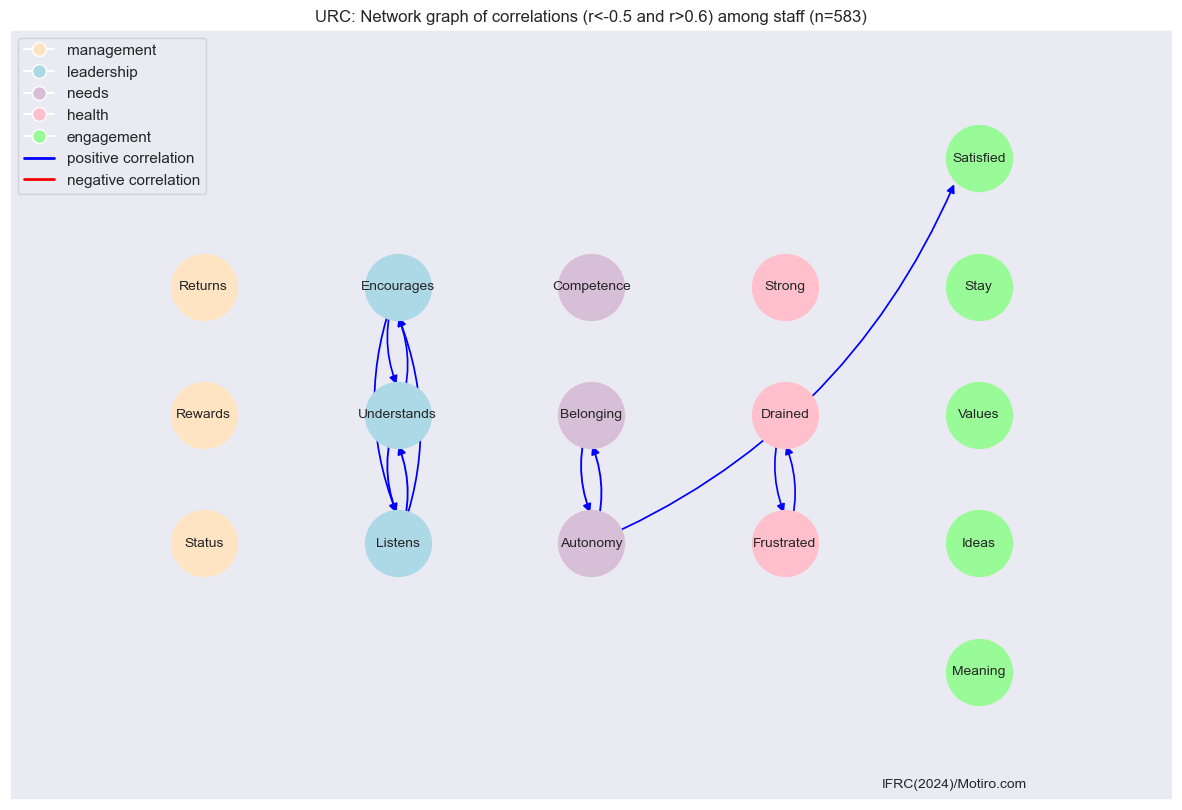

In [61]:
## STAFF Ukraine Red Cross Correlations network graph key variables on horizontal axis
import networkx as nx
import matplotlib
#matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
import math

#set correlation coefficient thresholds for graph
negcorr = -0.5
poscorr = 0.6

df = pd.read_csv("URC_ALL.csv")

# Filter the dataframe for 'Position' = 'Volunteer'
df = df[df['Position'] == 'Staff']
#df = df[df['frontline'] == 'Frontline']
#df = df[df['region'] == 'Donetsk Region']

# Count the total number of teams in filtered dataframe (n)
n = df['Staff'].sum()

# Compute correlation matrix with numeric_only set to True to avoid warning
corr_matrix = df.corr(numeric_only=True)


# Define variable sets
management_vars = ['Status', 'Rewards', 'Returns']
leadership_vars = ['Listens', 'Understands', 'Encourages']
needs_vars = ['Autonomy', 'Belonging', 'Competence']
health_vars = ['Frustrated', 'Drained', 'Strong']
engagement_vars = ['Meaning', 'Ideas', 'Values', 'Stay', 'Satisfied']

all_vars = management_vars + leadership_vars + needs_vars + health_vars + engagement_vars

# Create the graph
G = nx.DiGraph()

# Define variable colors
colors = {
    'management_vars': 'bisque',
    'leadership_vars': 'lightblue',
    'needs_vars': 'thistle',
    'health_vars': 'pink',
    'engagement_vars': 'palegreen'
}

# Modify the node addition part to include the color attribute
for var in all_vars:
    node_size = sum(corr_matrix[var])  # Sum of correlation coefficients
    if var in management_vars:
        node_color = colors['management_vars']
    elif var in leadership_vars:
        node_color = colors['leadership_vars']
    elif var in needs_vars:
        node_color = colors['needs_vars']
    elif var in health_vars:
        node_color = colors['health_vars']
    else:
        node_color = colors['engagement_vars']
    G.add_node(var, size=node_size, color=node_color)
    

# adjust arrows so that they touch circle periphery and are not hidden by the nodes' colored circle

def adjust_line_to_circle(x1, y1, x2, y2, r):
    """
    Adjusts the line segment (x1, y1) to (x2, y2) to stop at the circumference of a circle of radius r centered at (x2, y2).
    """
    angle = math.atan2(y2 - y1, x2 - x1)
    x2_new = x2 - r * math.cos(angle)
    y2_new = y2 - r * math.sin(angle)
    return x1, y1, x2_new, y2_new

# Add edges with color and weight attributes
for var1 in all_vars:
    for var2 in all_vars:
        correlation = corr_matrix[var1][var2]
        if var1 != var2 and not np.isnan(correlation) and (correlation > poscorr or correlation < negcorr):
            weight = abs(correlation)
            color = 'blue' if correlation > 0 else 'red'
            
            # Define the direction based on variable sets
            if var1 in management_vars and (var2 in needs_vars or var2 in health_vars or var2 in engagement_vars):
                G.add_edge(var1, var2, weight=weight, color=color)
            elif var1 in leadership_vars and (var2 in needs_vars or var2 in health_vars or var2 in engagement_vars):
                G.add_edge(var1, var2, weight=weight, color=color)
            elif var1 in needs_vars and (var2 in health_vars or var2 in engagement_vars):
                G.add_edge(var1, var2, weight=weight, color=color)
            elif var1 in management_vars and (var2 in health_vars or var2 in engagement_vars):
                G.add_edge(var1, var2, weight=weight, color=color)
            elif var1 in leadership_vars and (var2 in health_vars or var2 in engagement_vars):
                G.add_edge(var1, var2, weight=weight, color=color)
            elif var1 in health_vars and var2 in engagement_vars:
                G.add_edge(var1, var2, weight=weight, color=color)
            elif set([var1, var2]).issubset(set(management_vars)) or \
                 set([var1, var2]).issubset(set(leadership_vars)) or \
                 set([var1, var2]).issubset(set(needs_vars)) or \
                 set([var1, var2]).issubset(set(health_vars)) or \
                 set([var1, var2]).issubset(set(engagement_vars)):
                # Only add bidirectional arrows if they're in the same set
                G.add_edge(var1, var2, weight=weight, color=color)
                G.add_edge(var2, var1, weight=weight, color=color)

# Create positions for nodes
positions = {}
spacing_h = 1
spacing_v = 1

# Compute maximum group length for vertical centering
max_len = max(map(len, [management_vars, leadership_vars, needs_vars, health_vars, engagement_vars]))

for i, group in enumerate([management_vars, leadership_vars, needs_vars, health_vars, engagement_vars]):
    # Compute the starting y-coordinate for this group
    start_y = (max_len - len(group)) * spacing_v / 2
    
    for j, var in enumerate(group):
        positions[var] = (i * spacing_h, start_y + j * spacing_v)

for node, attributes in G.nodes(data=True):
    if np.isnan(attributes['size']):
        G.nodes[node]['size'] = 75  # Set default size

for node, data in G.nodes(data=True):
    print(node, data)

# Dummy lines for the legend
from matplotlib.lines import Line2D
legend_elements = []

# Adding legend for nodes
for label, color in colors.items():
    legend_elements.append(Line2D([0], [0], marker='o', color='w', label=label.replace('_vars', ''), markersize=10, markerfacecolor=color))

# Adding legend for edges
legend_elements.append(Line2D([0], [0], color='blue', lw=2, label='positive correlation'))
legend_elements.append(Line2D([0], [0], color='red', lw=2, label='negative correlation'))

# Plotting
fig, ax = plt.subplots(figsize=(15, 10))

# Modify the Draw nodes part to use the color from the node attributes
for node, (x, y) in positions.items():
    node_color = G.nodes[node]['color']
    ax.scatter(x, y, s=G.nodes[node]['size'] * 30, c=node_color, zorder=2)
    ax.text(x, y, node, ha='center', va='center', fontsize=10, zorder=3)

# Draw edges with a slight curve using connectionstyle
for u, v, data in G.edges(data=True):
    x1, y1 = positions[u]
    x2, y2 = positions[v]
    
    # Adjust end of arrow to connect to the node circle's periphery
    node_radius = math.sqrt(G.nodes[v]['size'] * 0.002 / math.pi)
    x1, y1, x2, y2 = adjust_line_to_circle(x1, y1, x2, y2, node_radius)

    arrowprops = dict(arrowstyle='-|>', linewidth=data['weight'] * 2, color=data['color'], 
                      connectionstyle="arc3,rad=0.2")  # Adding a curve
    plt.annotate("", xy=(x2, y2), xytext=(x1, y1), arrowprops=arrowprops, zorder=1)

# Add the legend to the plot
ax.legend(handles=legend_elements, loc='upper left')

plt.title(f'URC: Network graph of correlations (r<{negcorr} and r>{poscorr}) among staff (n={n})')
plt.text(3.5, -0.9, "IFRC(2024)/Motiro.com", size=10)
plt.xlim(-1, len([management_vars, leadership_vars, needs_vars, health_vars, engagement_vars]))
plt.ylim(-1, max_len)  # Using max_len for the ylim

# Remove x and y ticks
ax.set_xticks([])
ax.set_yticks([])
plt.savefig('URC STAFF SDTCorrNetworkGraph.png', bbox_inches='tight', pad_inches=0.1)
plt.show()
